In [15]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
import metpy.calc as mpcalc

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, interplevel

In [16]:
# Open D01
file1_65 = Dataset("data/wrfoutd01_pbl99")

In [17]:
#find coordinate 
ncfile = Dataset("data/wrfoutd01_pbl99")
slp = getvar(ncfile,"T")
np.where(slp<2)
#slp[26,12] d02
#3.150856, 101.702155 
#slp[14,20] d01

(array([0, 0, 0, ..., 6, 6, 6], dtype=int64),
 array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64),
 array([ 0,  1,  2, ..., 48, 49, 50], dtype=int64))

In [18]:
#d01
#manok
RHm1_11 = np.empty(73)
RHm1_82 = np.empty(73)
RHm1_65 = np.empty(73)
#deo
RHd1_11 = np.empty(73)
RHd1_82 = np.empty(73)
RHd1_65 = np.empty(73)
#biak
RHb1_11 = np.empty(73)
RHb1_82 = np.empty(73)
RHb1_65 = np.empty(73)
#laut
RHl1_11 = np.empty(73)
RHl1_82 = np.empty(73)
RHl1_65 = np.empty(73)

In [19]:
#d01
#manok
Pm1_11 = np.empty(73)
Pm1_82 = np.empty(73)
Pm1_65 = np.empty(73)
#deo
Pd1_11 = np.empty(73)
Pd1_82 = np.empty(73)
Pd1_65 = np.empty(73)
#biak
Pb1_11 = np.empty(73)
Pb1_82 = np.empty(73)
Pb1_65 = np.empty(73)
#laut
Pl1_11 = np.empty(73)
Pl1_82 = np.empty(73)
Pl1_65 = np.empty(73)

# DOMAIN 1-Laut

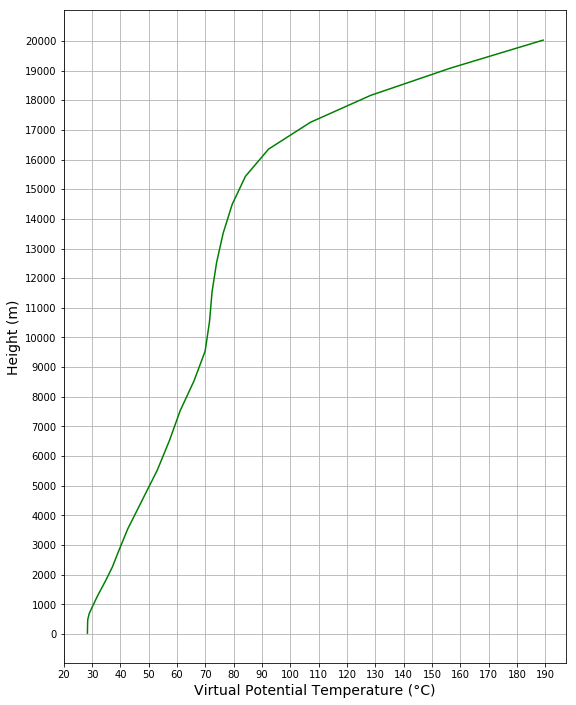

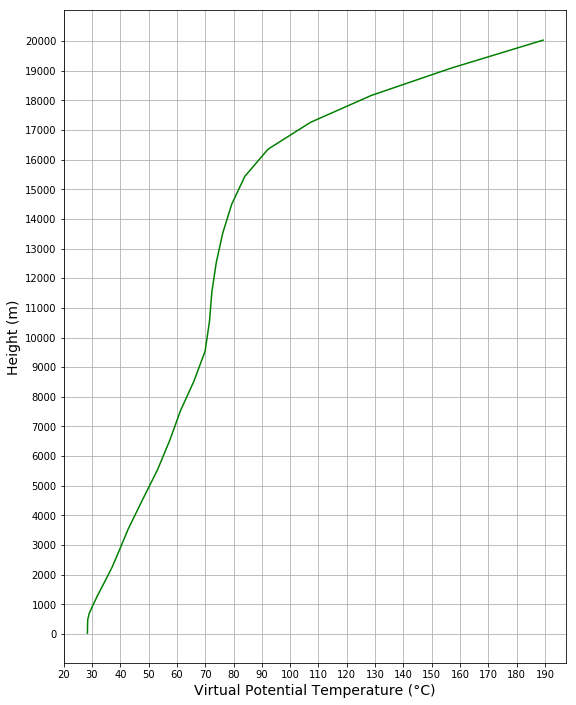

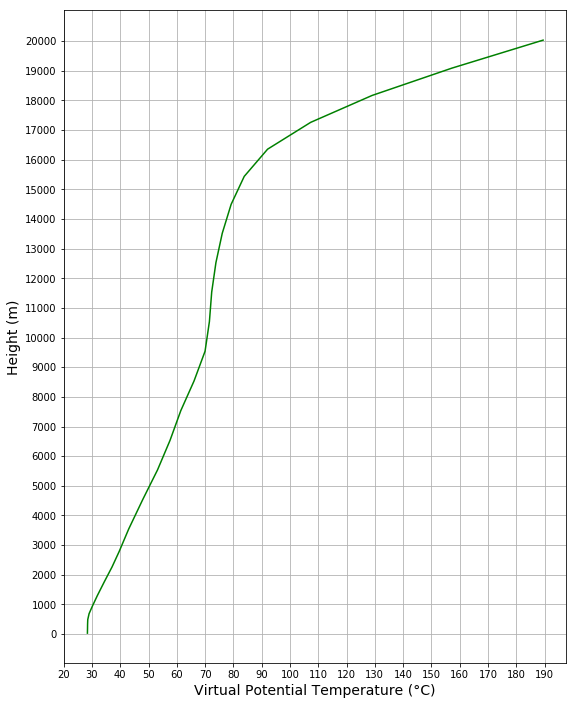

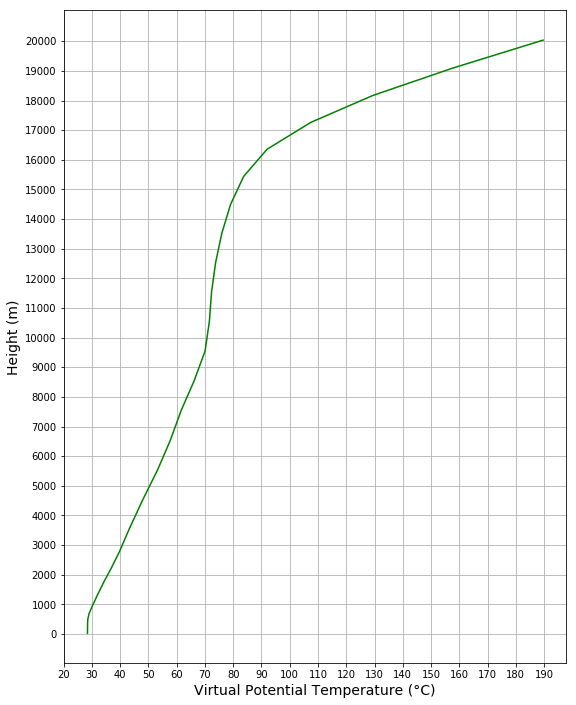

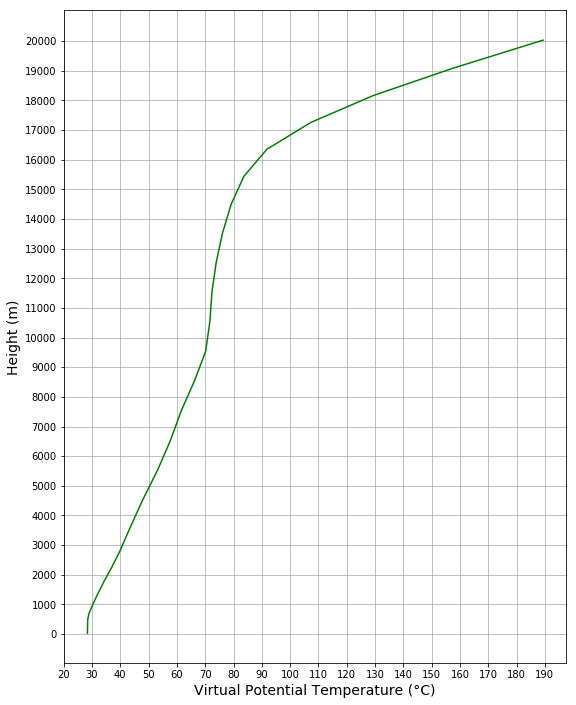

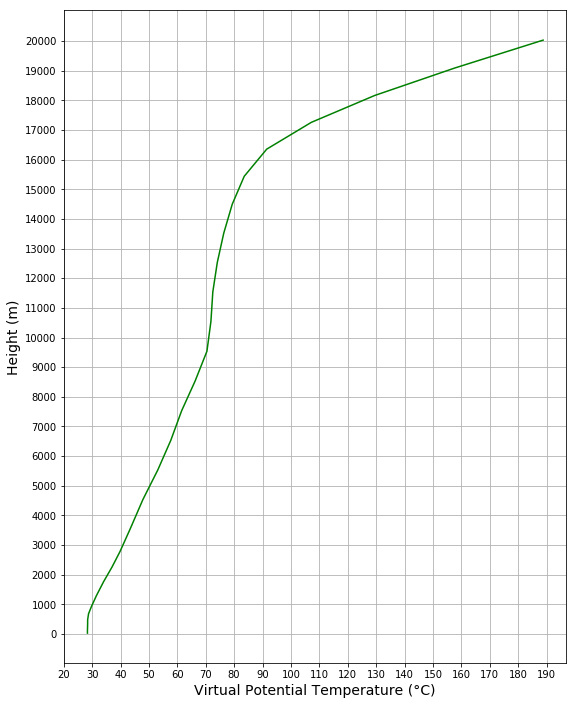

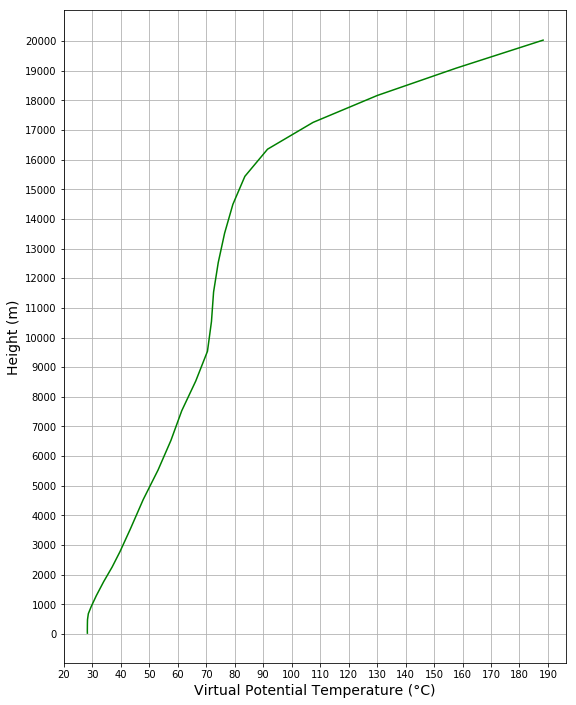

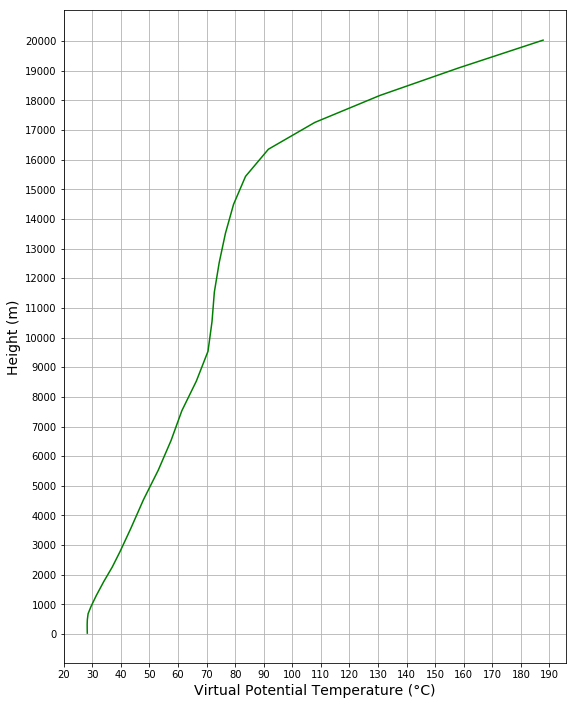

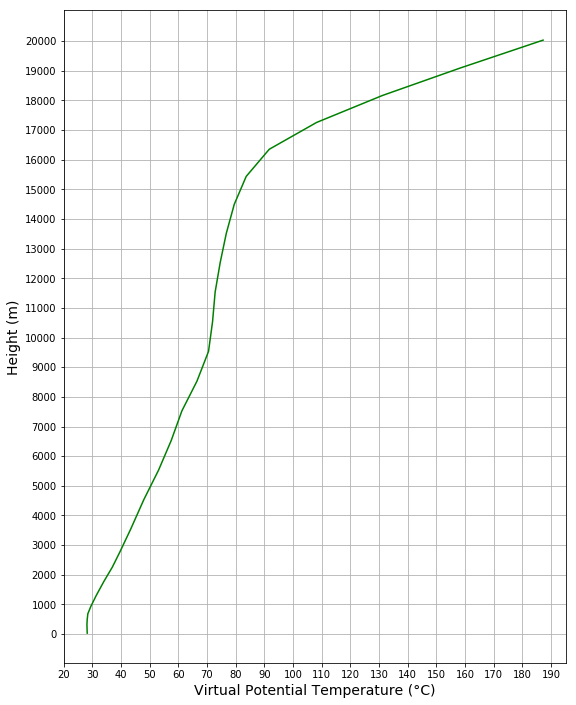

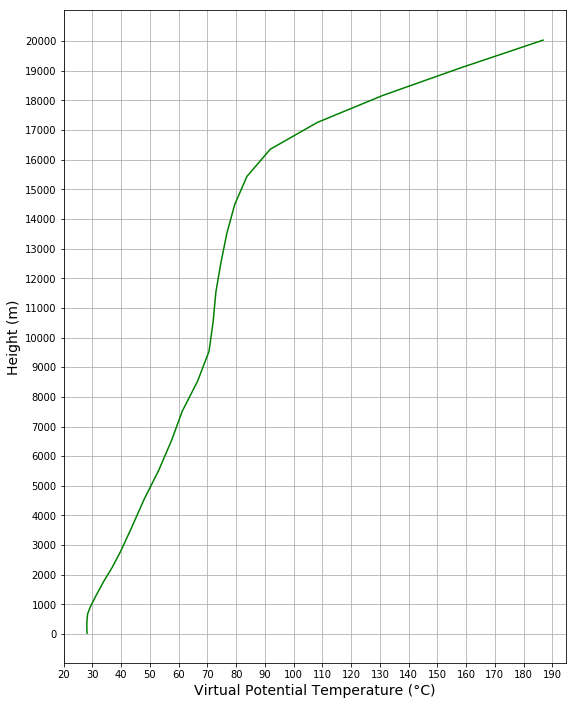

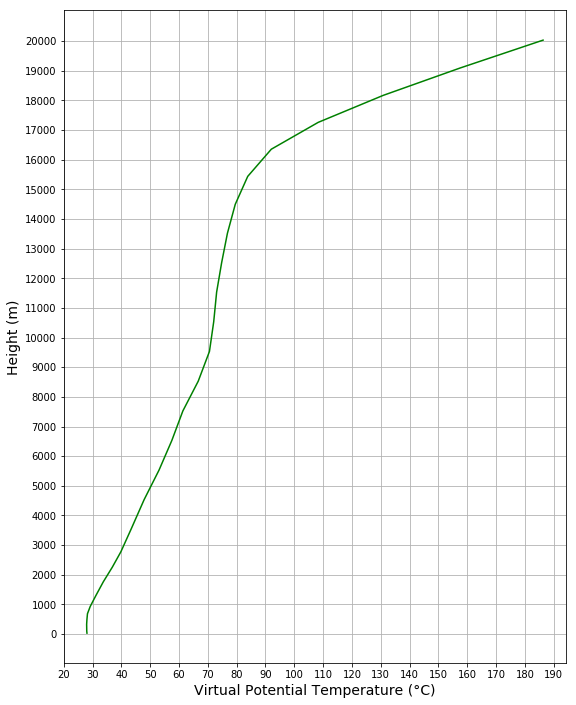

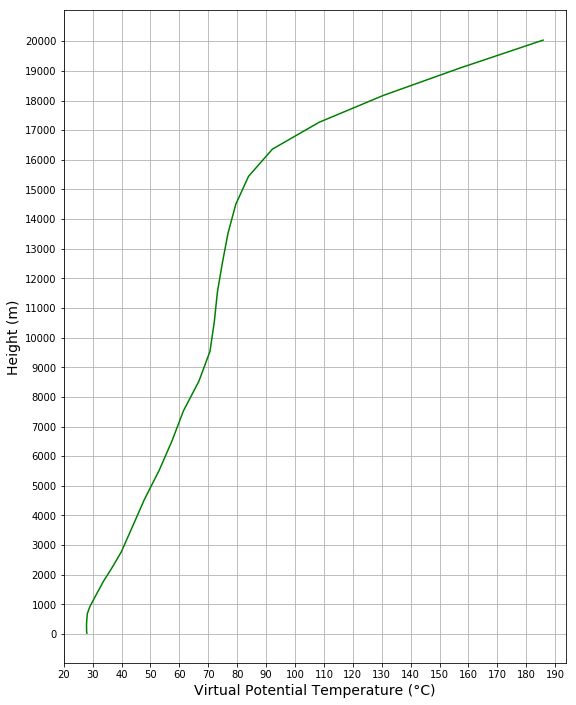

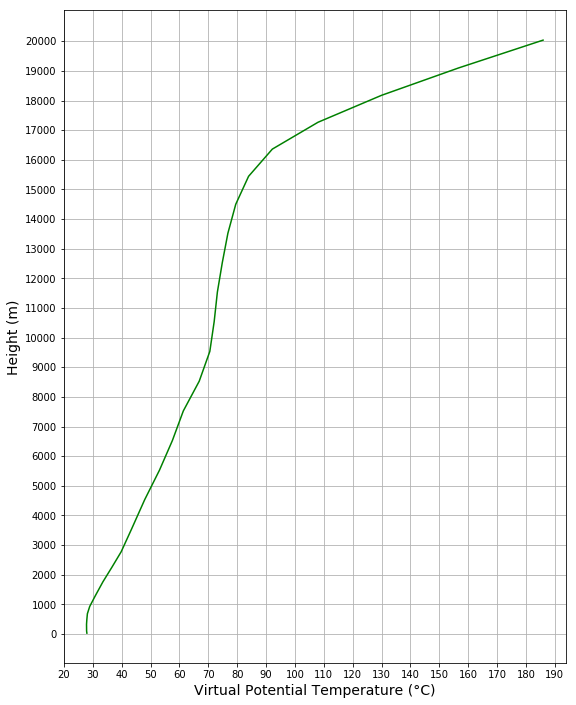

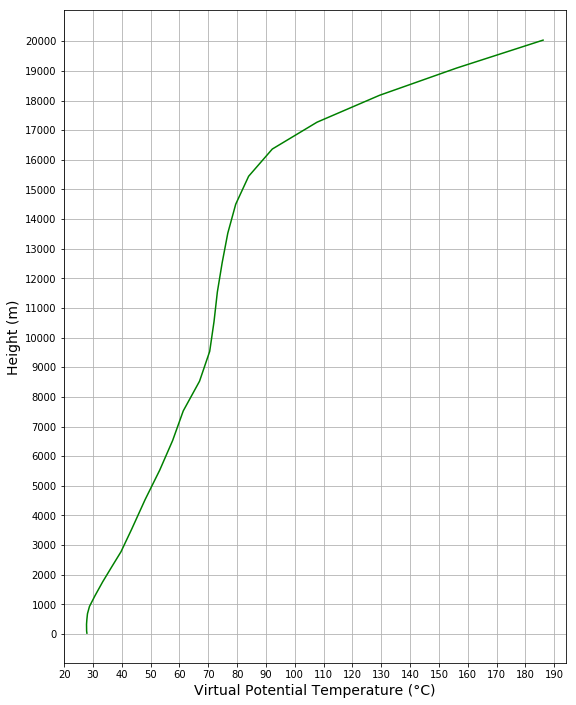

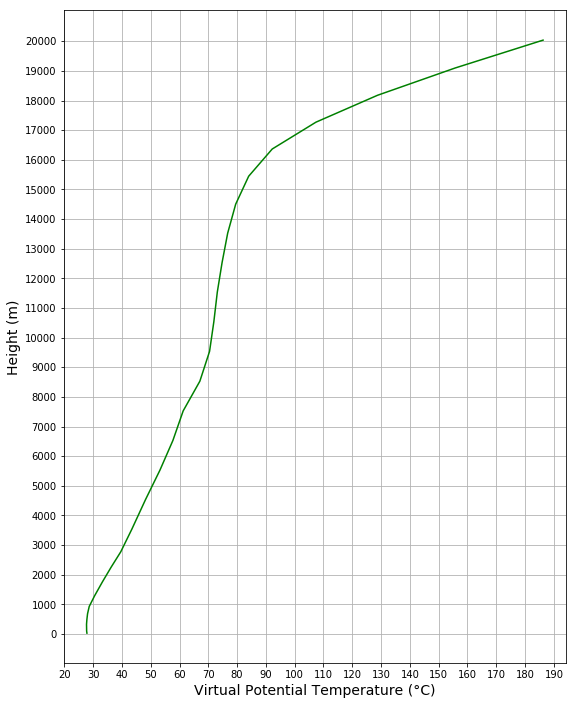

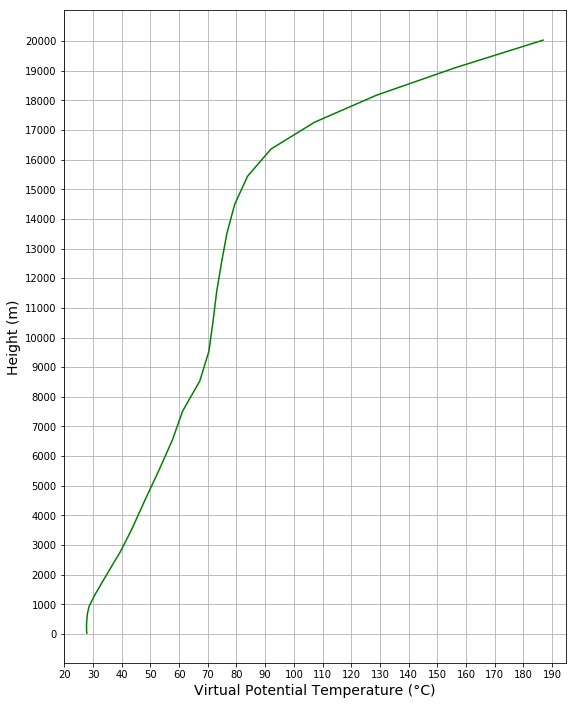

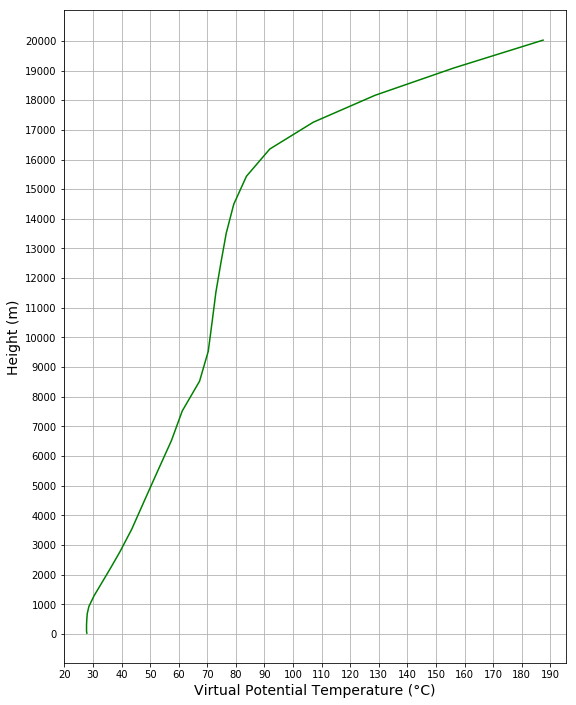

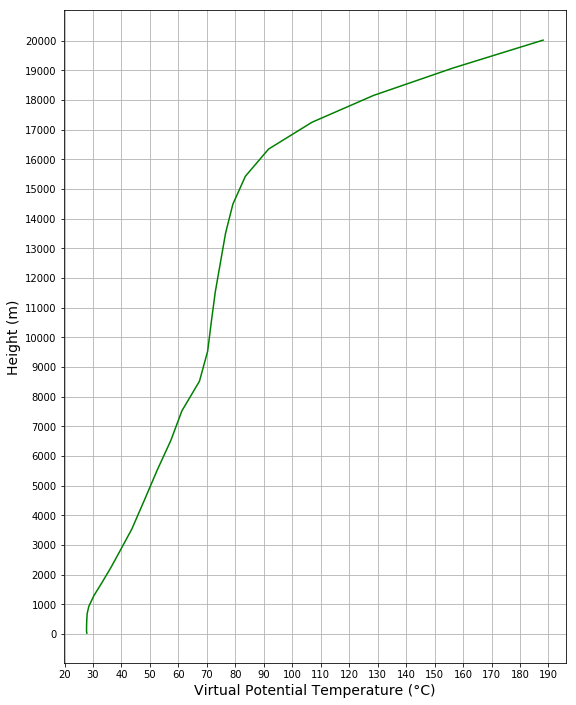

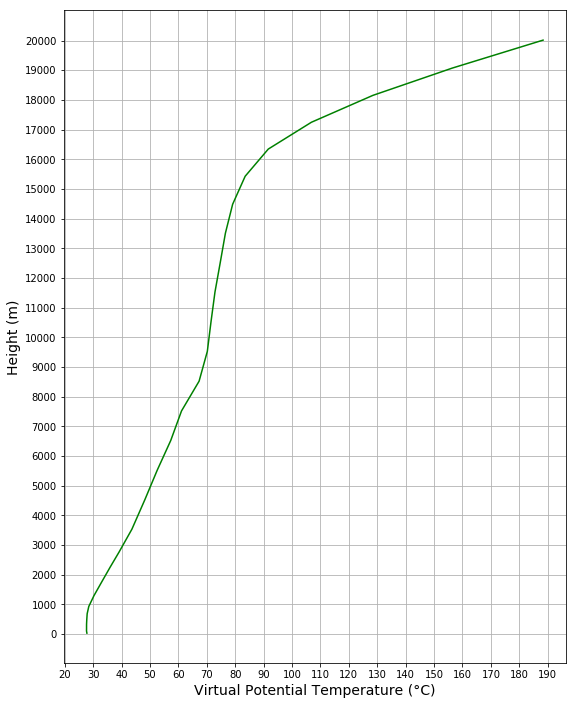

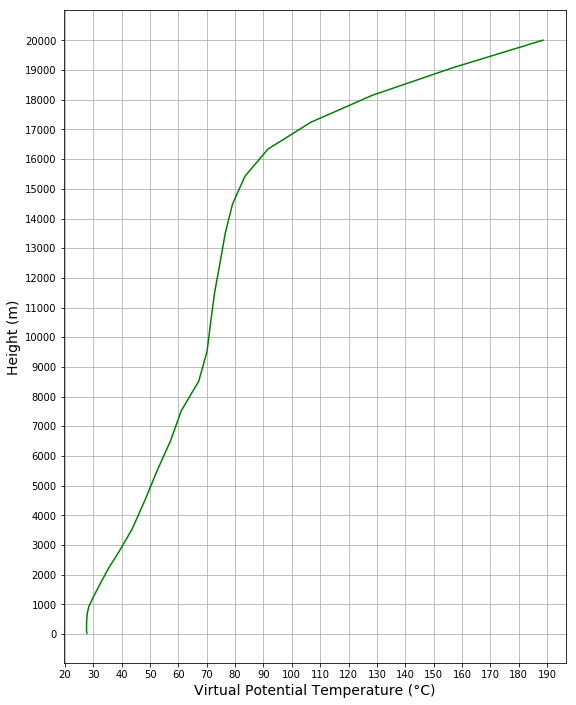

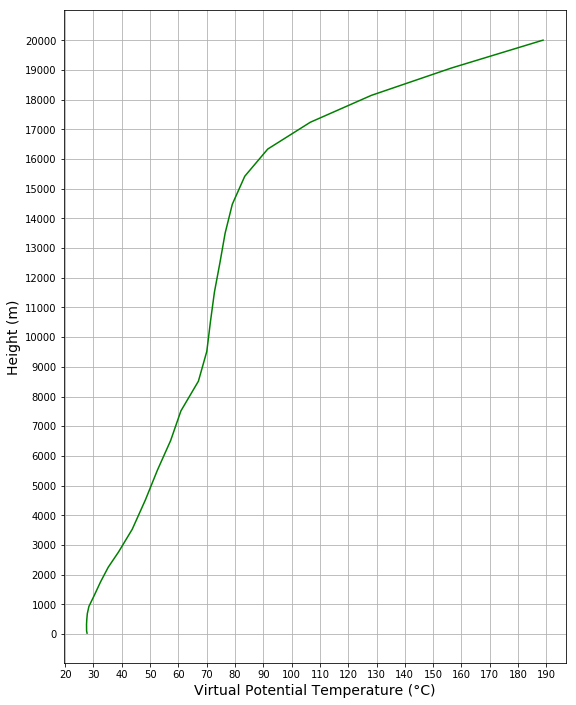

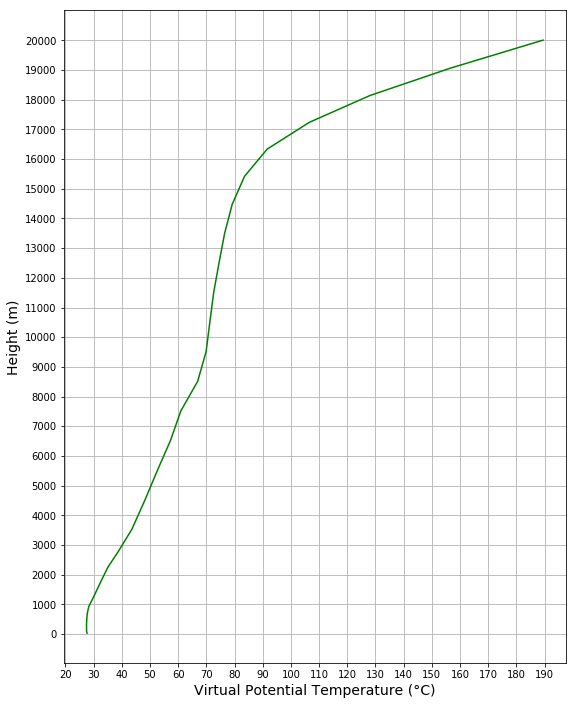

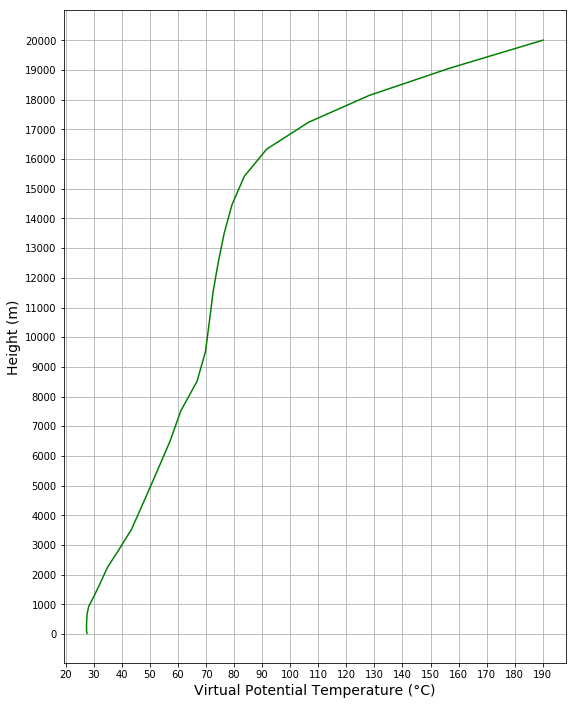

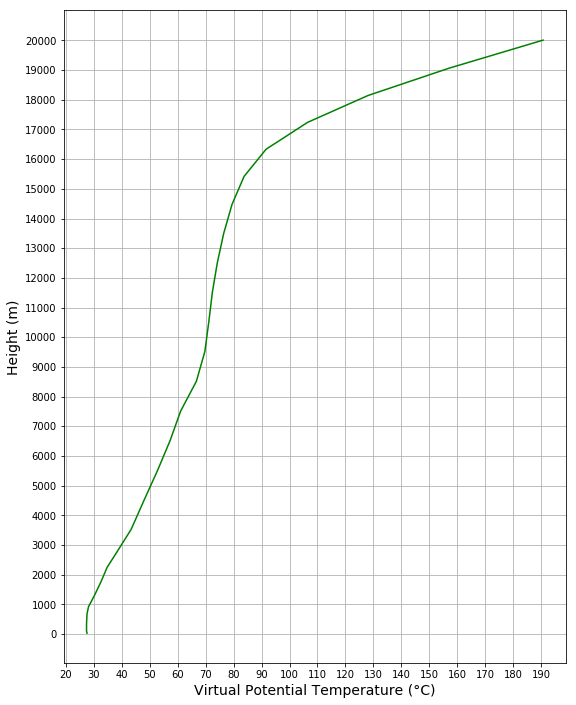

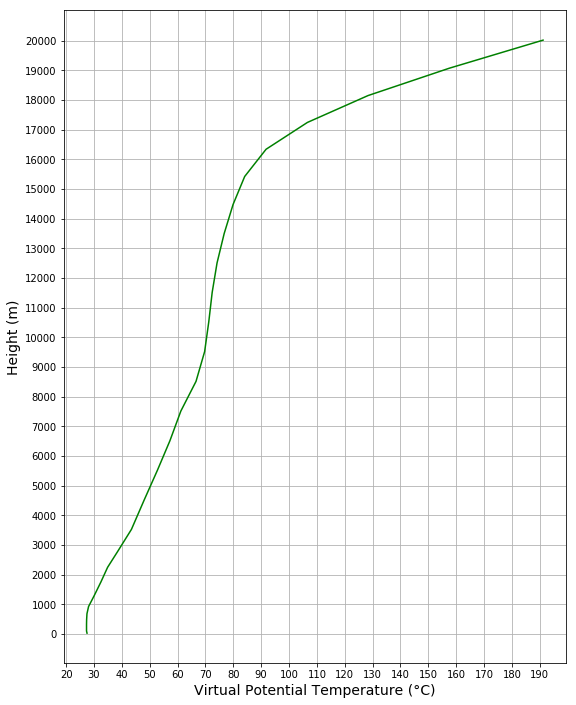

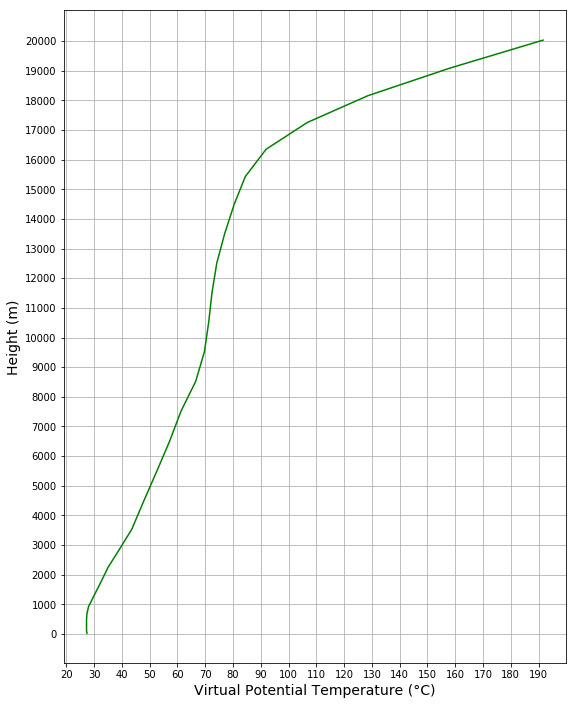

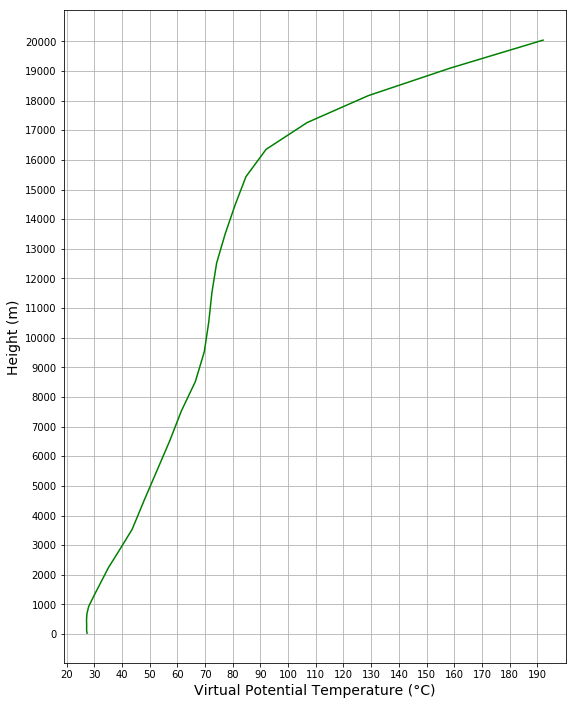

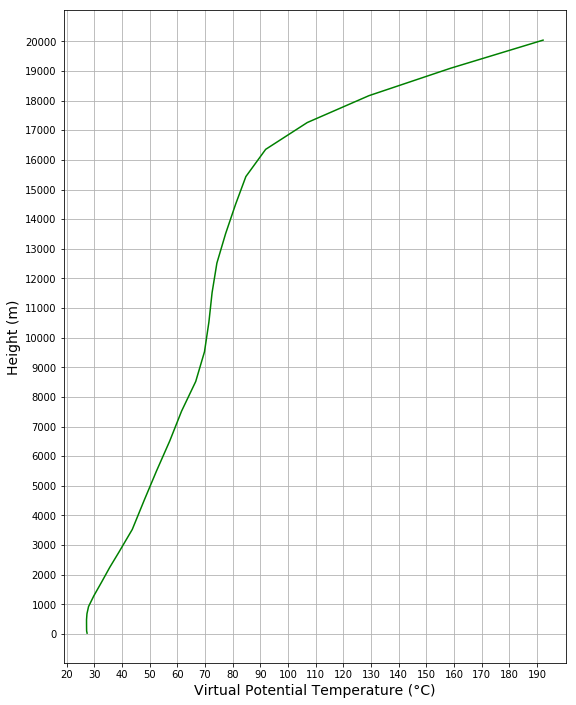

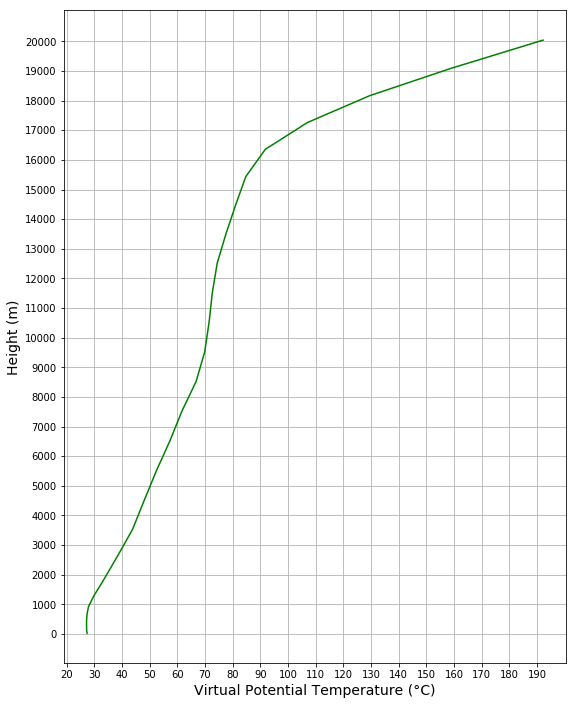

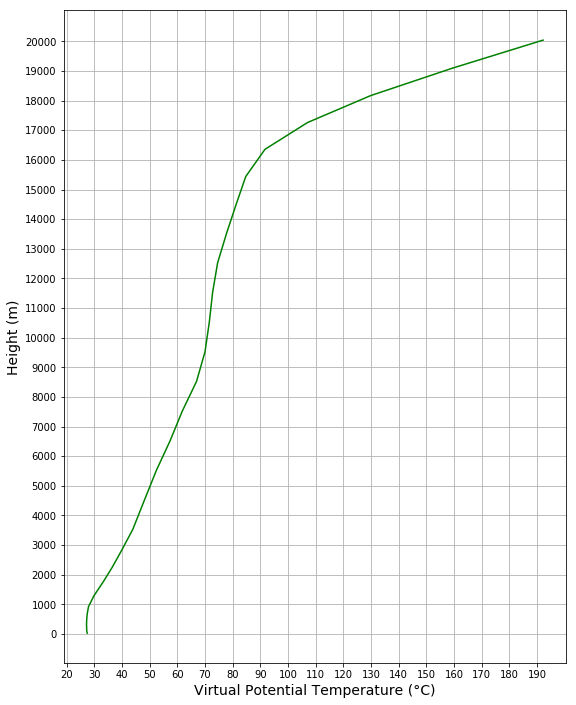

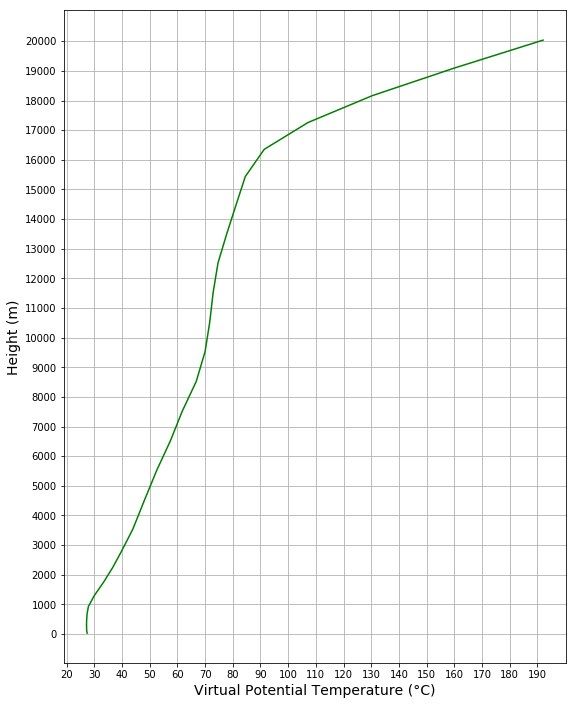

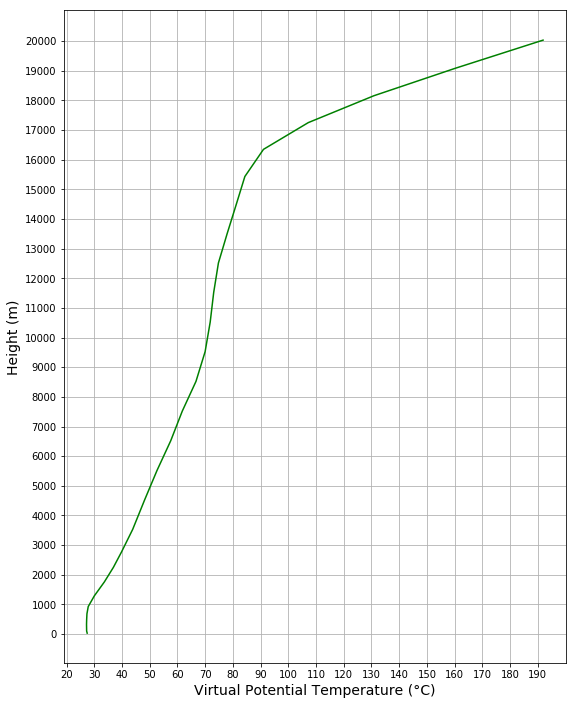

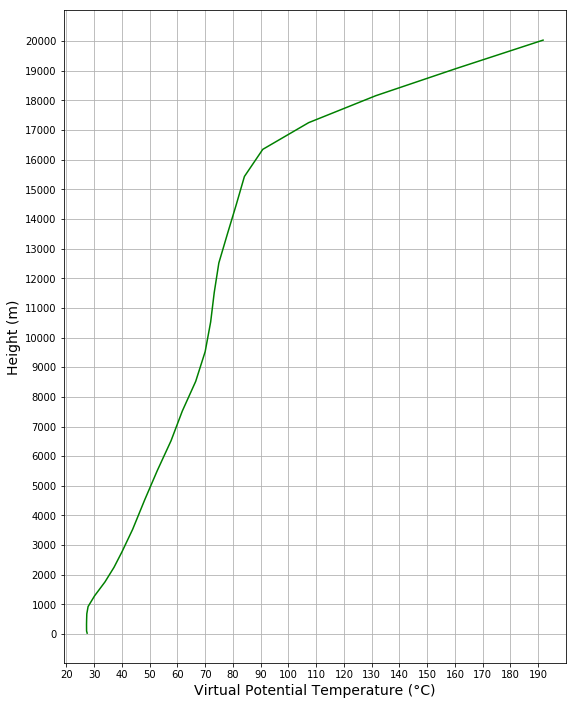

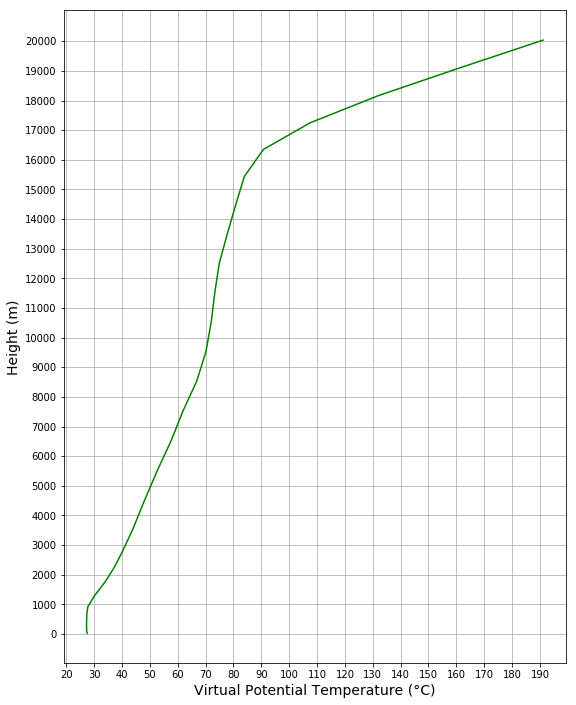

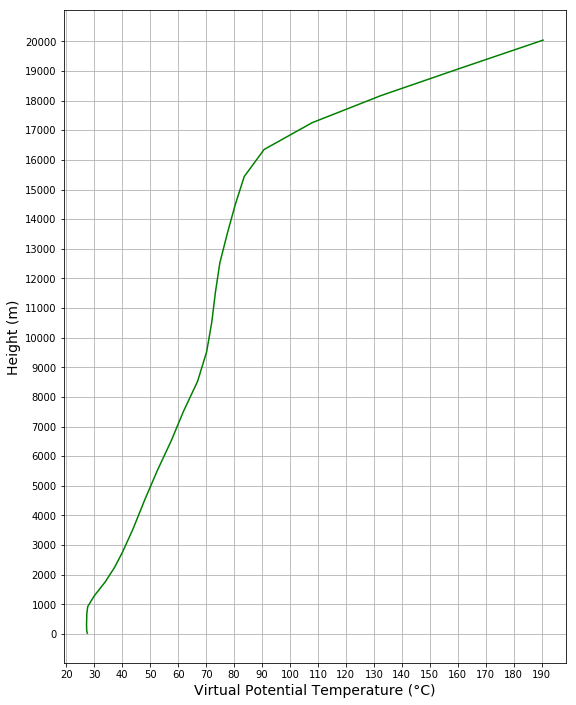

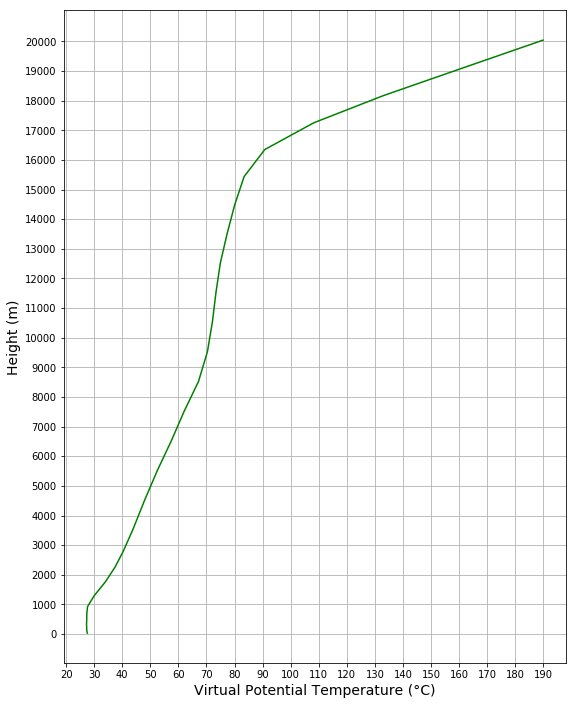

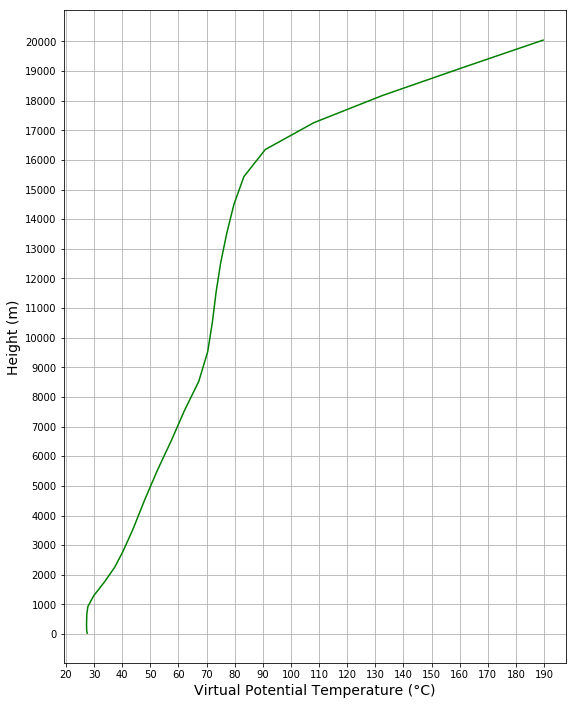

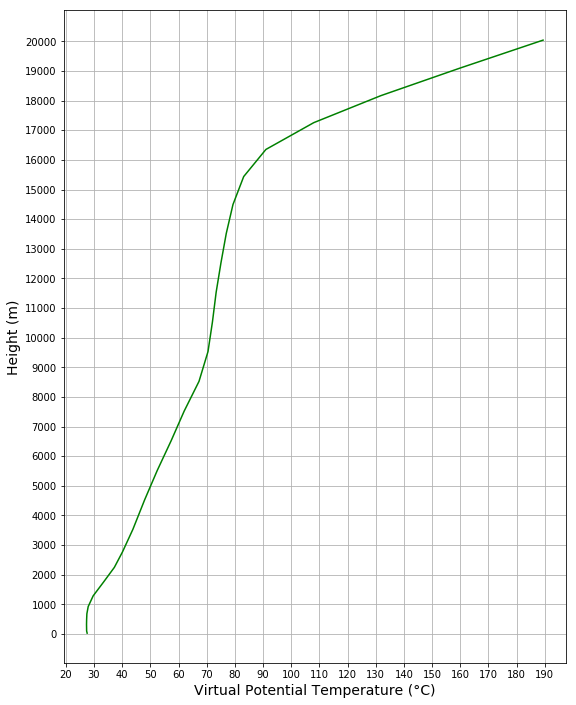

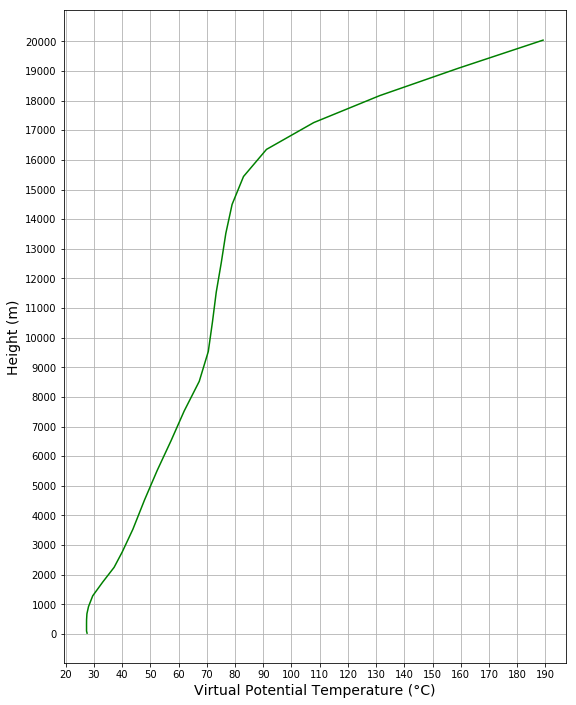

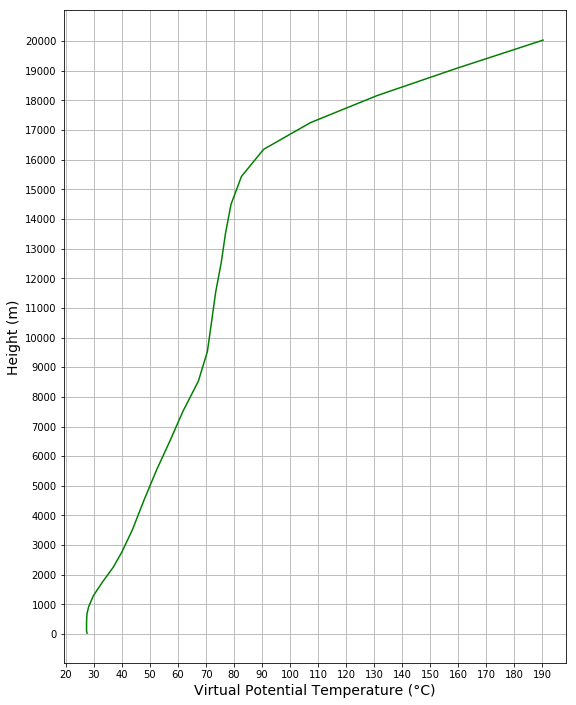

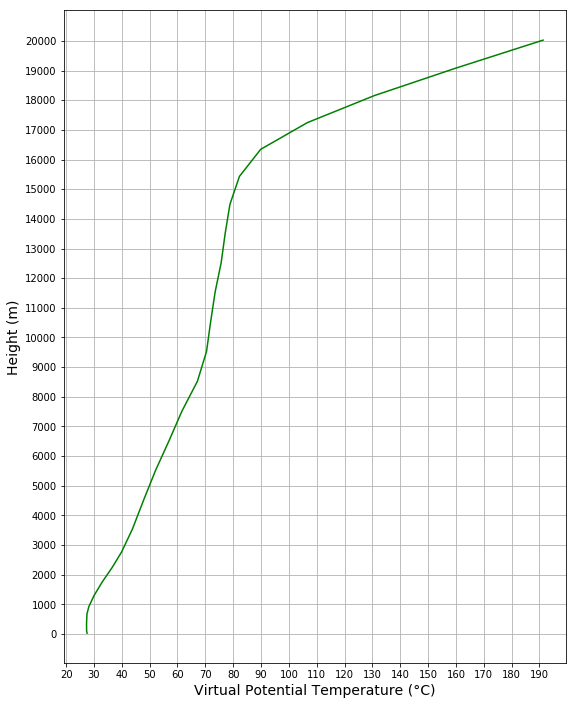

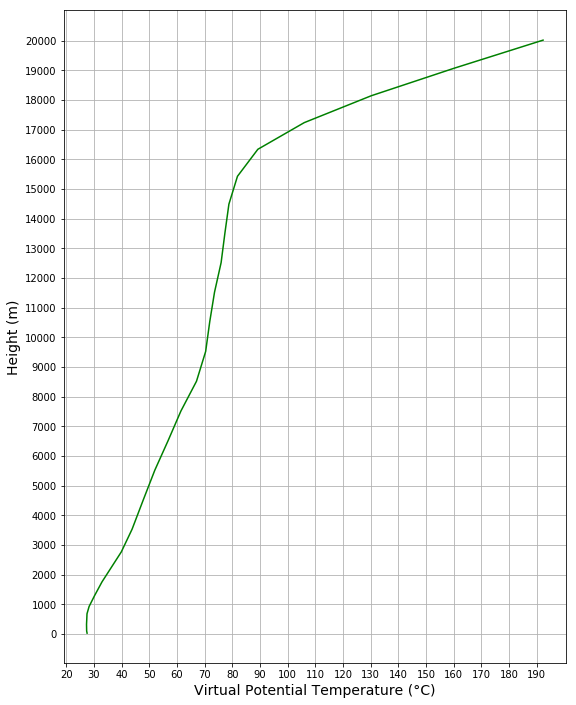

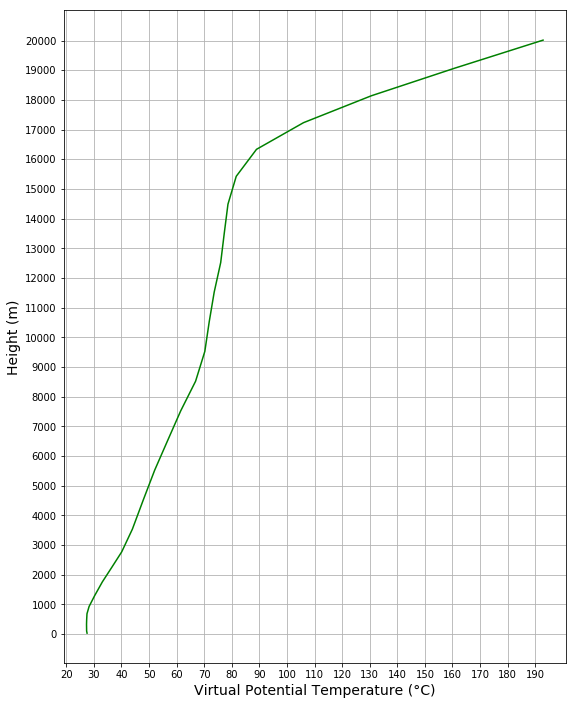

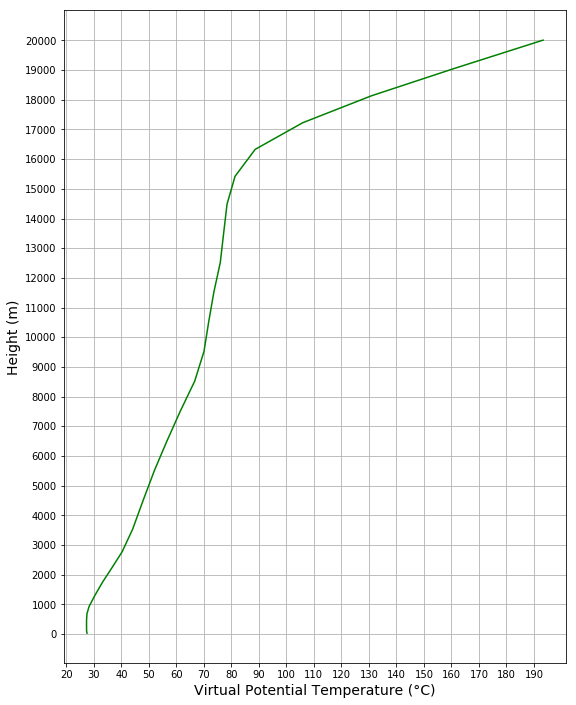

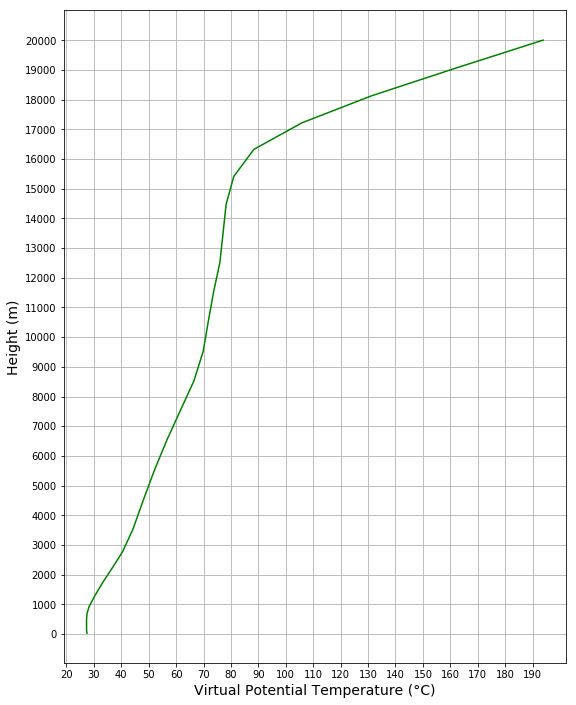

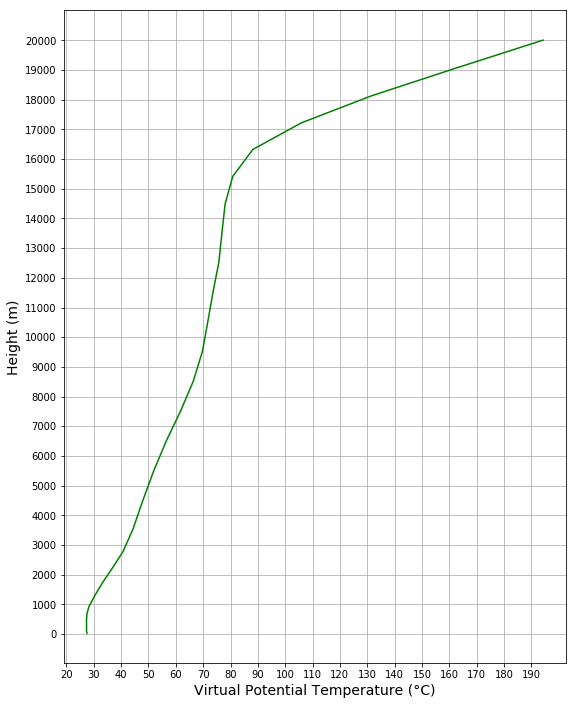

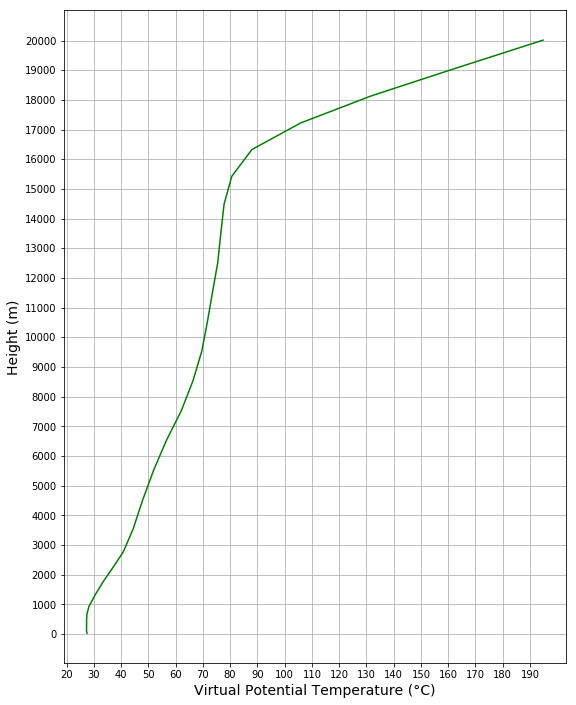

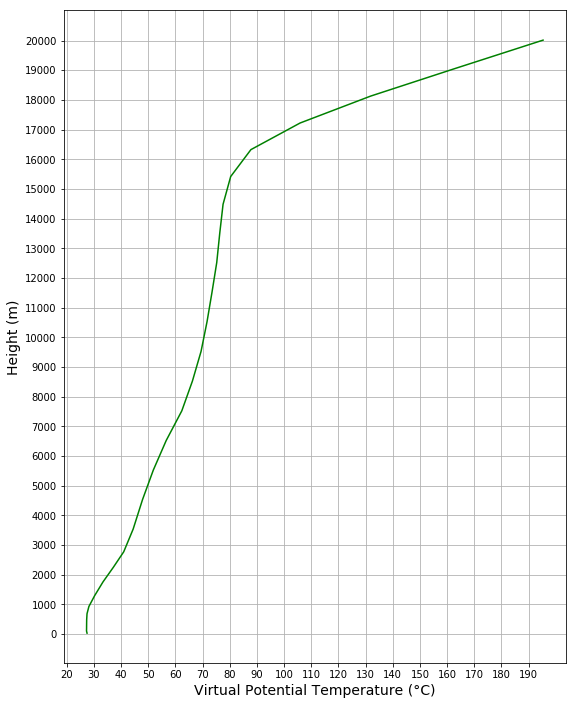

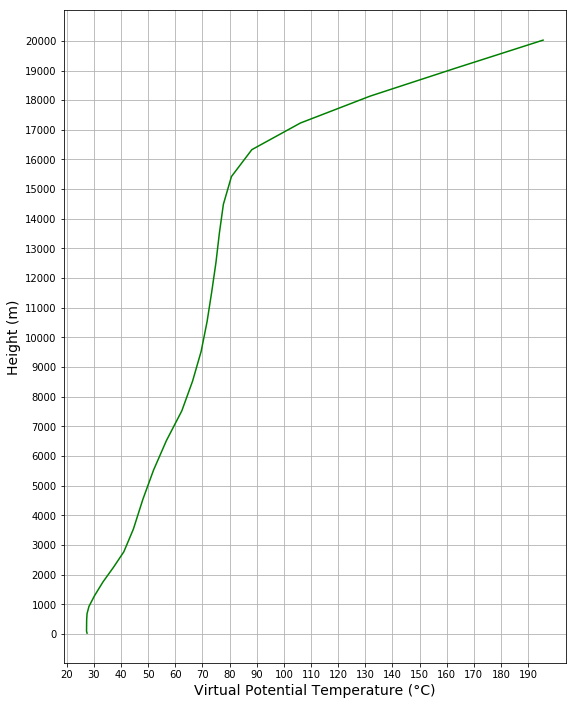

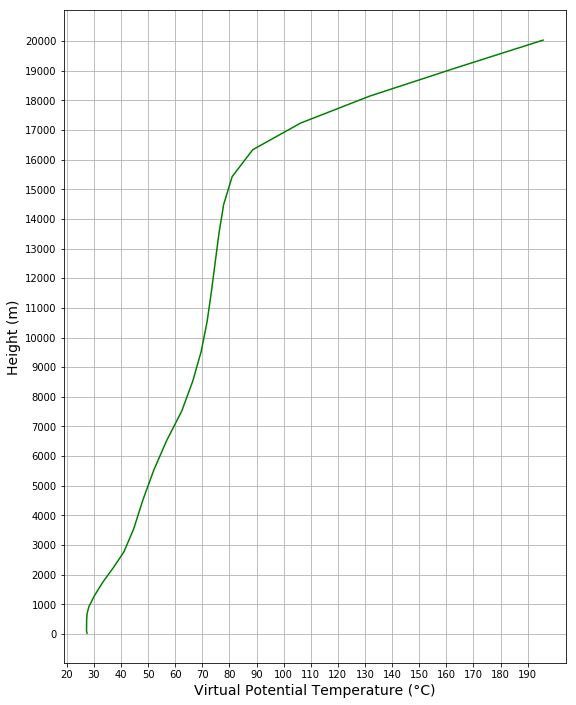

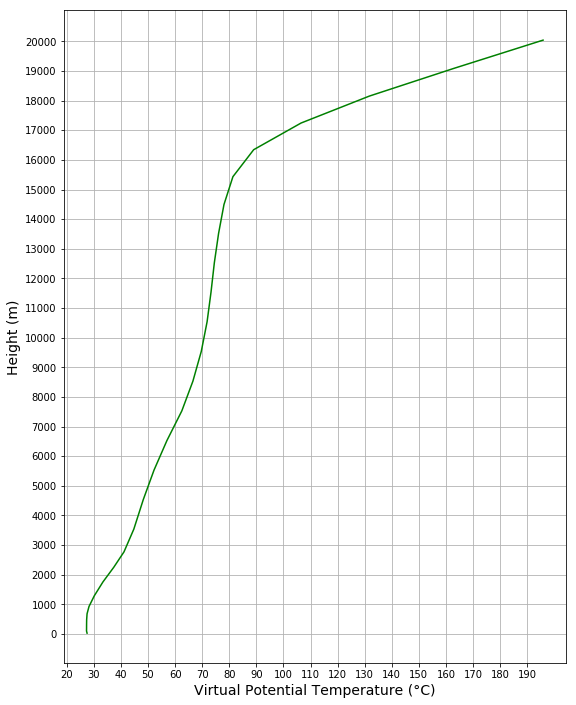

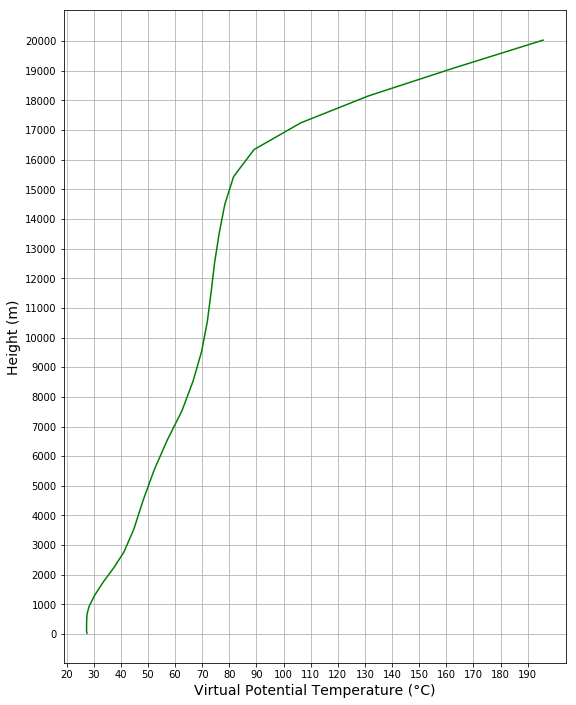

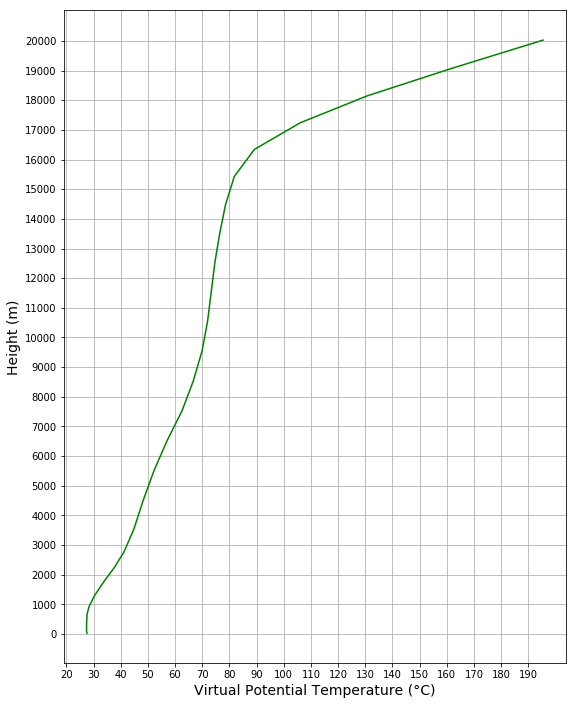

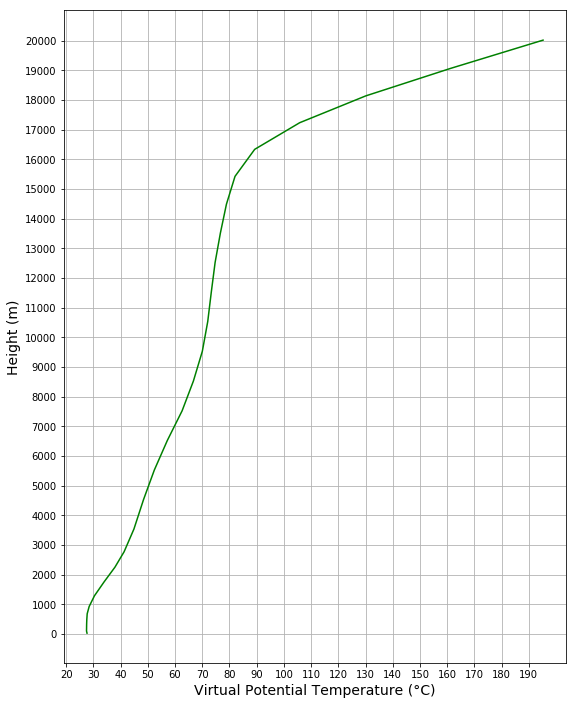

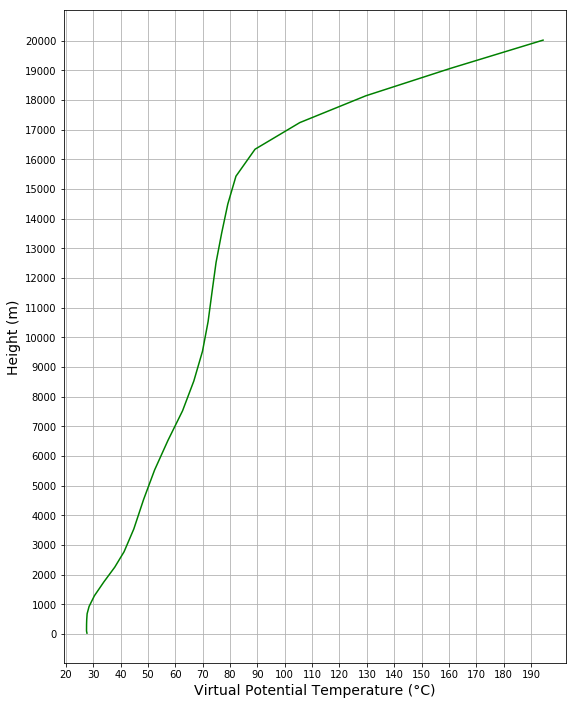

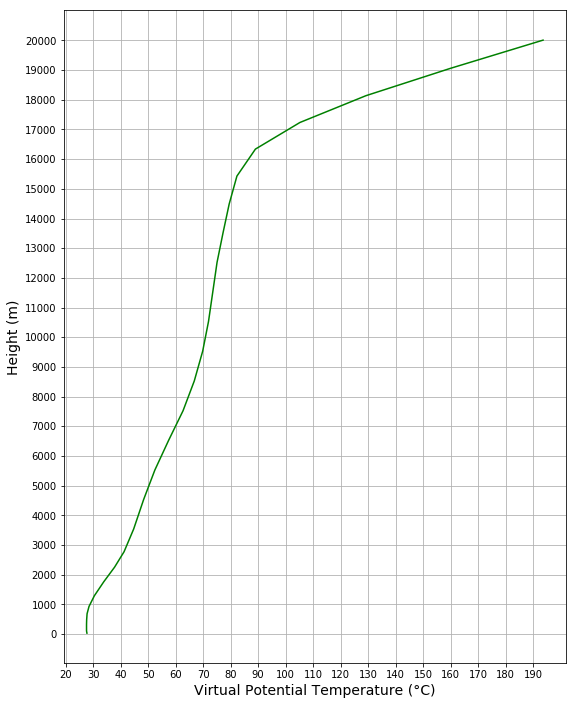

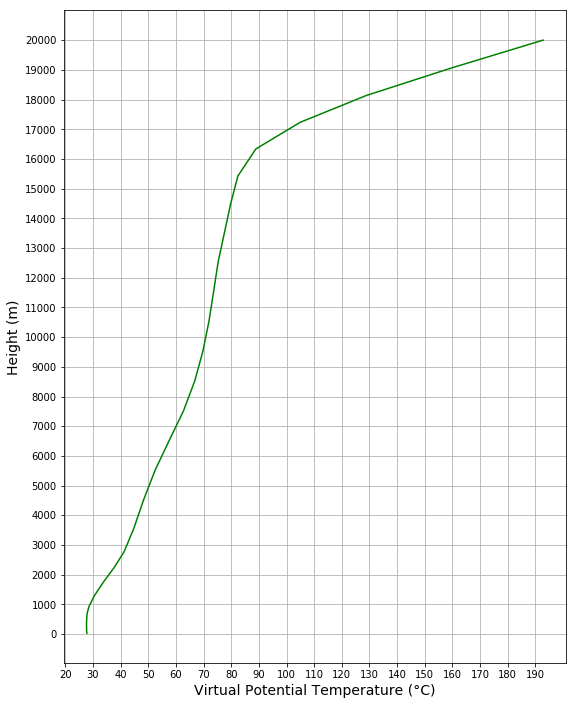

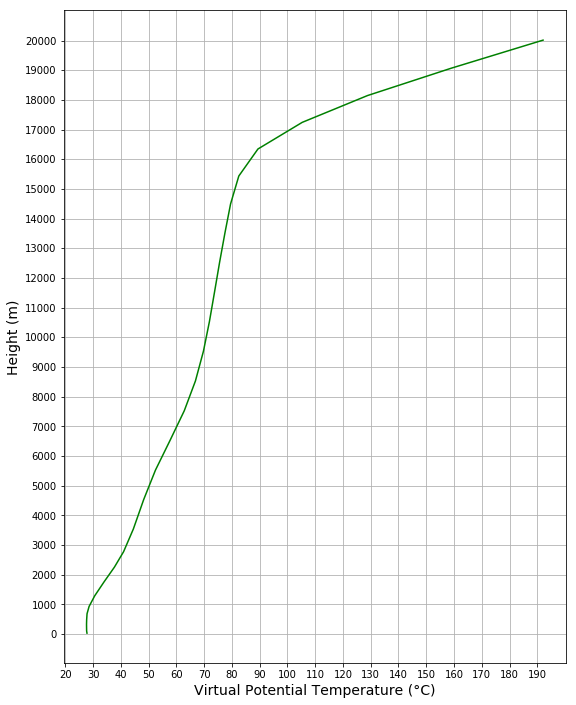

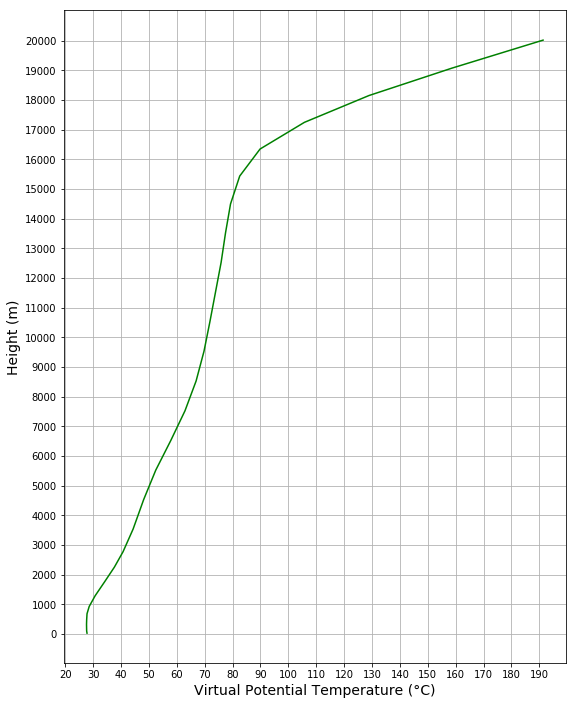

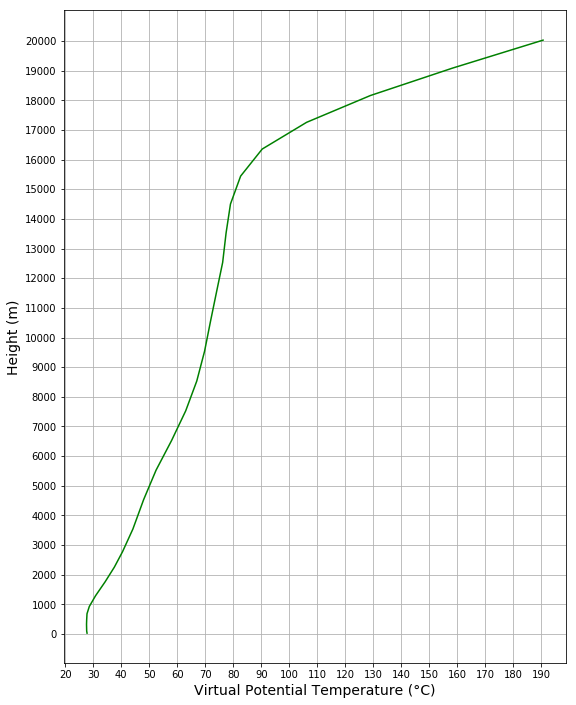

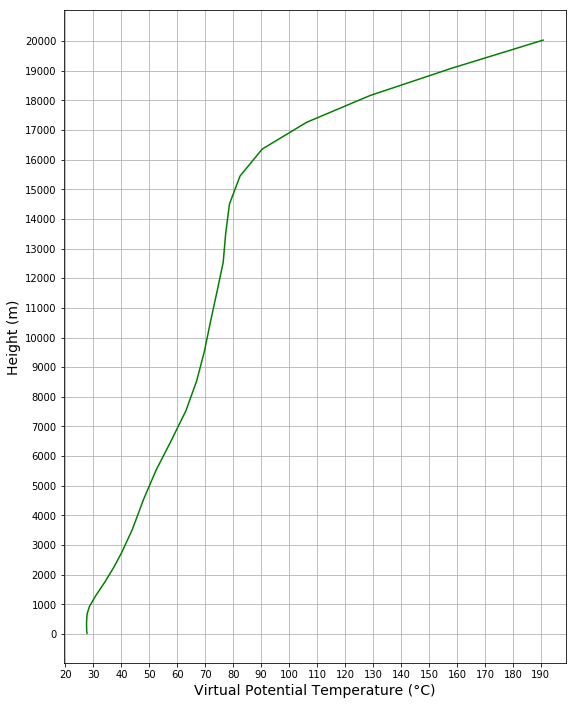

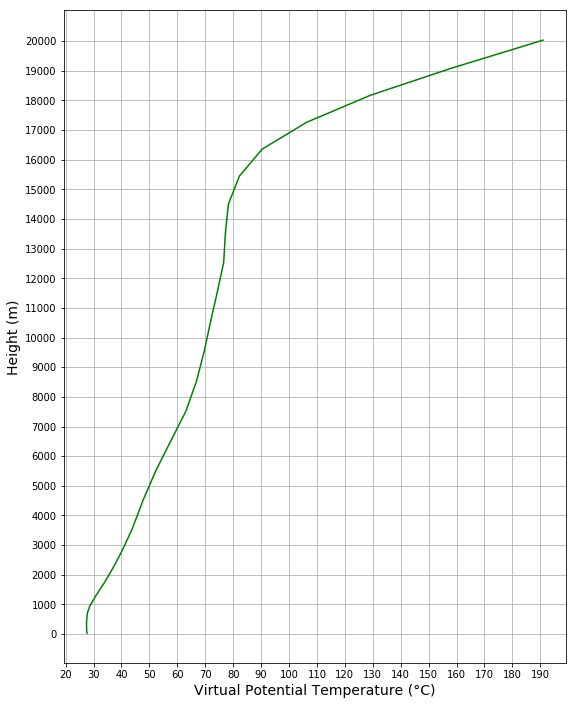

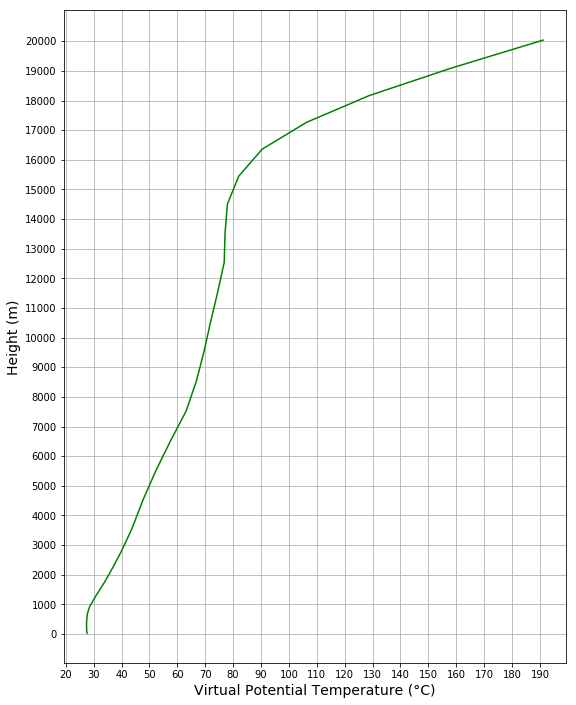

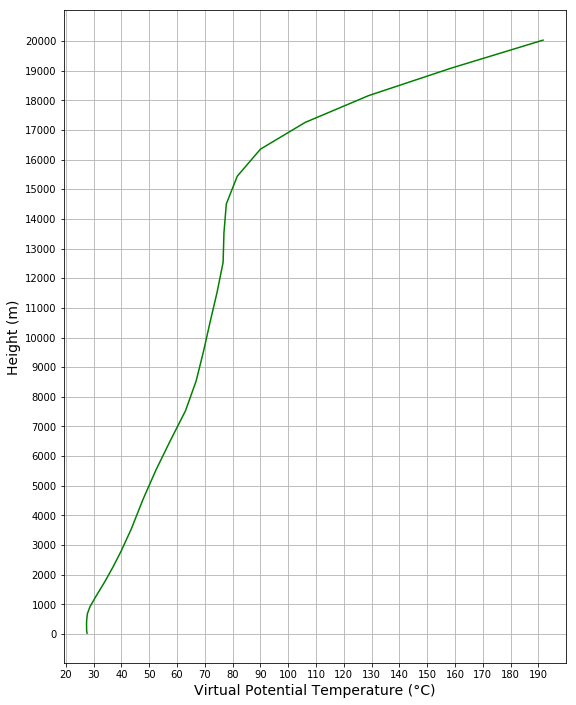

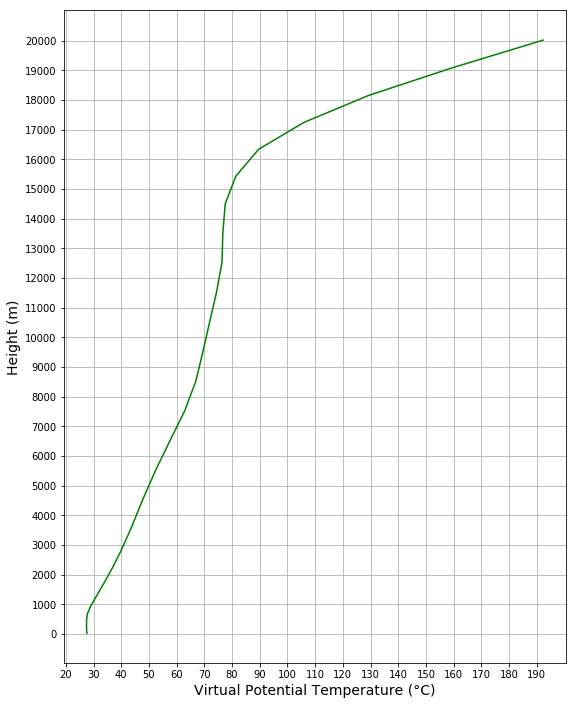

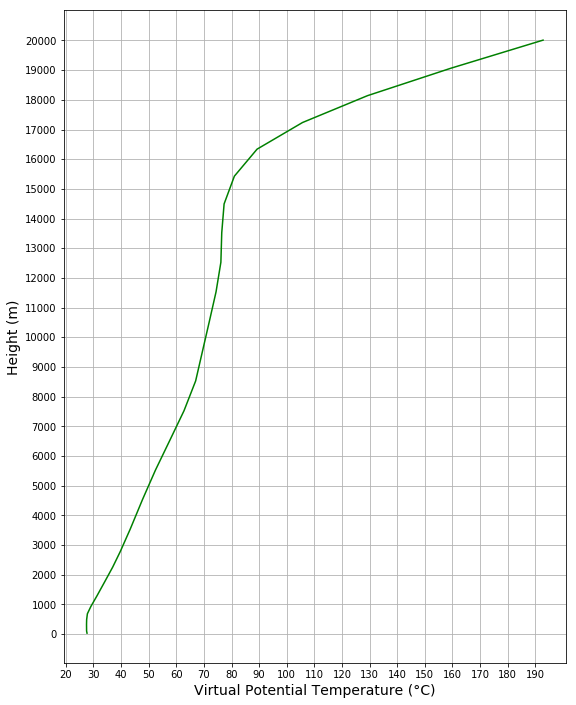

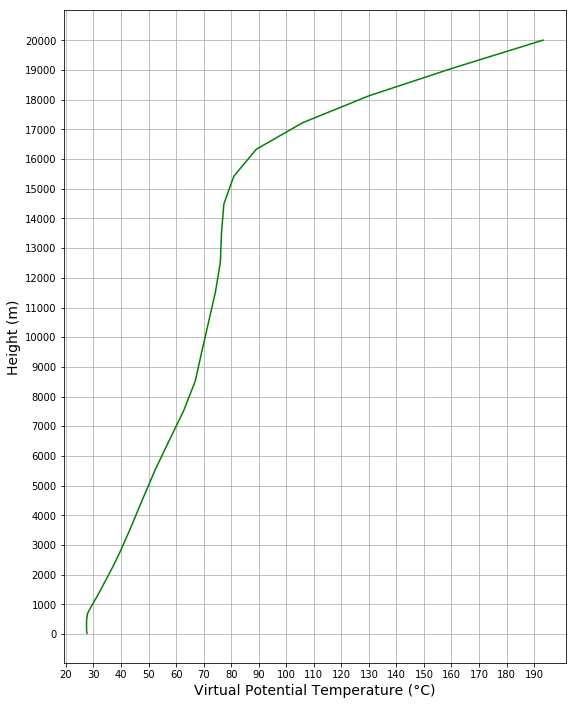

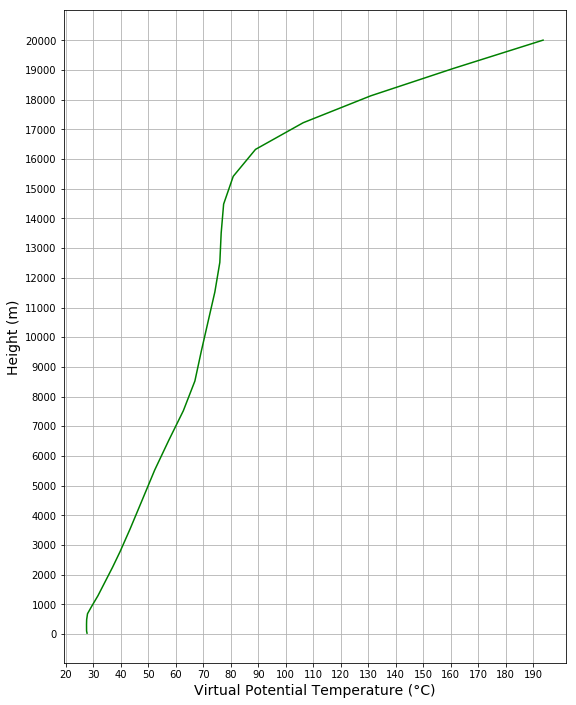

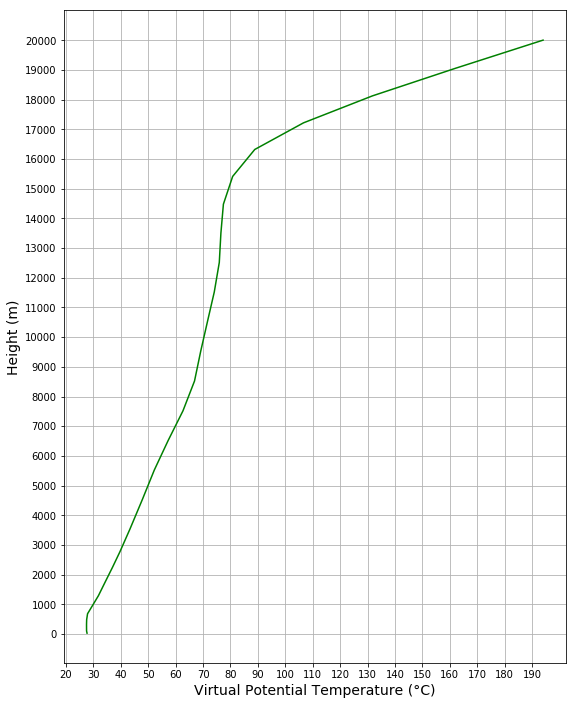

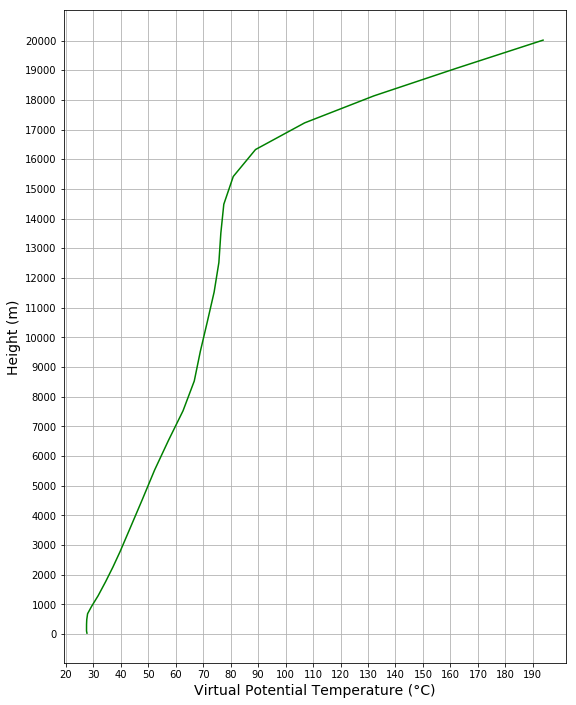

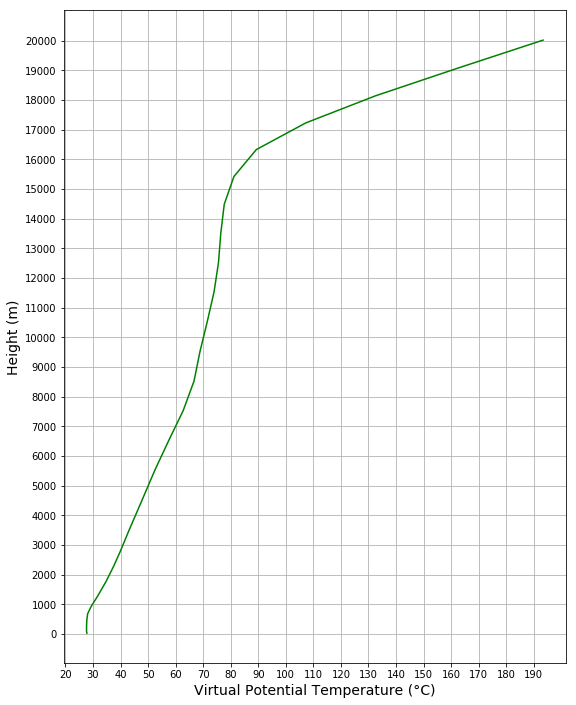

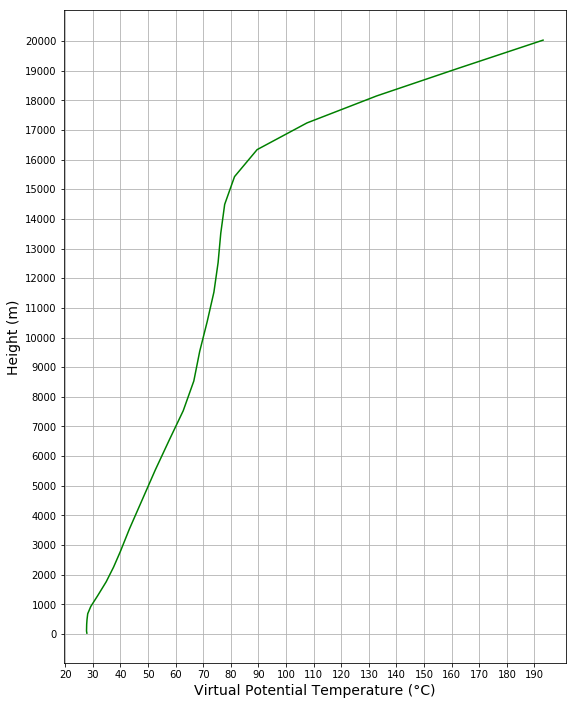

In [20]:
#file 1_65 LAUT
for time in range(0,73):
    xx = int(time)
    RH1_65 = getvar(file1_65,"temp",units='kelvin',timeidx=xx)
    P1_65 = getvar(file1_65,"p",timeidx=xx)
    Z1_65 = getvar(file1_65,"z",units='m',timeidx=xx)
    D1_65 = getvar(file1_65,"QVAPOR",timeidx=xx)
    
    Dl1_65 = D1_65[:,40,50]
    Pl1_65 = P1_65[:,40,50]
    RHl1_65 = RH1_65[:,40,50]
    Zl1_65 = Z1_65[:,40,50]
    
    
    #thvl2 = mpcalc.static_stability(Pl1_65, RHl1_65, axis=0)
    thvl = mpcalc.virtual_potential_temperature(Pl1_65, RHl1_65, np.array(Dl1_65), molecular_weight_ratio=0.622)
    thvl2 = np.array(thvl)-273.15
    
    fig = plt.figure(figsize=(9,12))
#add_metpy_logo(fig, 115, 100)
    ax = plt.axes()

    ax.plot(thvl2, Zl1_65, 'g')
    #skew.plot(Pl1_11, thv1_11, 'g')
    #skew.plot_barbs(p, u, v)
    ax.set_xticks(np.arange(20, 200, 10))
    ax.set_yticks(np.arange(0,21000, 1000))
    ax.set_ylabel('Height (m)', fontsize=14)
    ax.set_xlabel('Virtual Potential Temperature (°C)',fontsize=14)

    #skew.ax.legend(["Temperature", "Dew Point Temperature"],loc=0)
    plt.grid(True)
    plt.show()
    
    fig.savefig('plot/temperatur static/Laut/d01_T99_laut_ke_'+str(xx) +'.png', bbox='tight',dpi=100)

# DOMAIN 1-URBAN(PERKOTAAN)

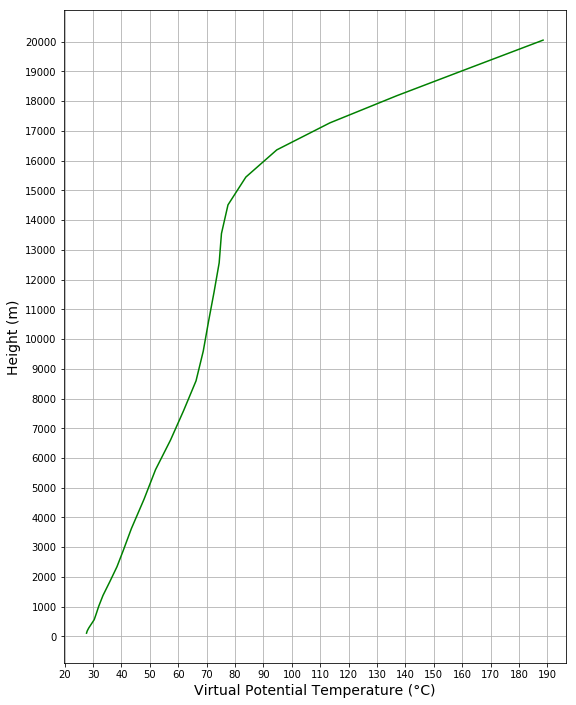

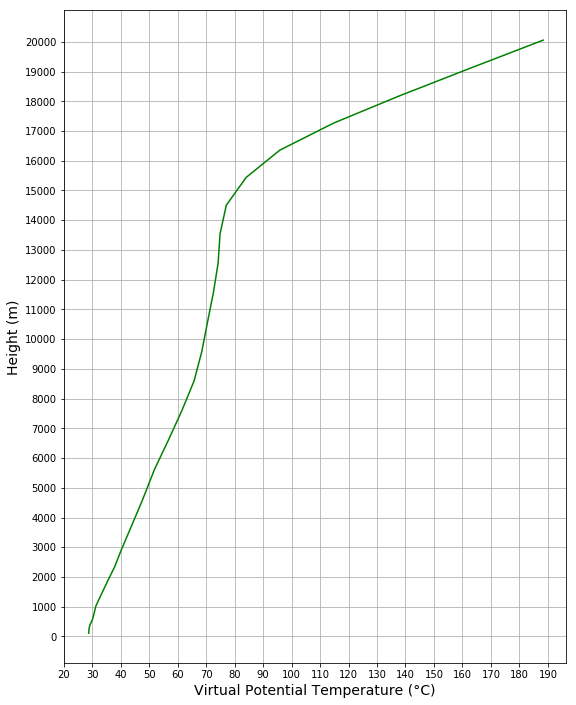

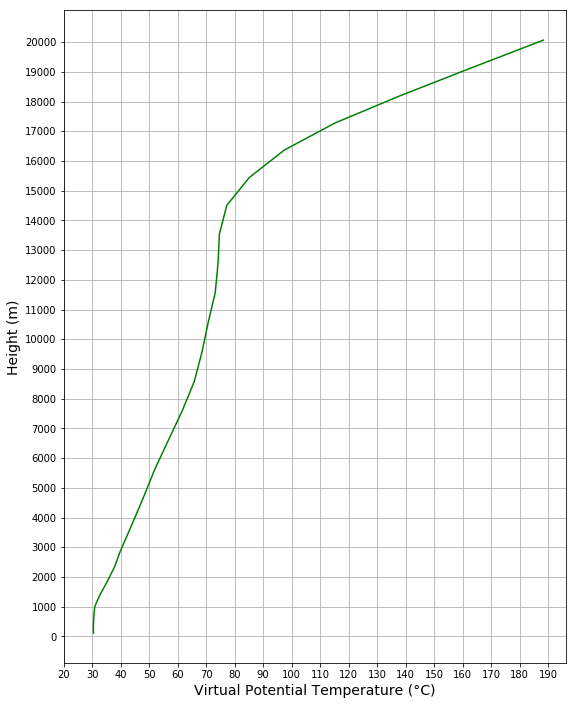

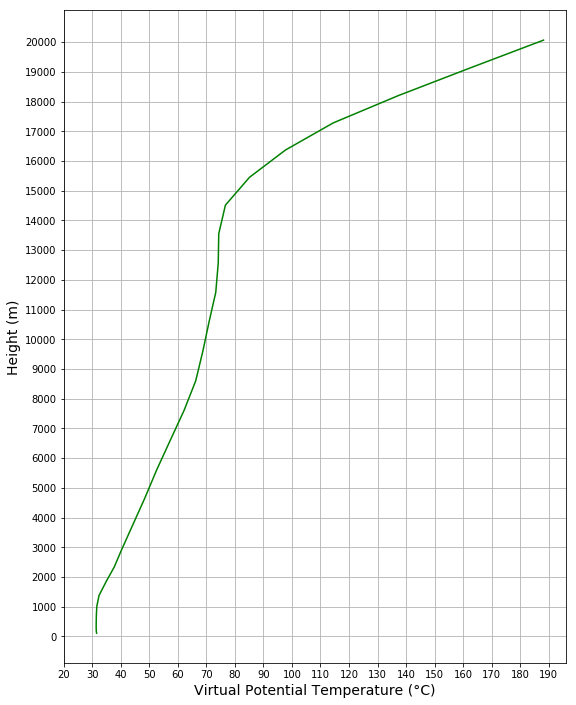

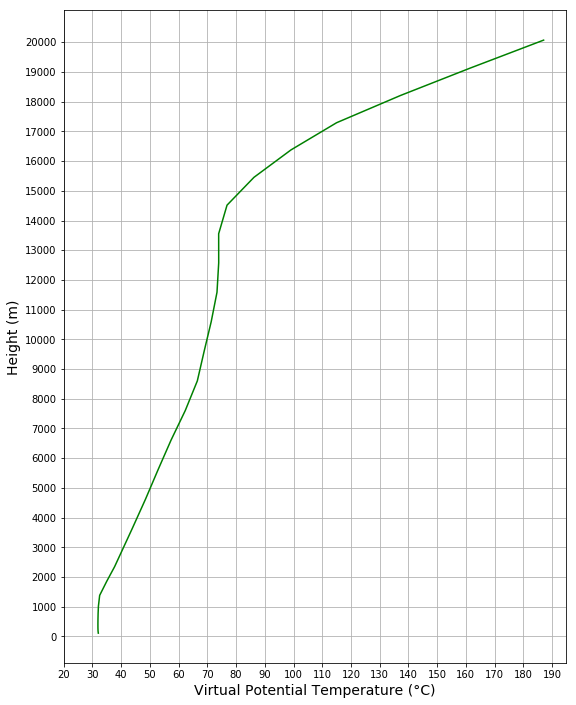

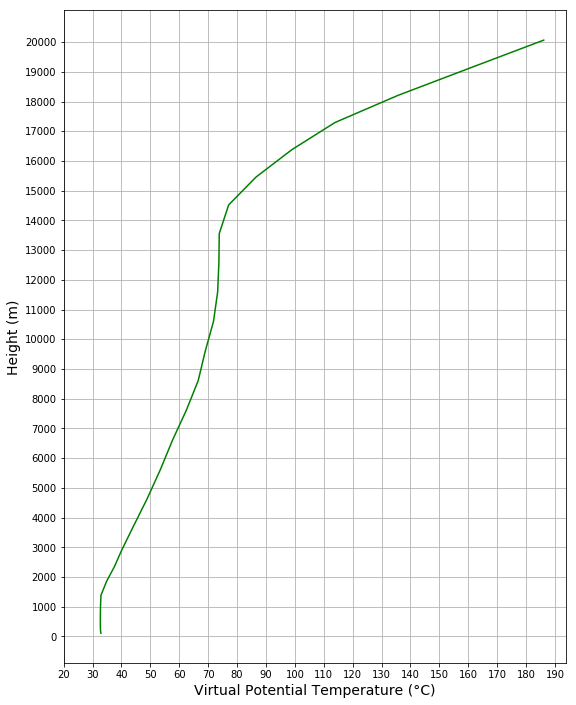

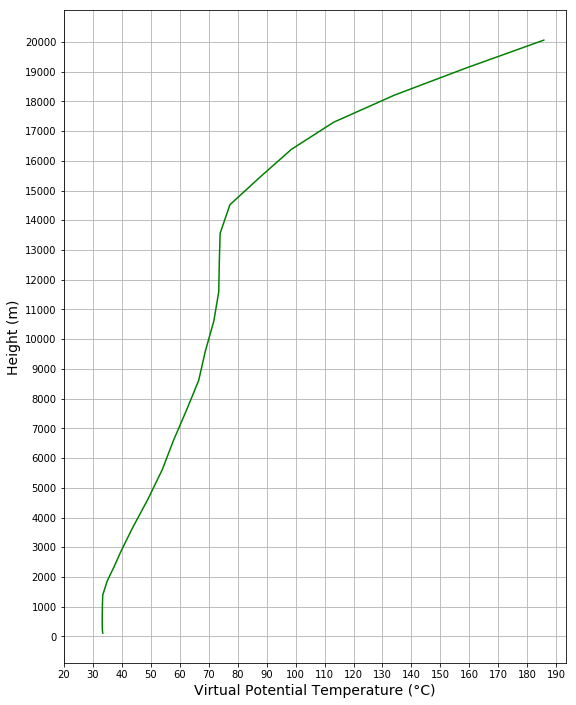

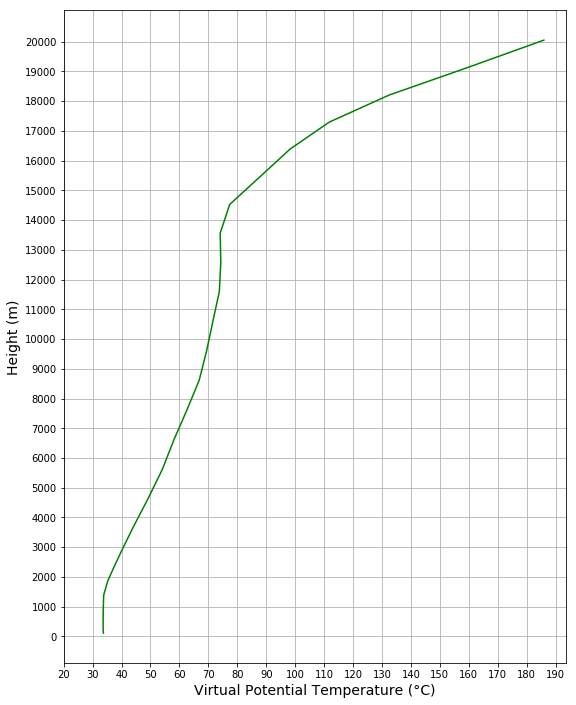

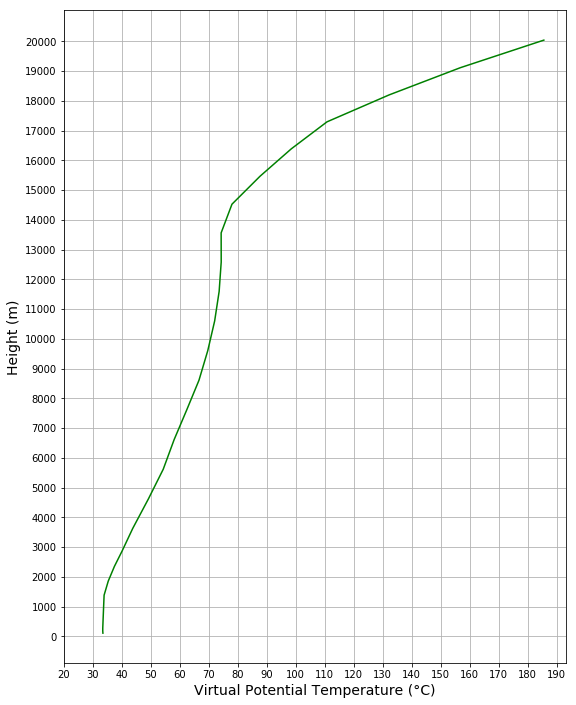

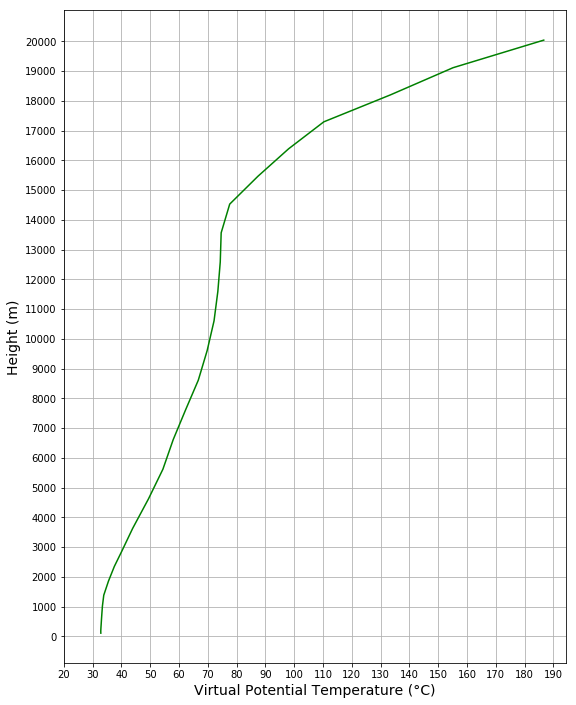

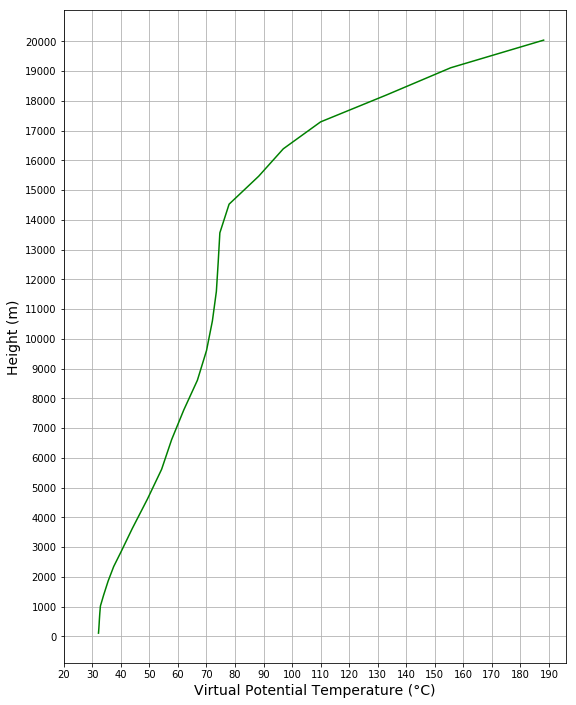

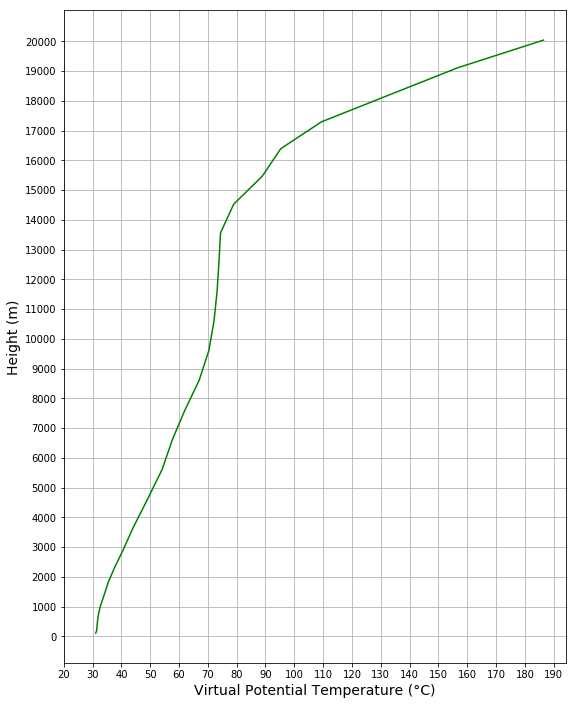

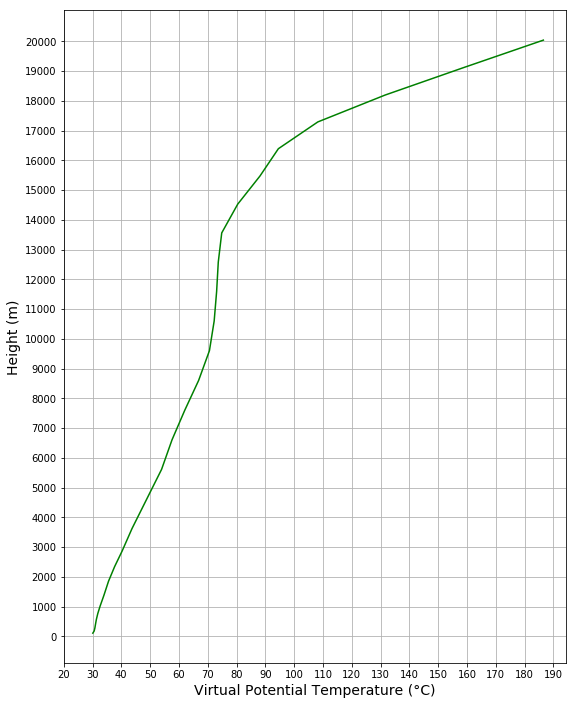

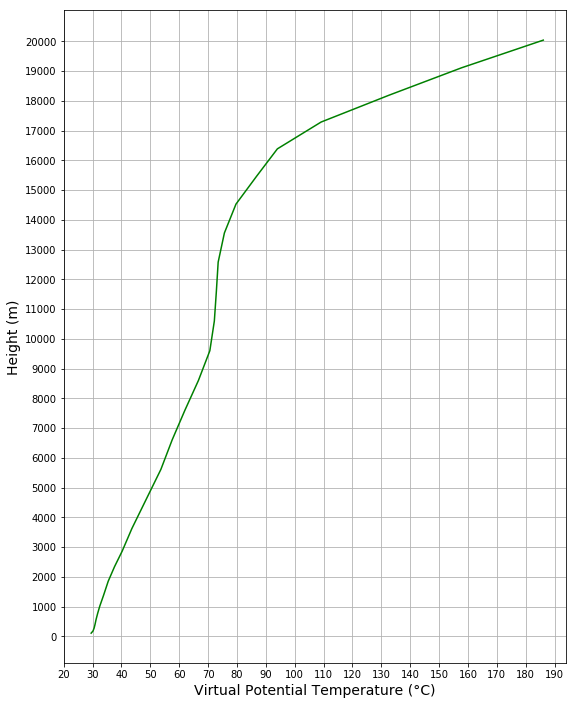

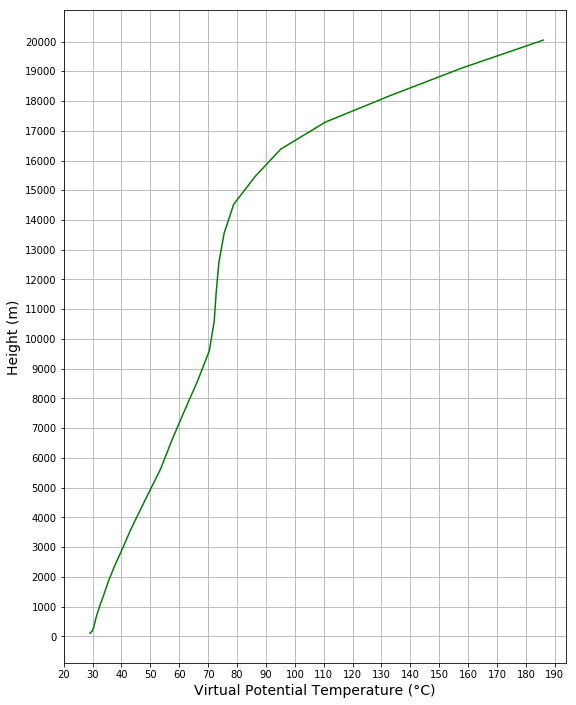

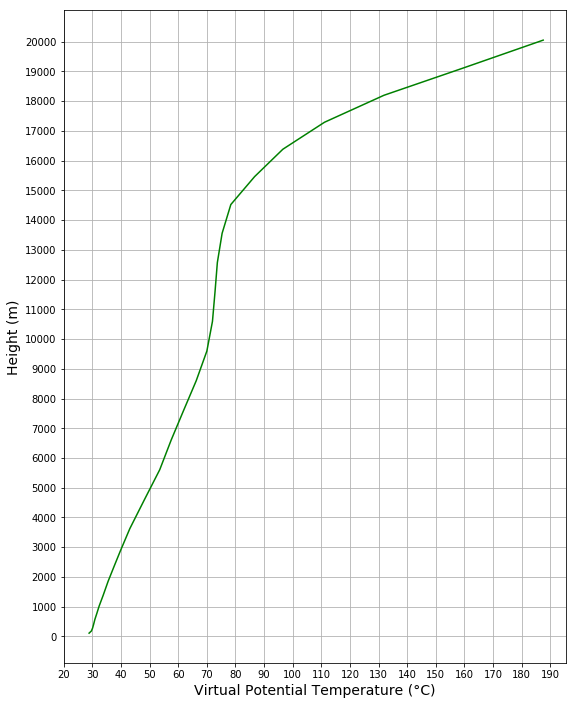

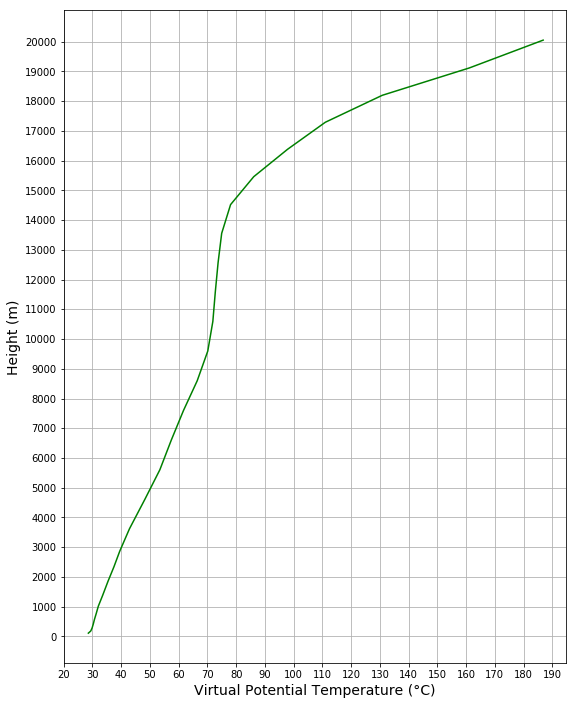

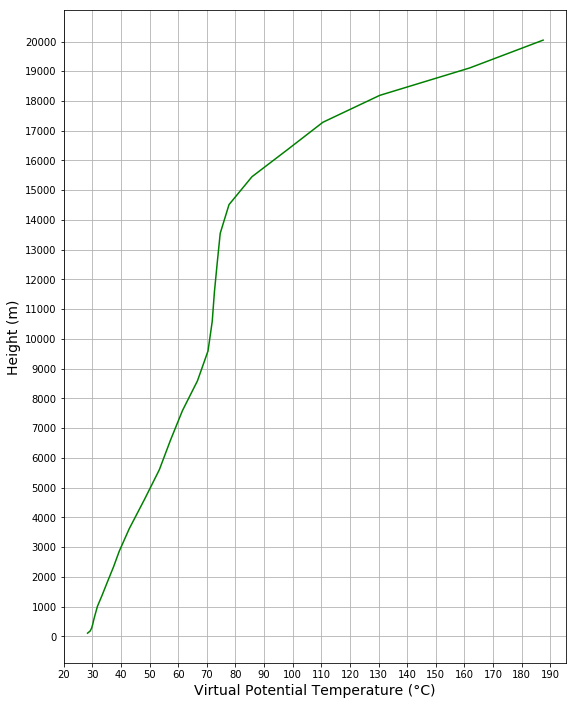

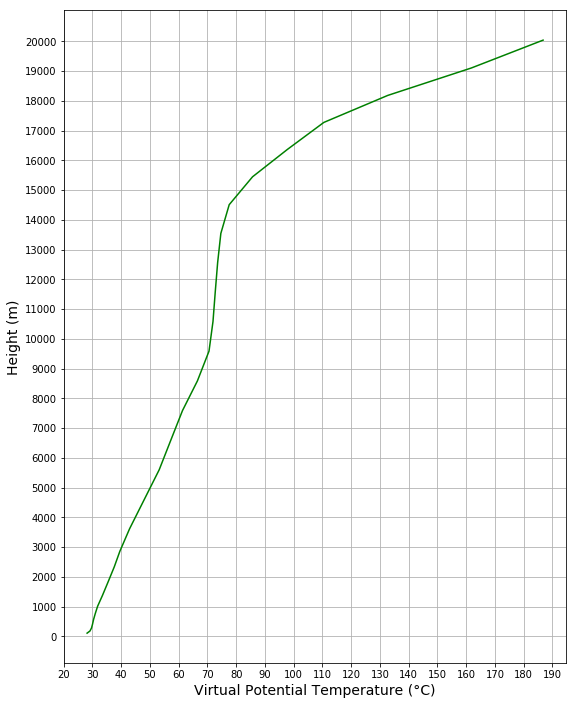

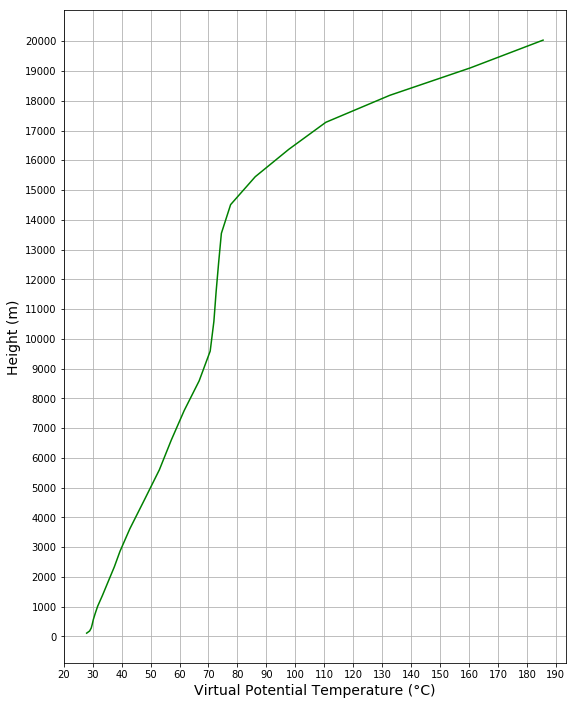

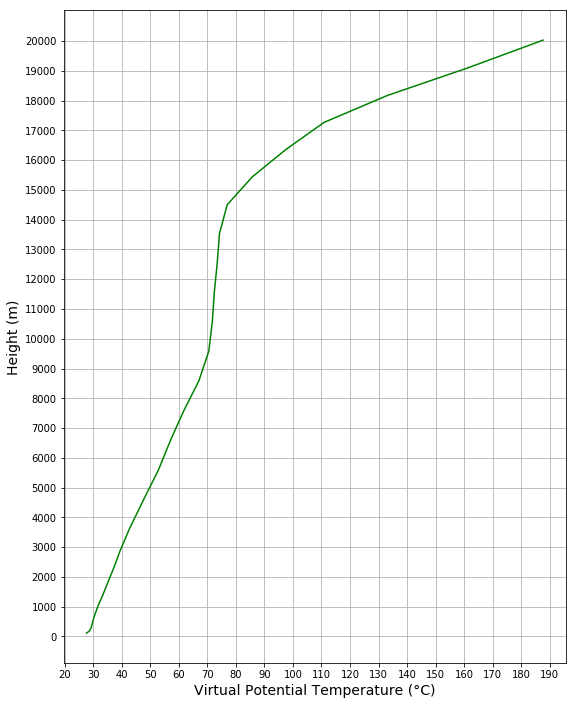

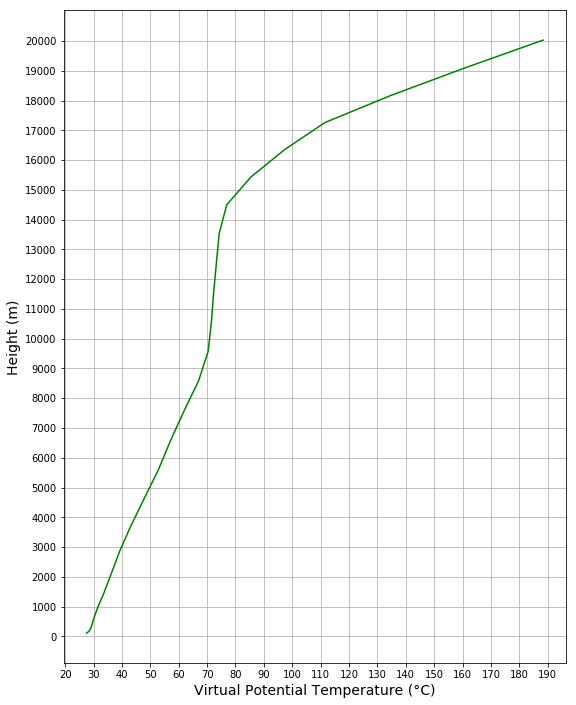

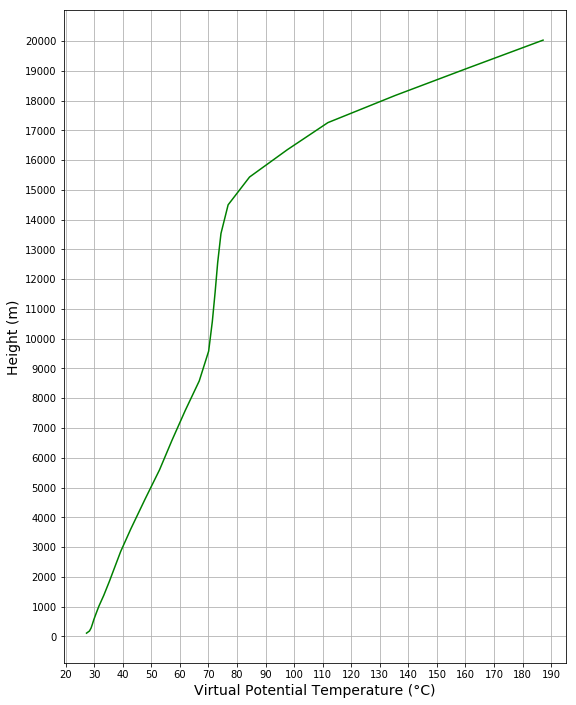

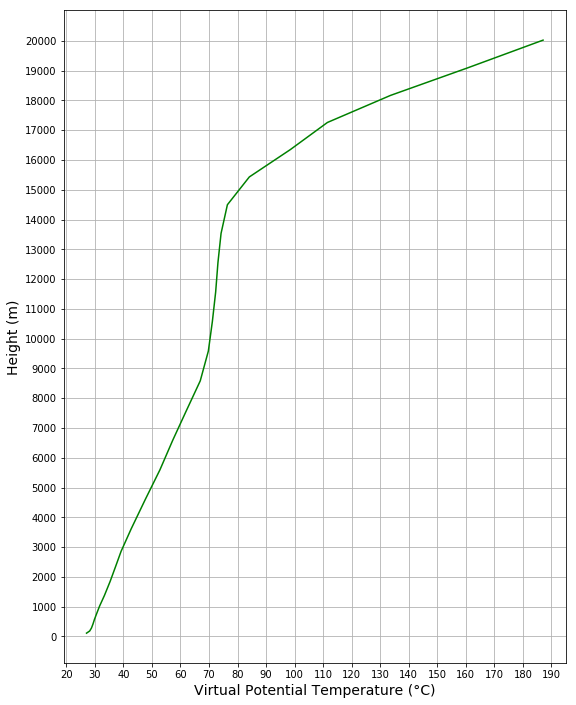

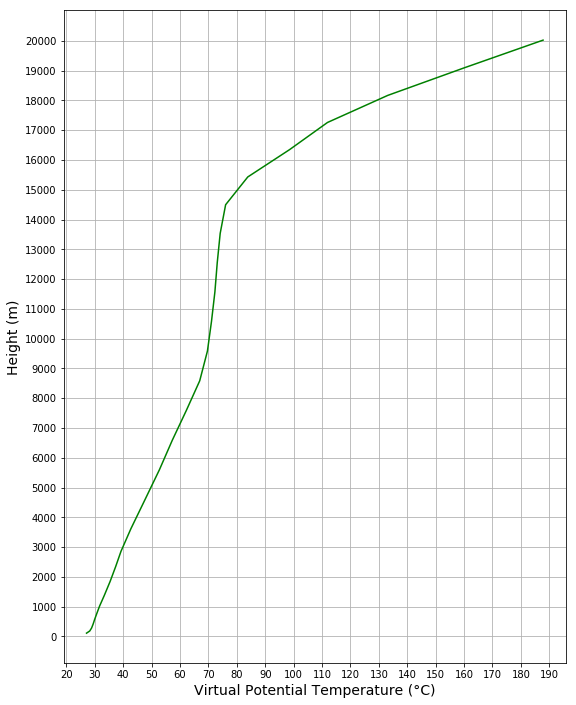

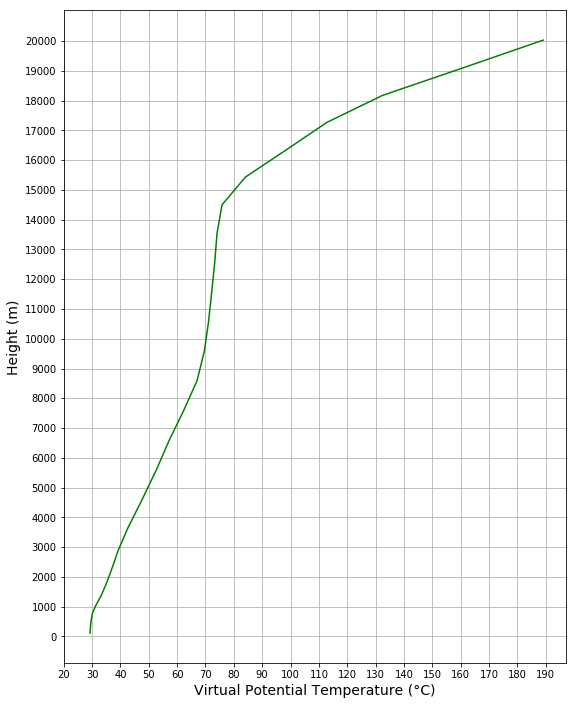

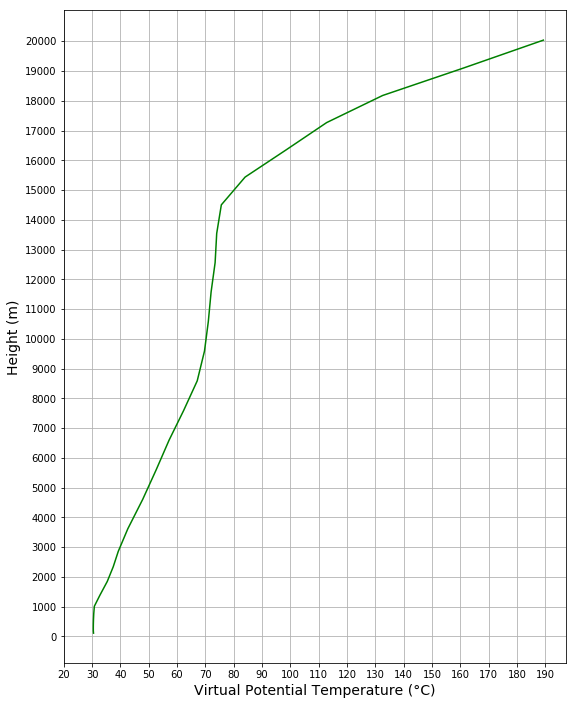

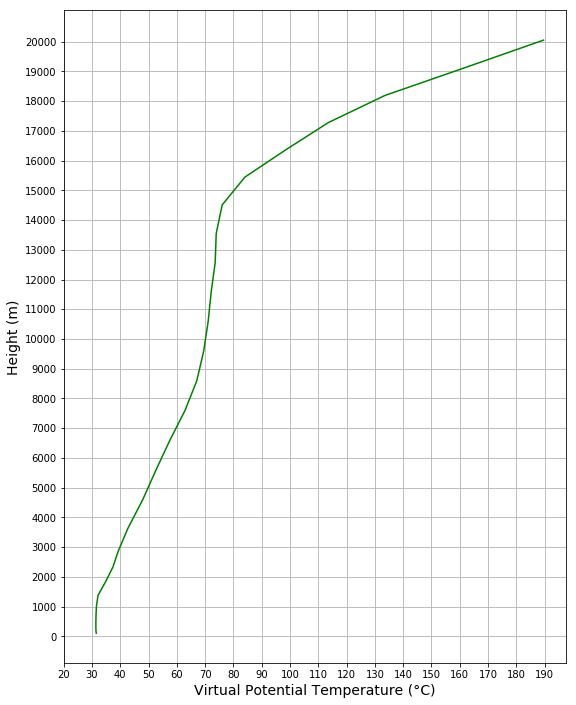

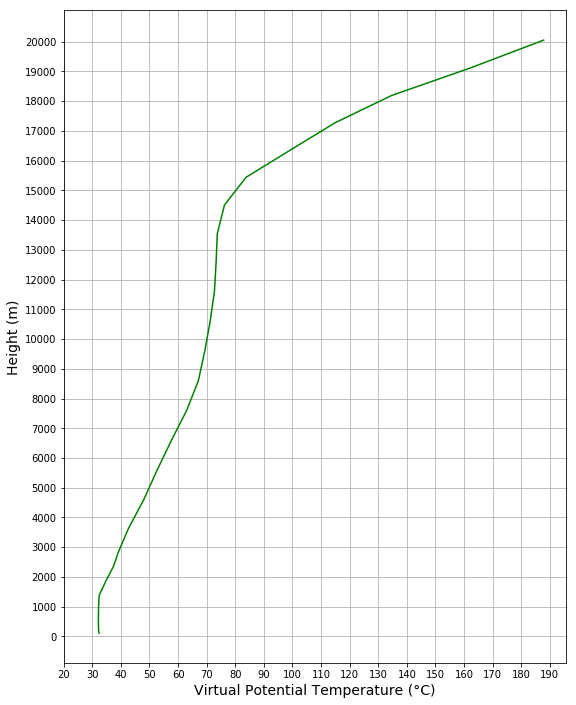

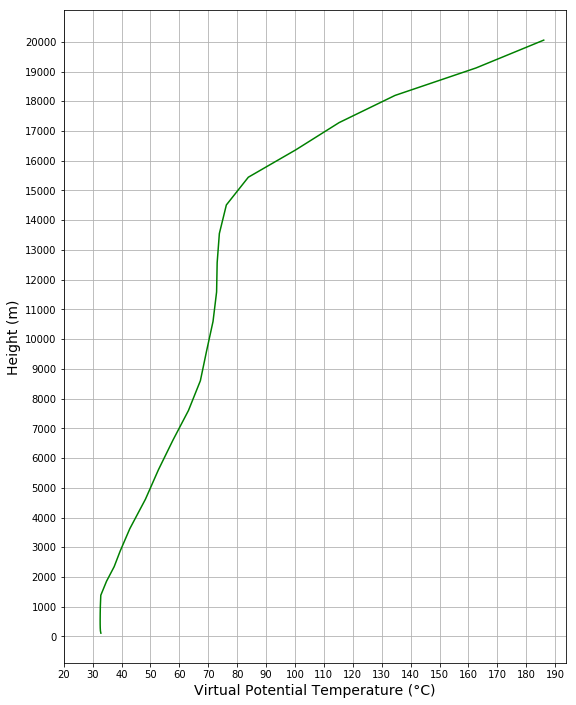

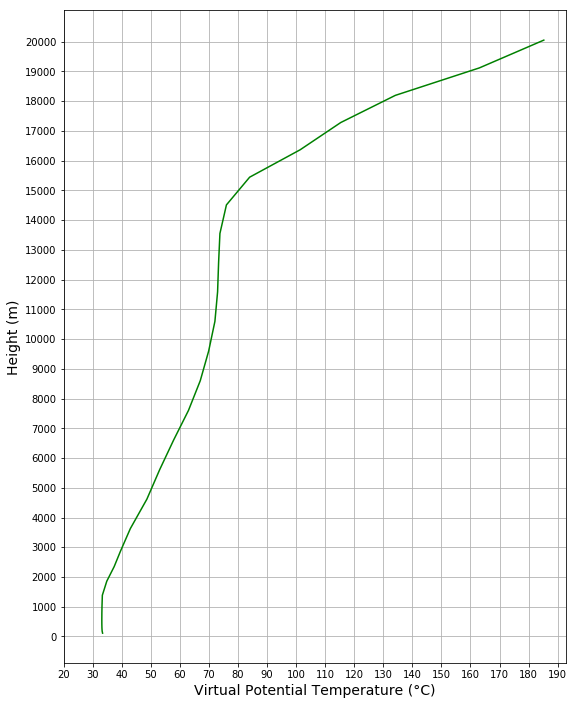

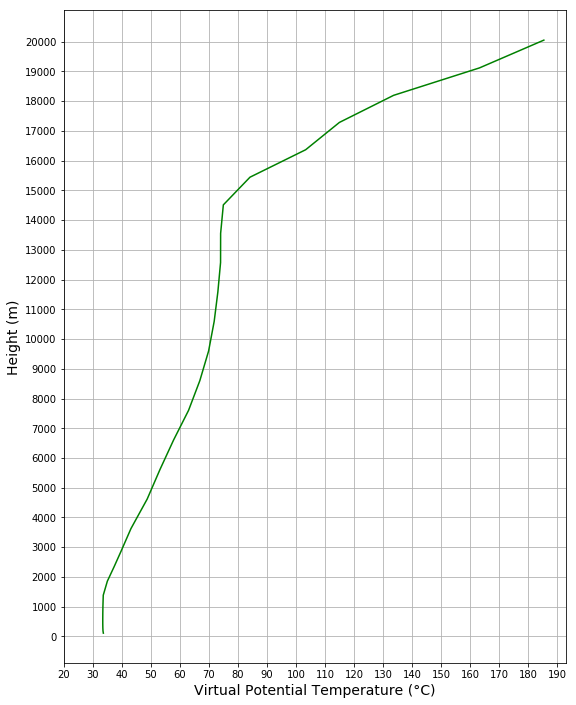

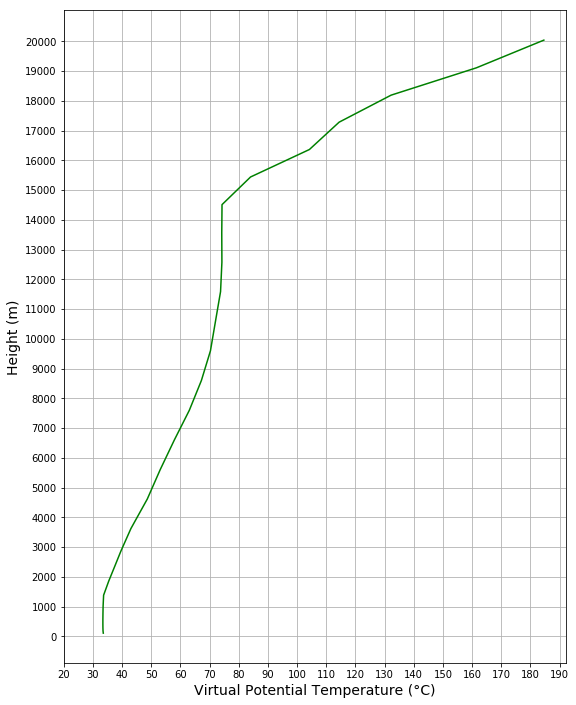

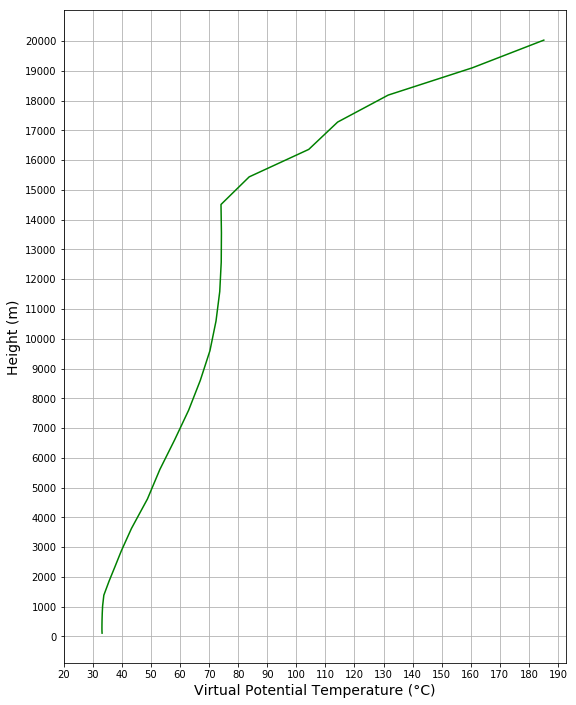

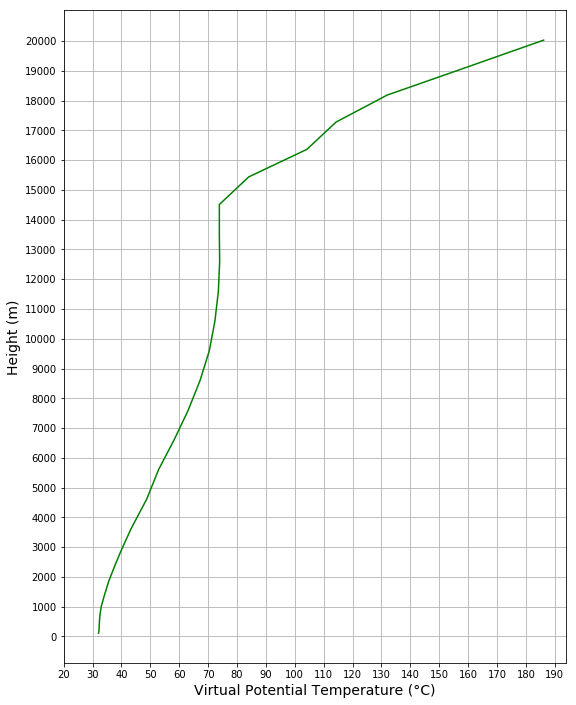

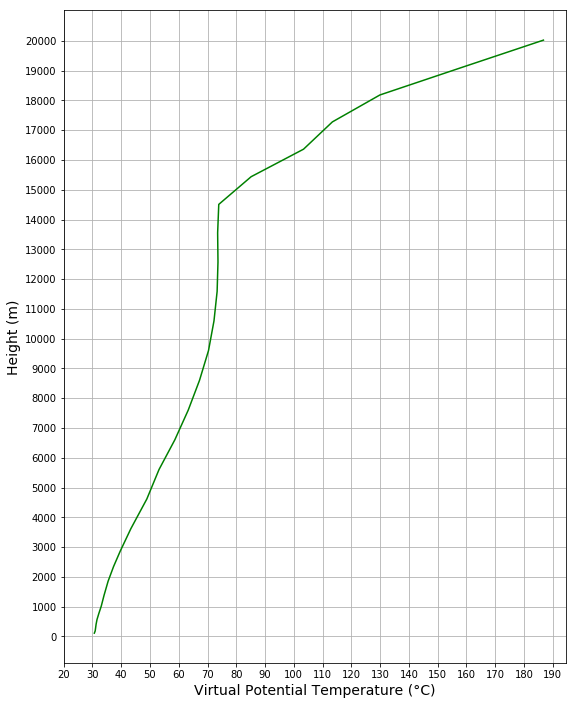

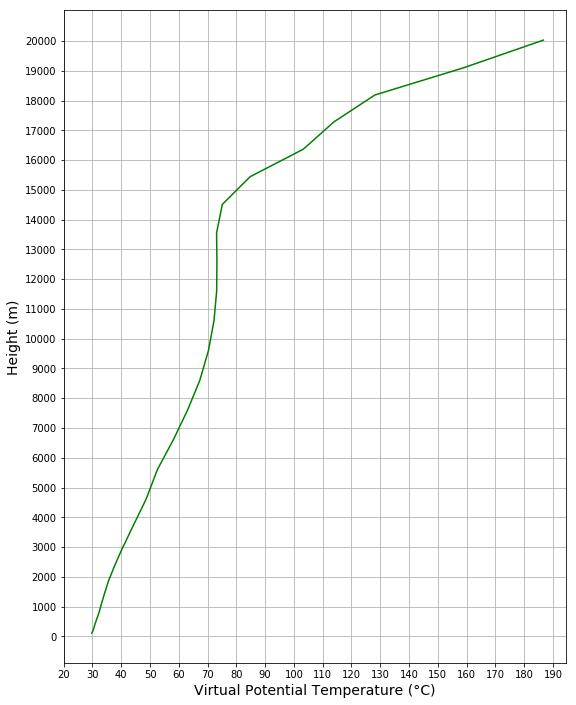

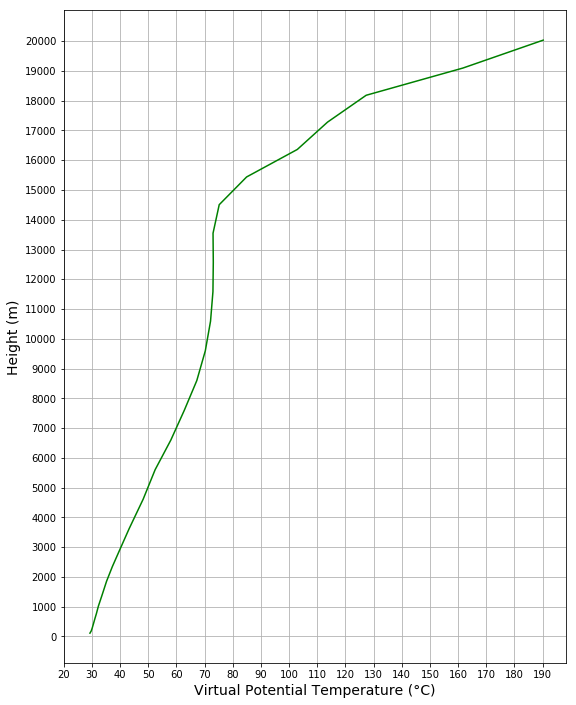

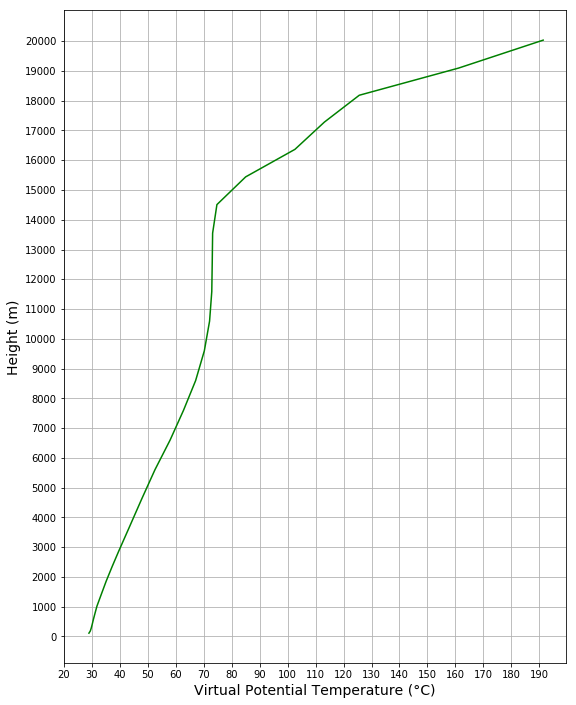

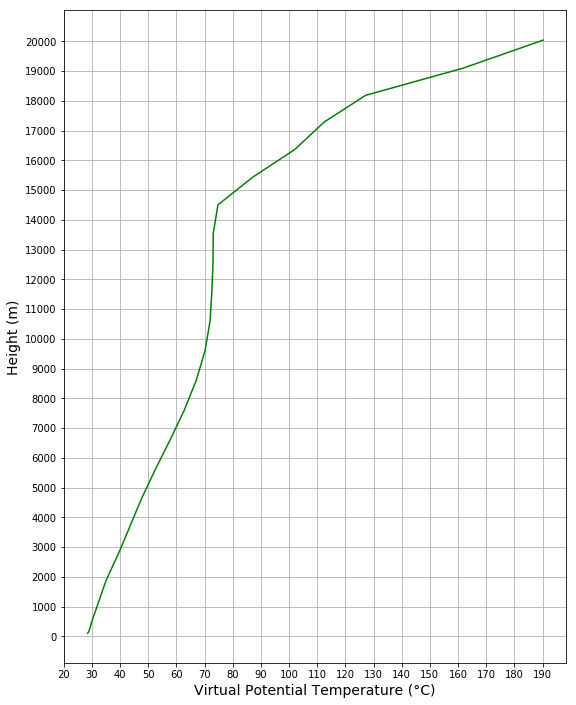

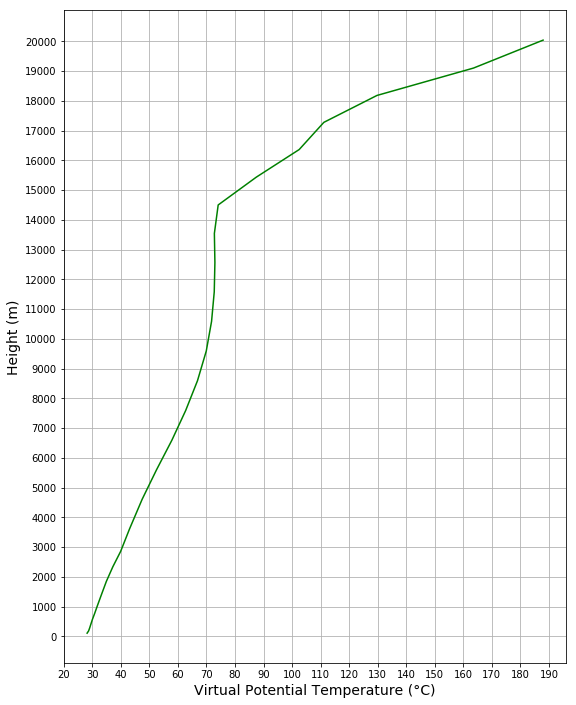

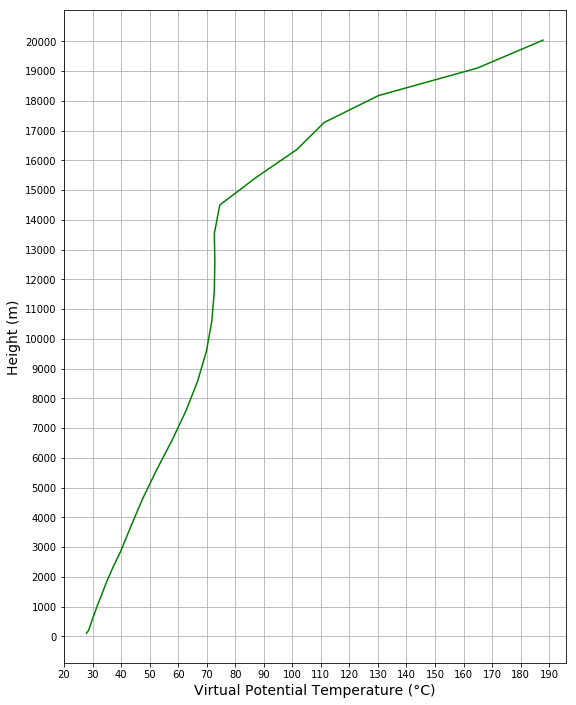

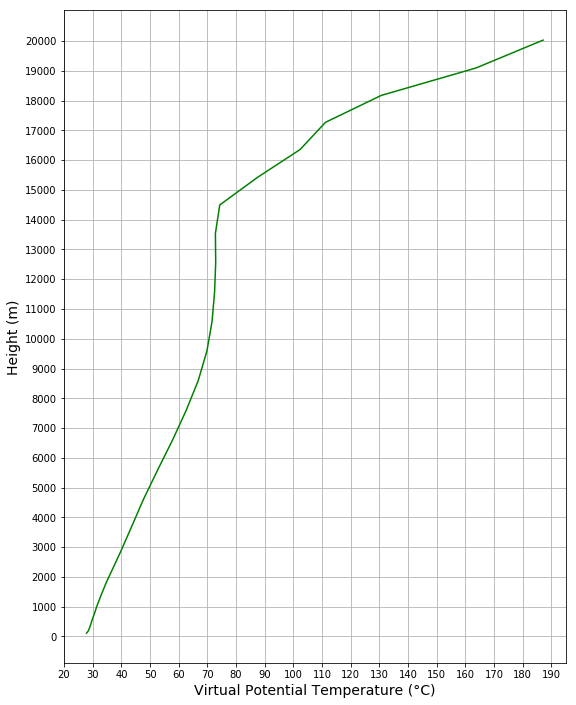

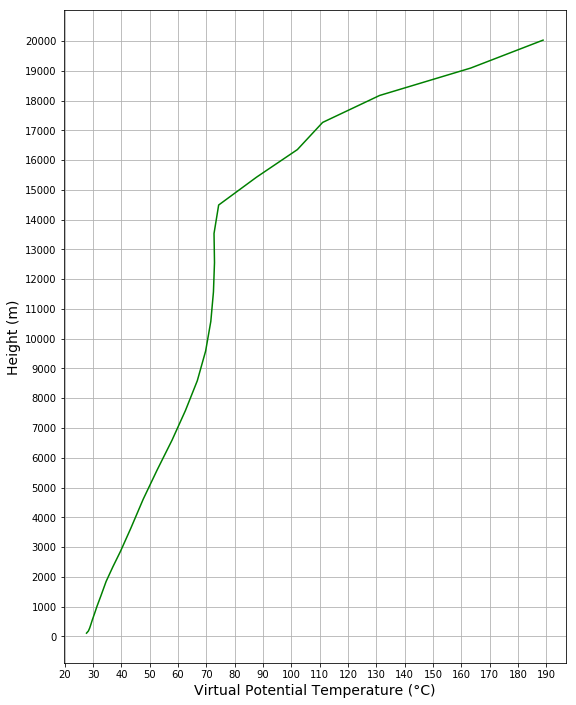

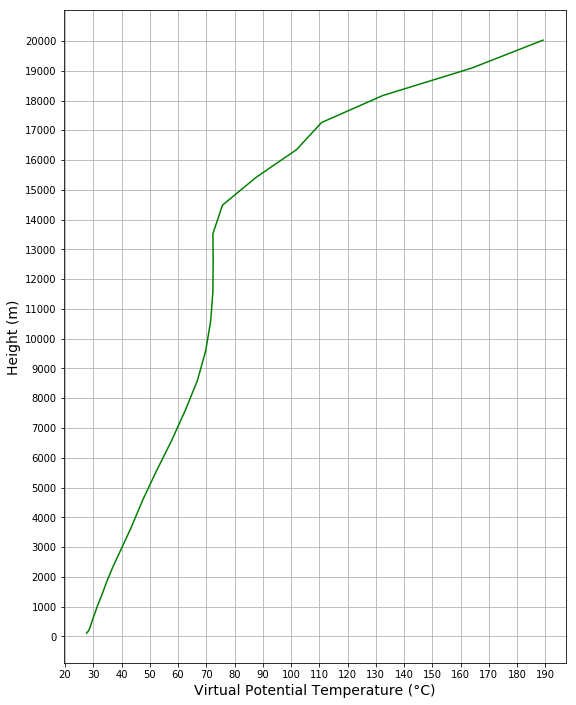

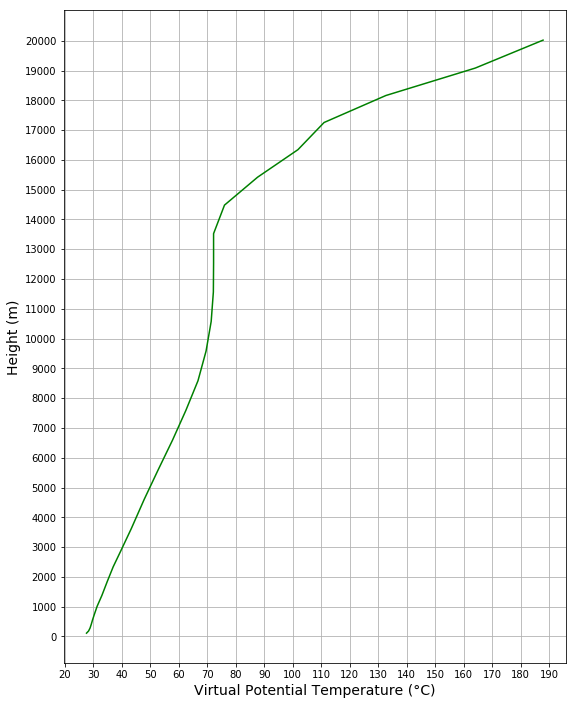

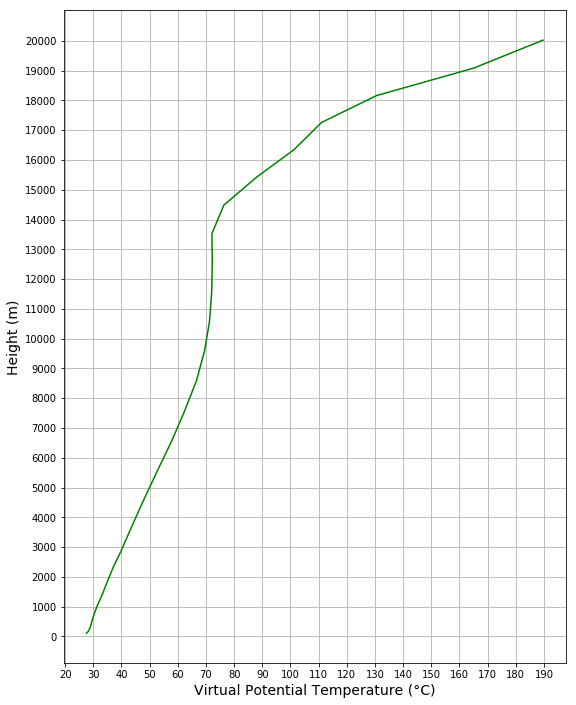

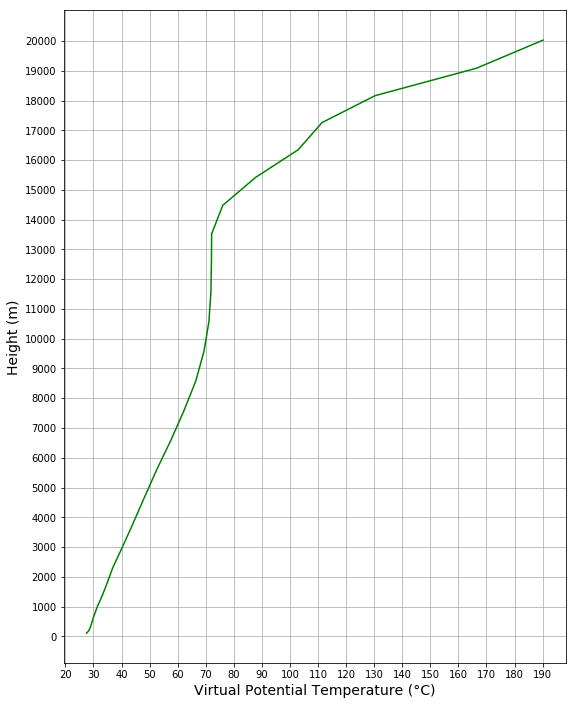

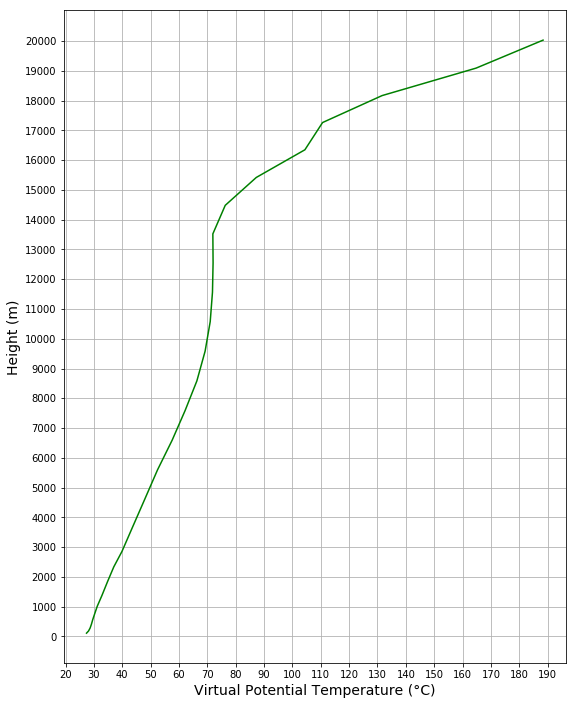

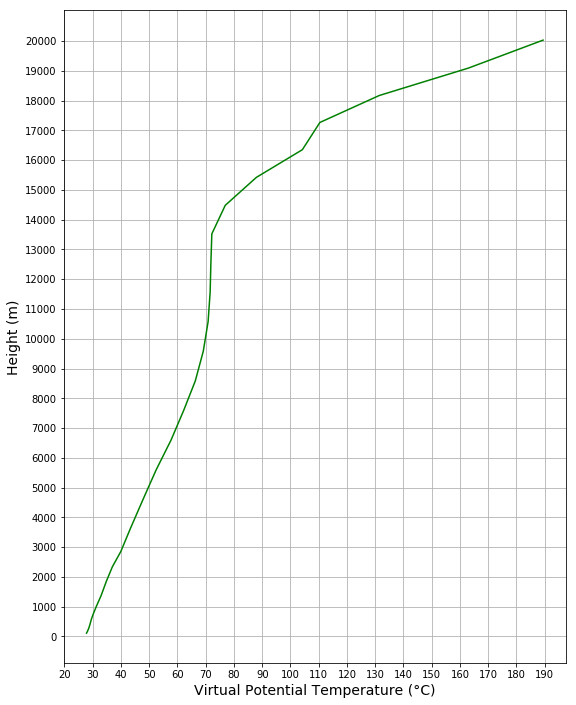

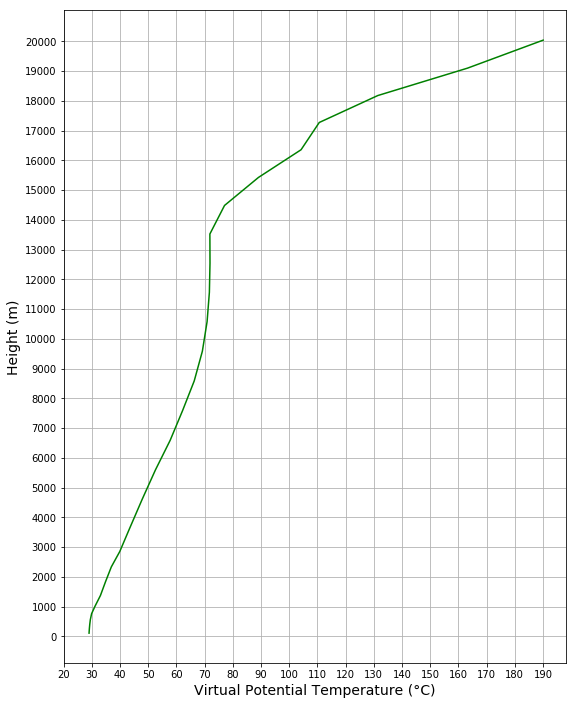

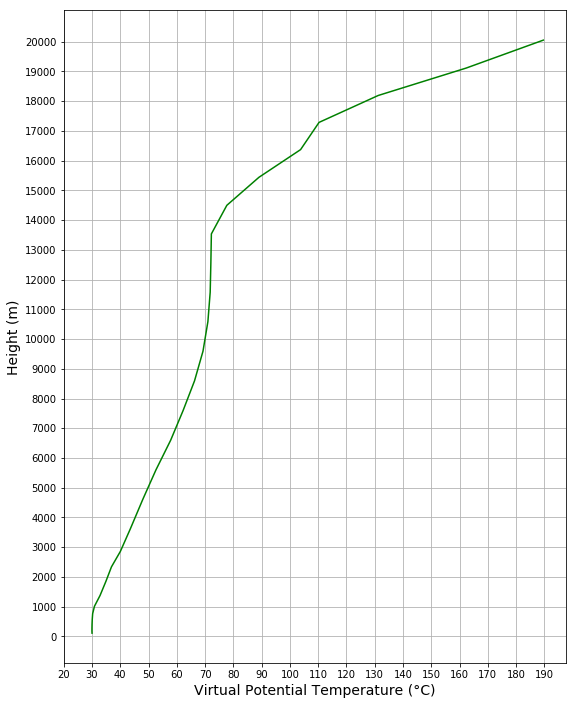

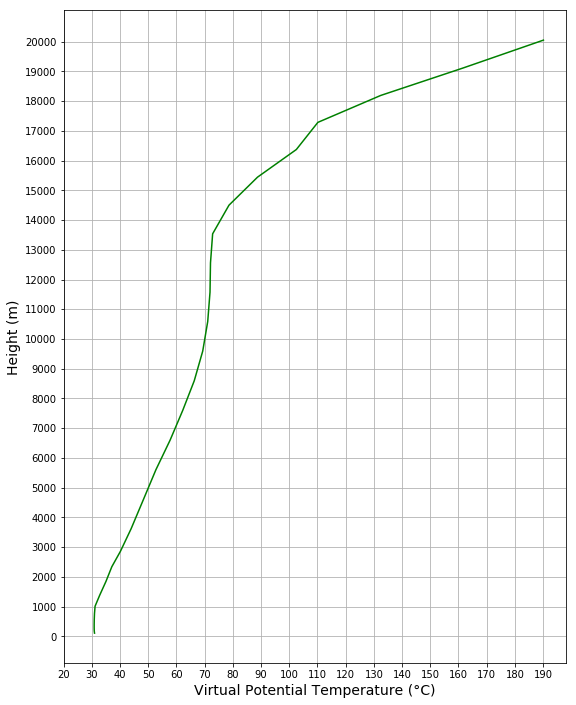

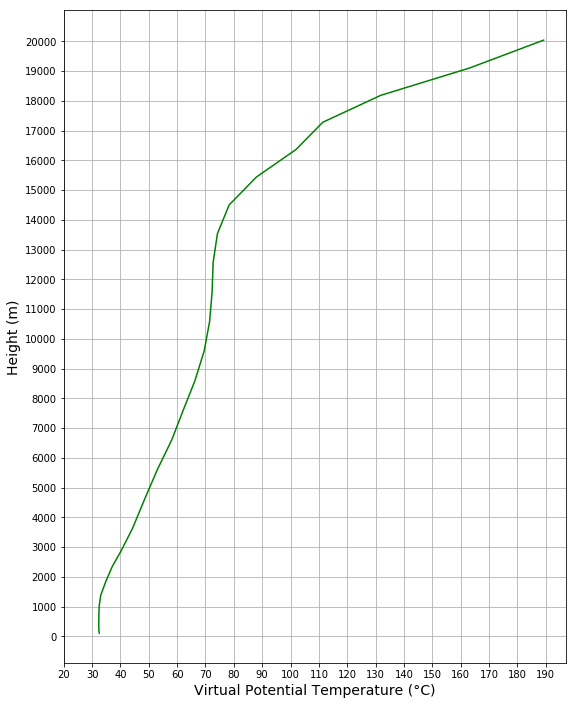

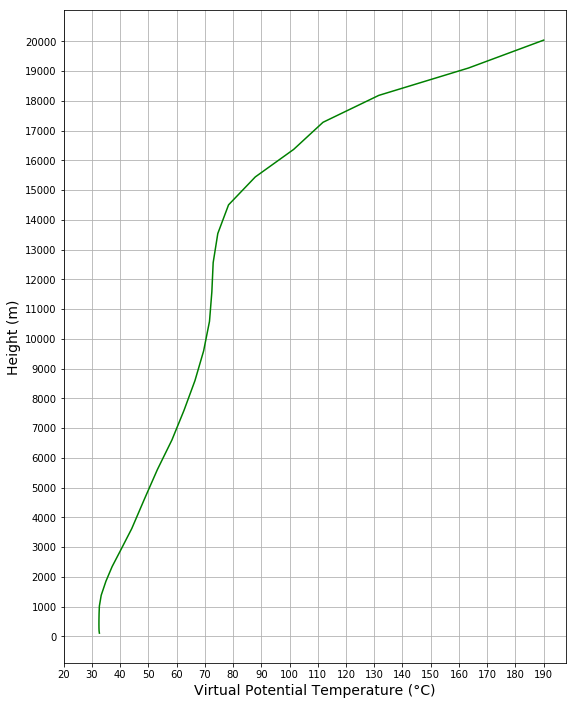

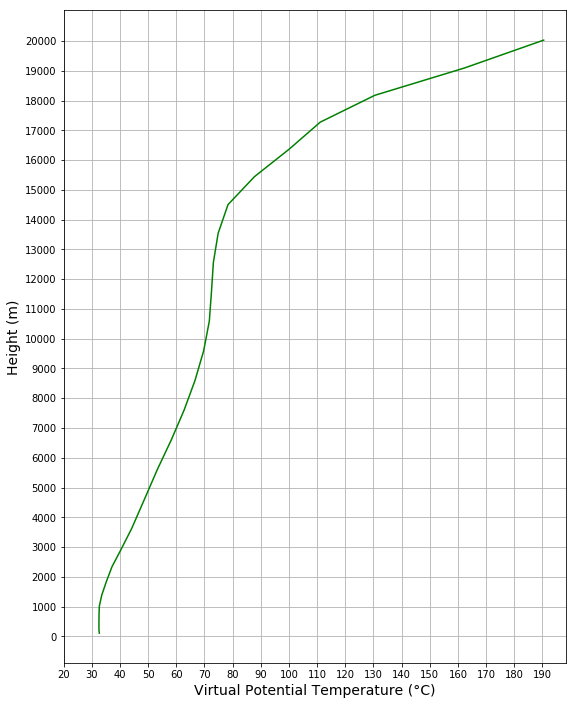

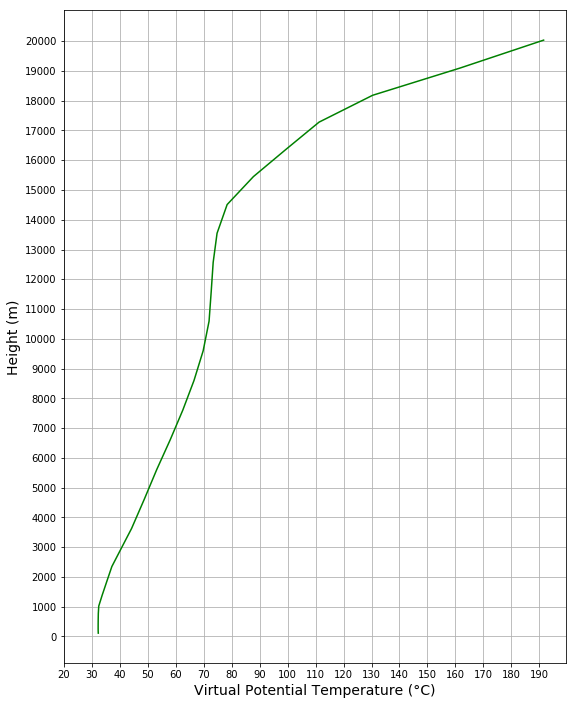

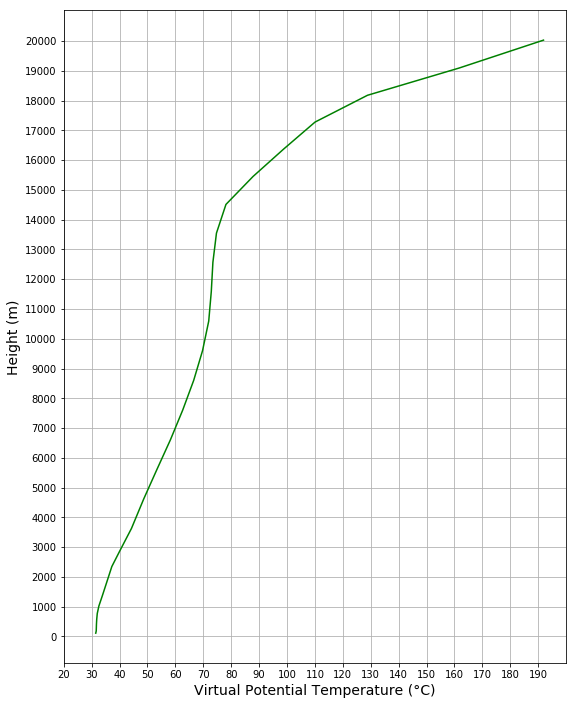

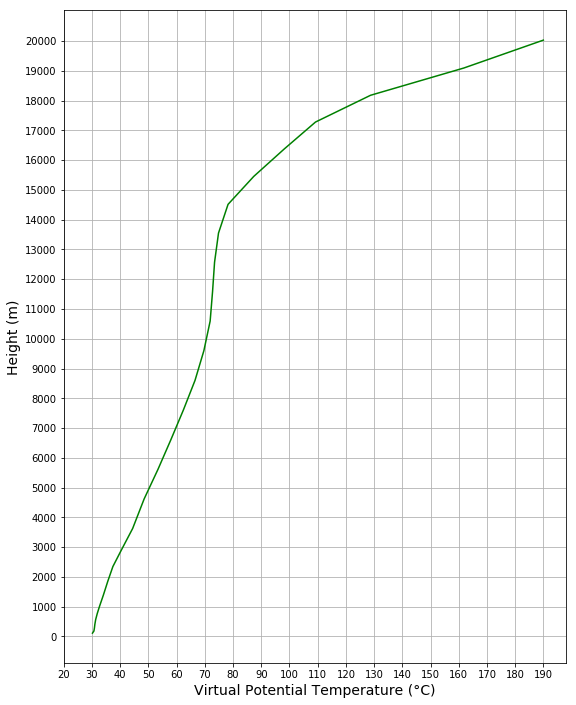

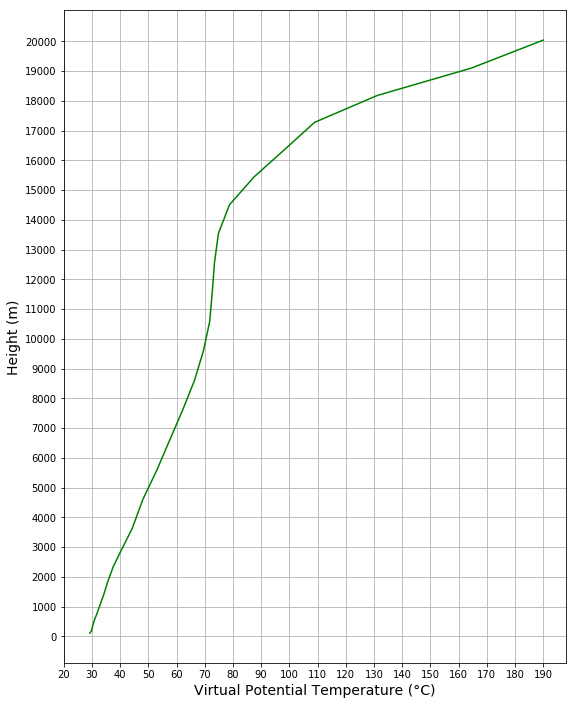

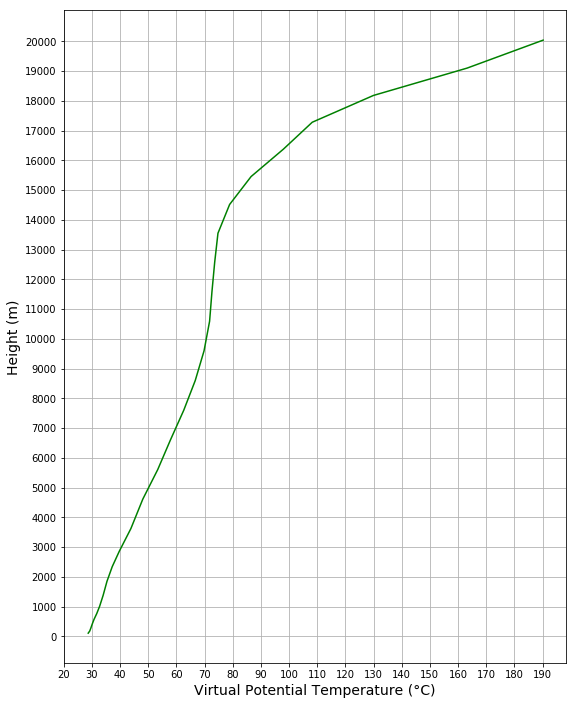

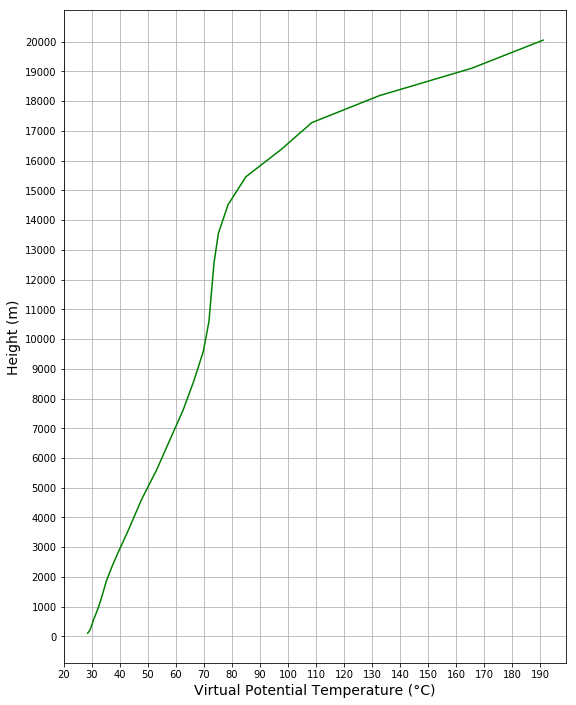

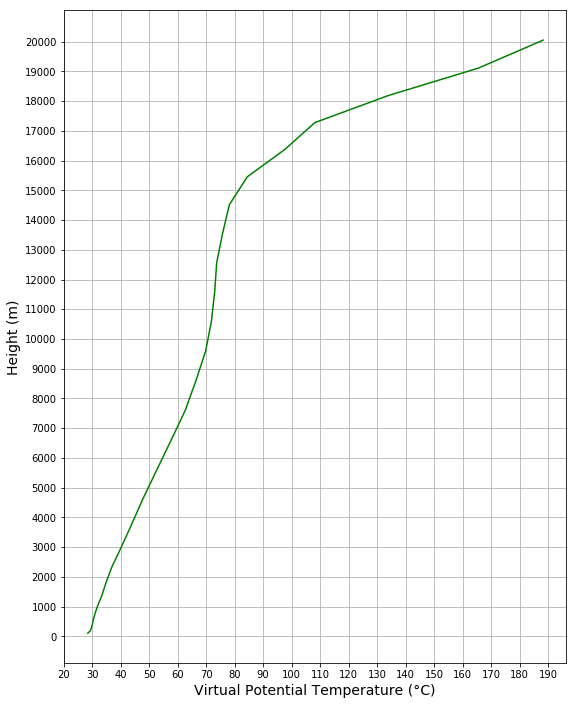

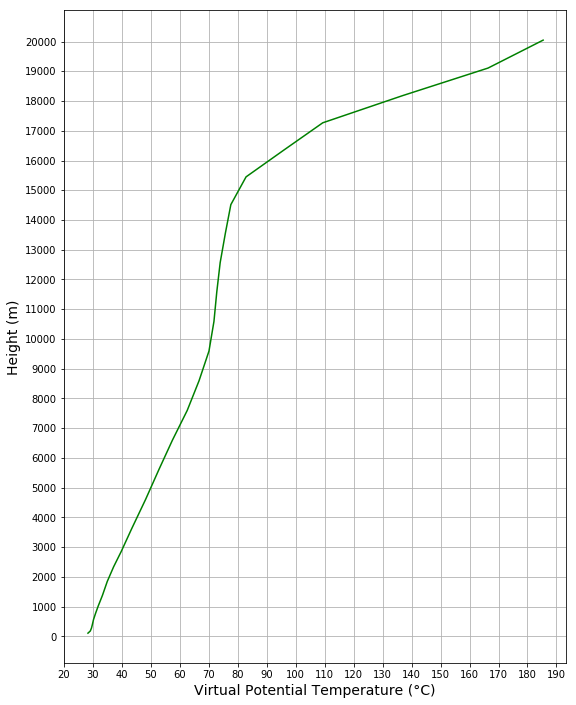

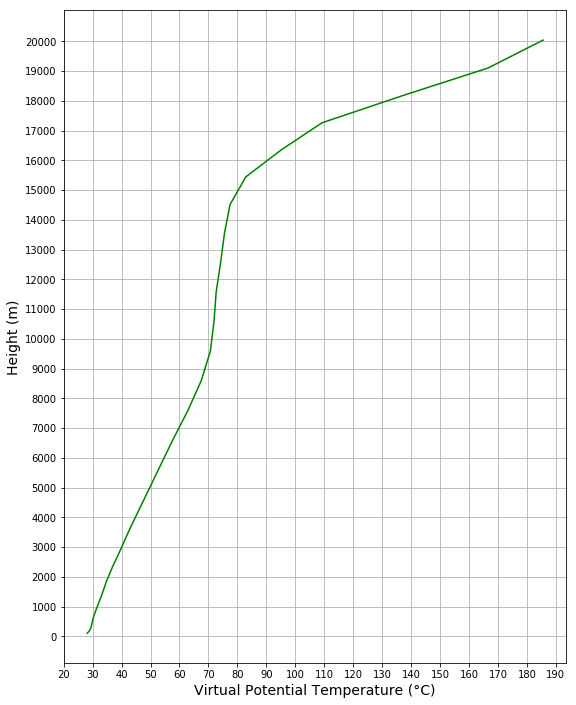

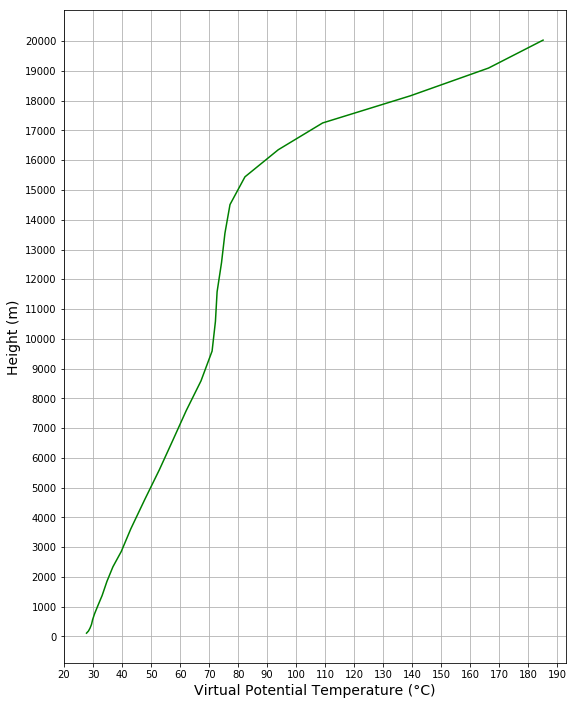

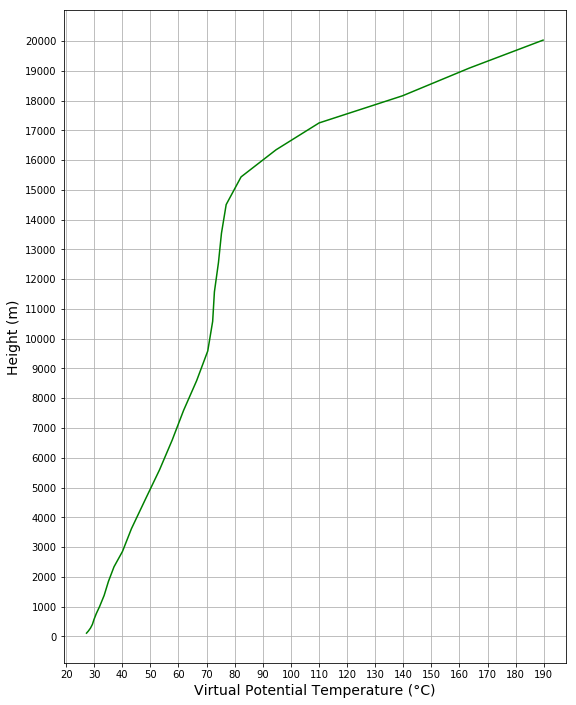

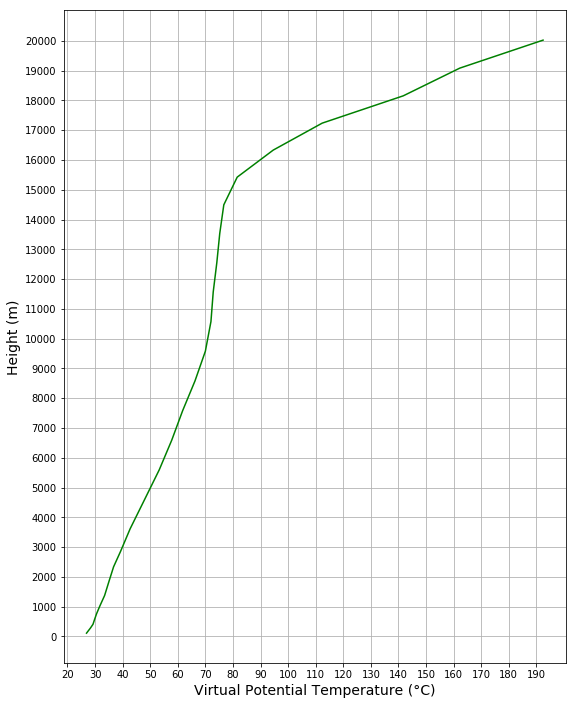

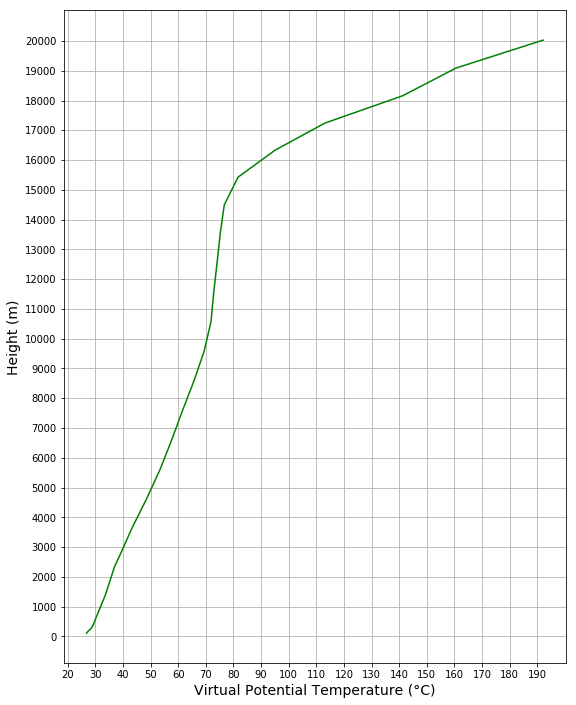

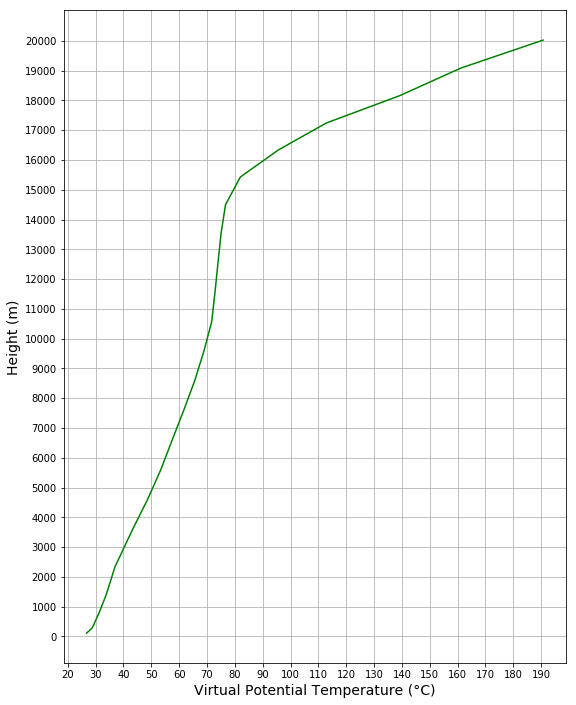

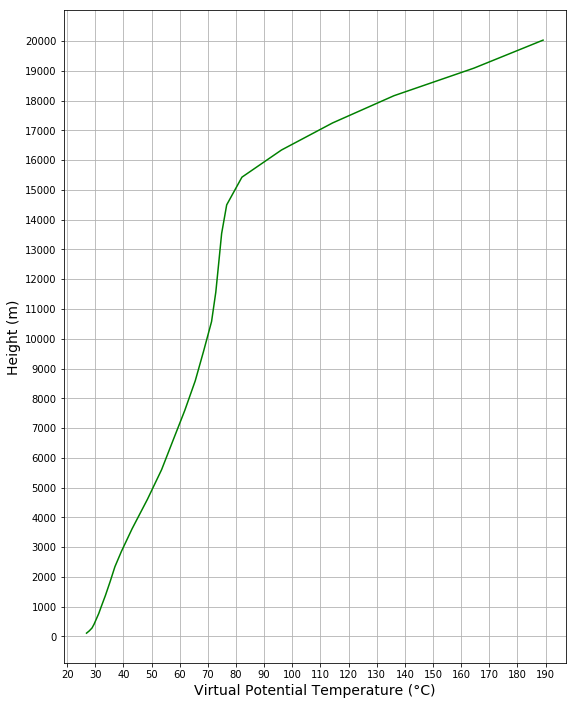

In [21]:
#file 1_65 DEO
for time in range(0,73):
    xx = int(time)
    RH1_65 = getvar(file1_65,"temp",units='kelvin',timeidx=xx)
    P1_65 = getvar(file1_65,"p",timeidx=xx)
    Z1_65 = getvar(file1_65,"z",units='m',timeidx=xx)
    D1_11 = getvar(file1_65,"QVAPOR",timeidx=xx)
    
    Dl1_11 = D1_11[:,13,21]
    Pd1_65 = P1_65[:,13,21]
    RHd1_65 = RH1_65[:,13,21]
    Zd1_65 = Z1_65[:,13,21]
    
    #thvl2 = mpcalc.static_stability(Pd1_65, RHd1_65, axis=0)
    thvl = mpcalc.virtual_potential_temperature(Pd1_65, RHd1_65, np.array(Dl1_11), molecular_weight_ratio=0.622)
    thvl2 = np.array(thvl)-273.15
    
    fig = plt.figure(figsize=(9,12))
#add_metpy_logo(fig, 115, 100)
    ax = plt.axes()

    ax.plot(thvl2, Zd1_65, 'g')
    #skew.plot(Pl1_11, thv1_11, 'g')
#skew.plot_barbs(p, u, v)
    ax.set_xticks(np.arange(20, 200, 10))
    ax.set_yticks(np.arange(0,21000, 1000))
    ax.set_ylabel('Height (m)', fontsize=14)
    ax.set_xlabel('Virtual Potential Temperature (°C)',fontsize=14)

    #skew.ax.legend(["Temperature", "Dew Point Temperature"],loc=0)
    plt.grid(True)
    plt.show()
    
    fig.savefig('plot/temperatur static/sepang/d01_T99_sepang_ke_'+str(xx) +'.png', bbox='tight',dpi=100)

# DOMAIN 1-KL Forest Eco Park

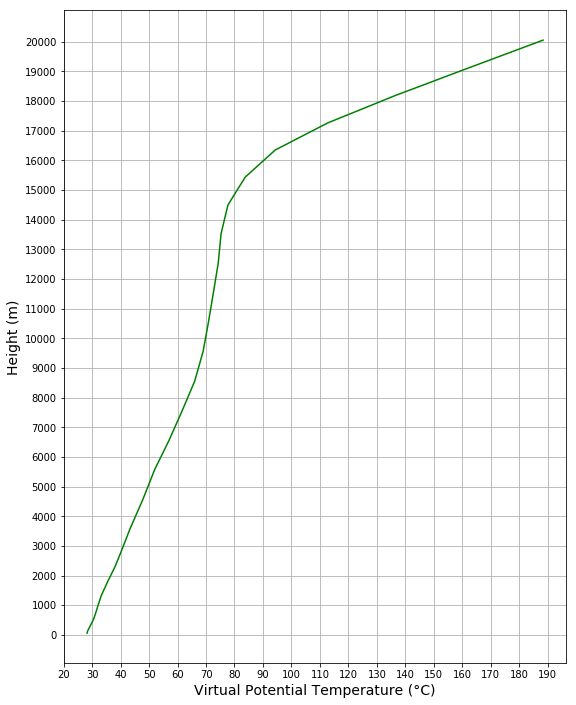

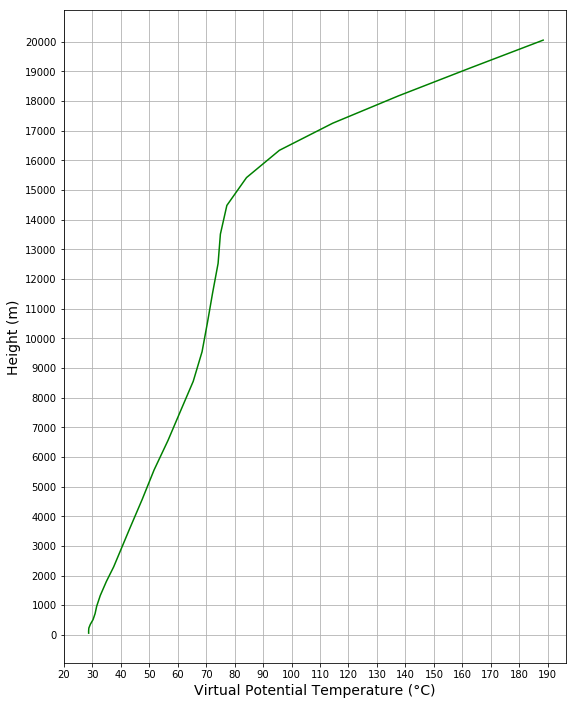

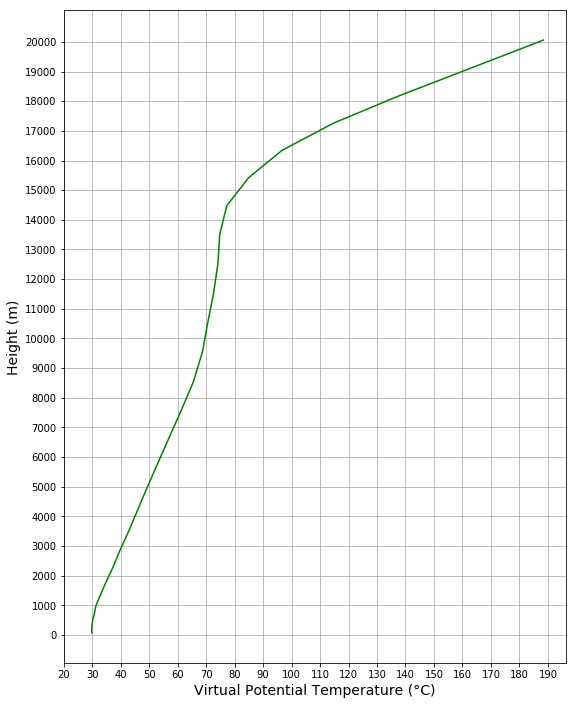

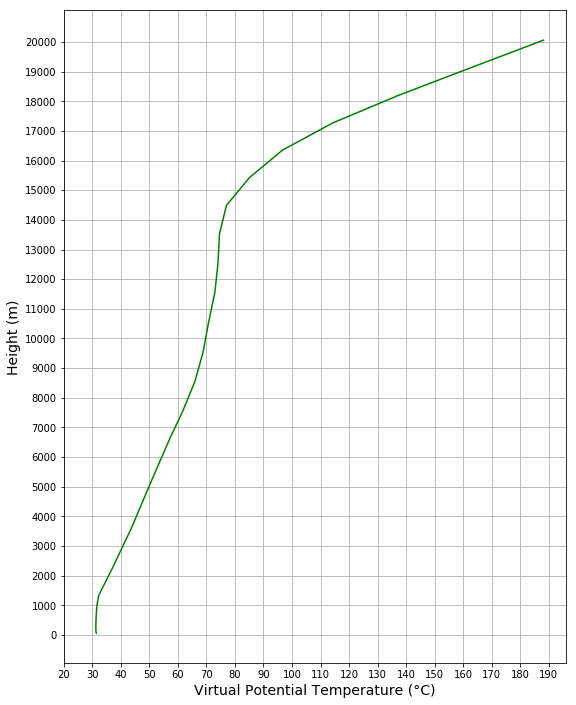

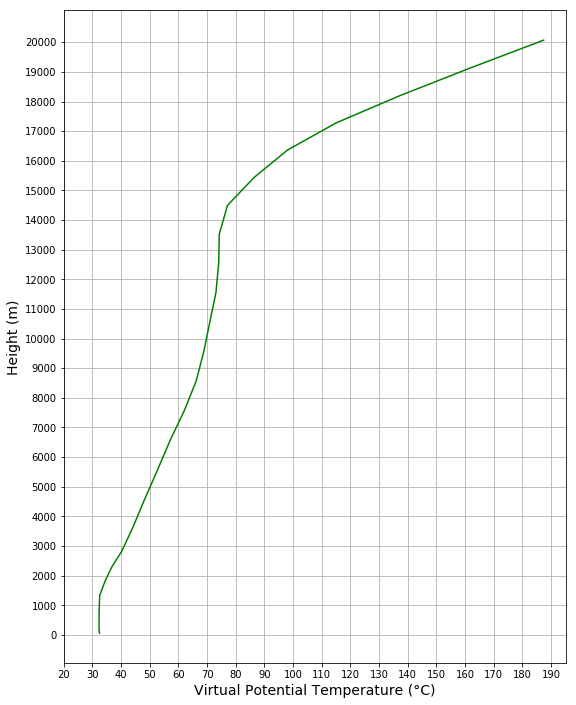

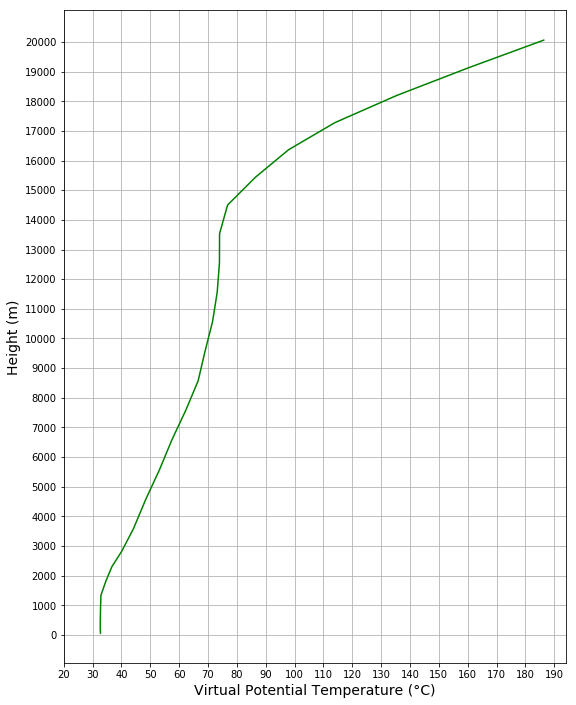

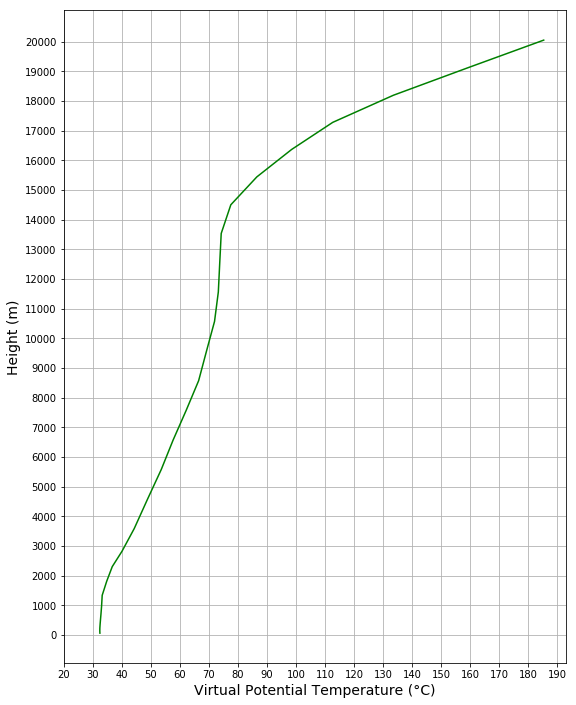

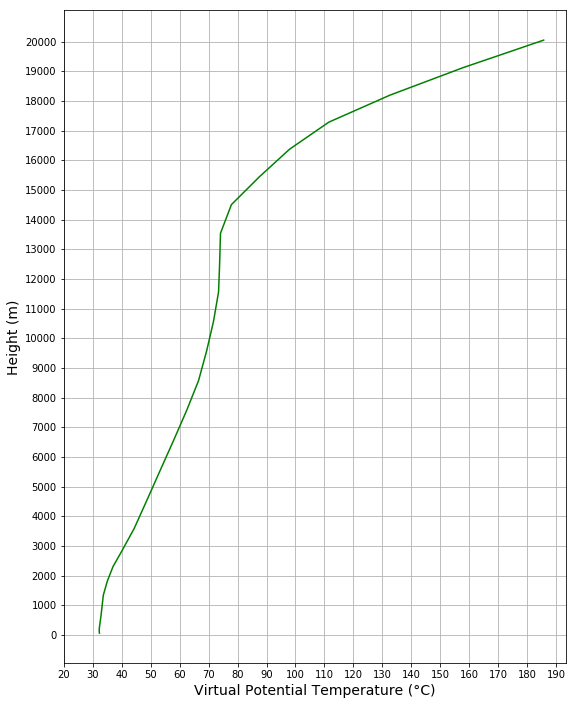

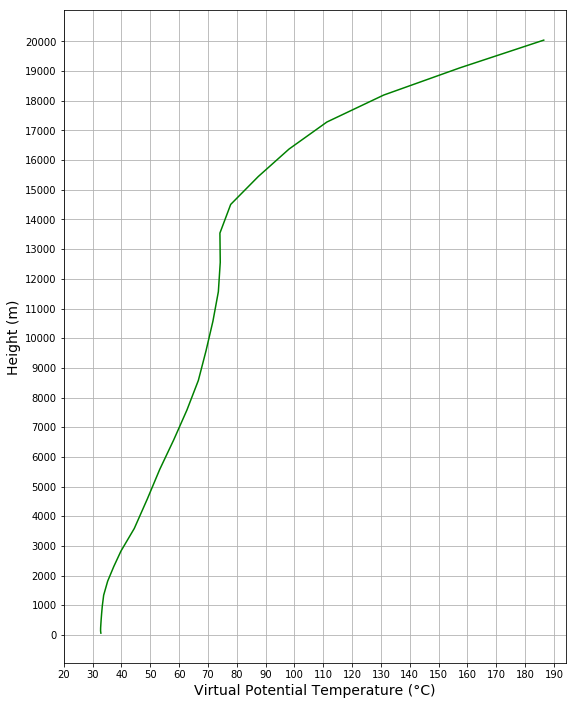

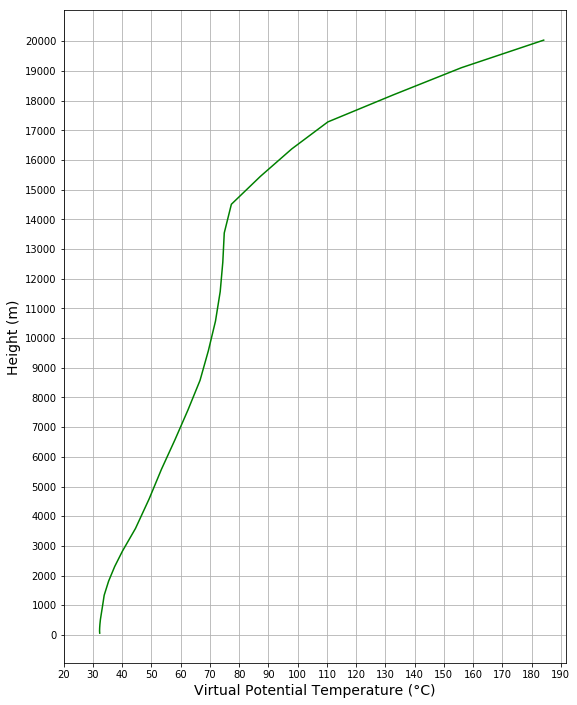

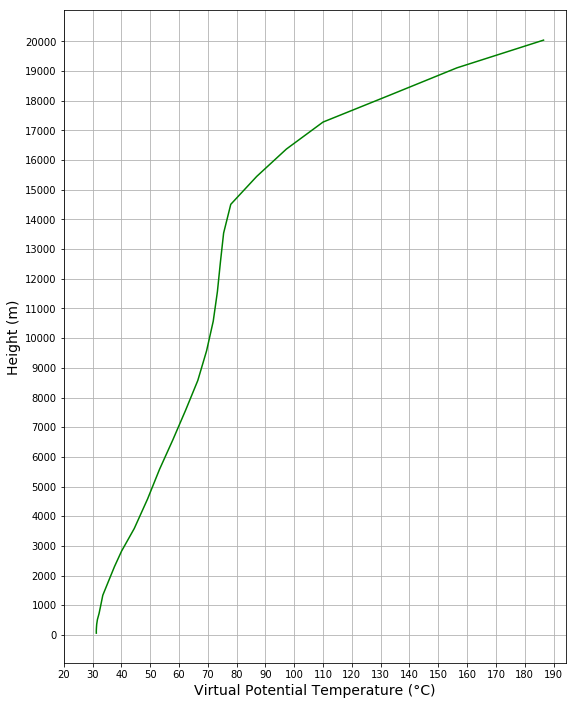

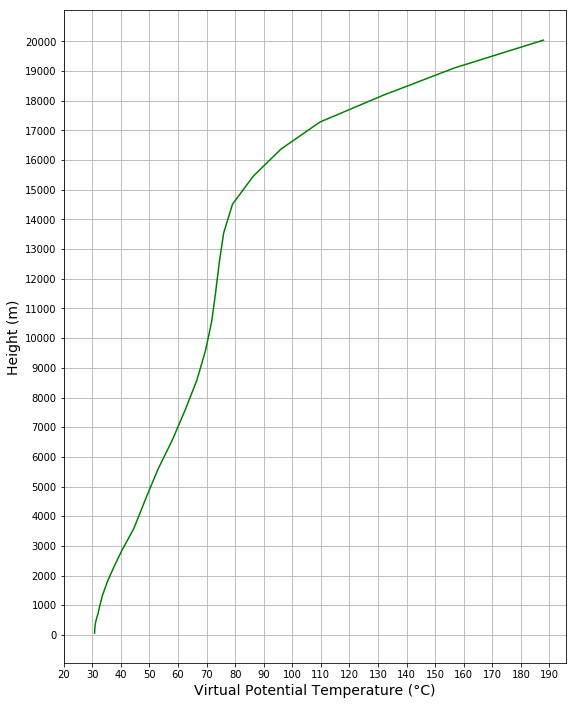

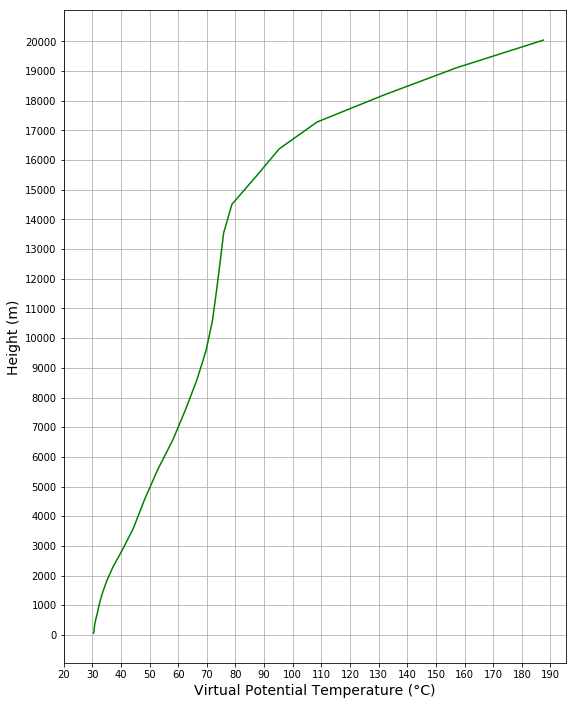

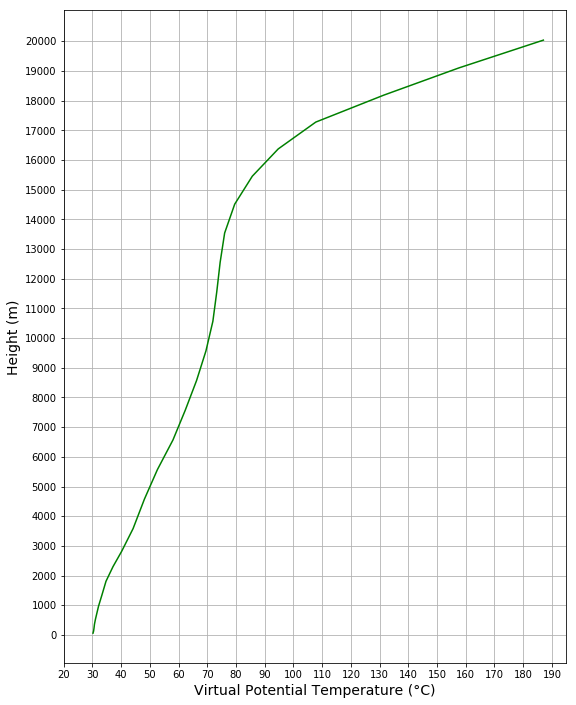

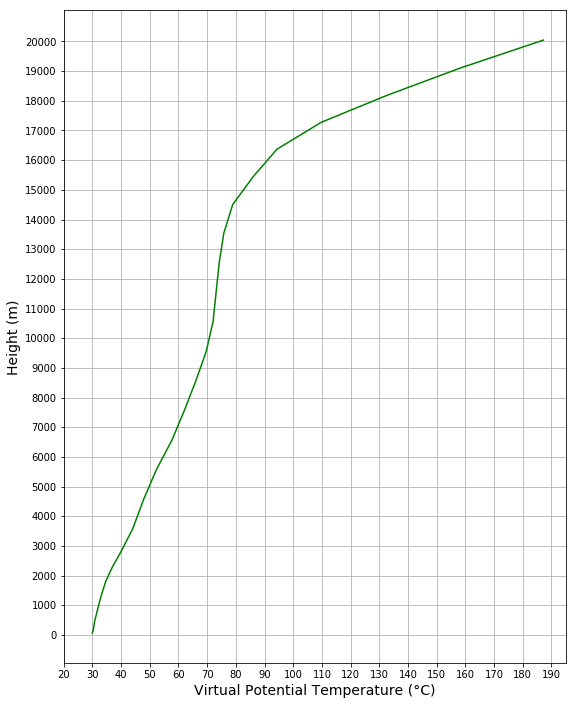

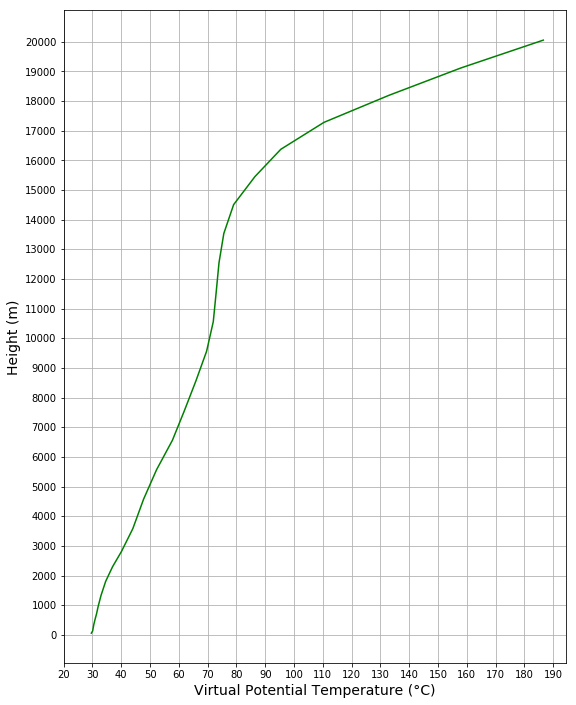

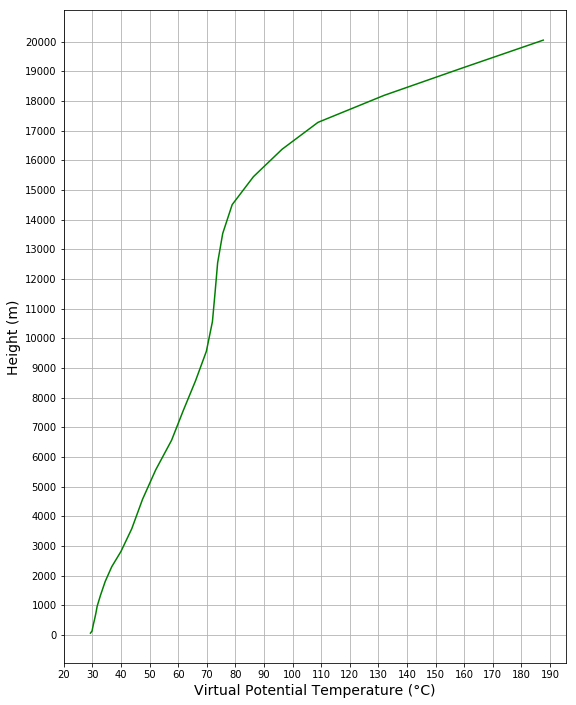

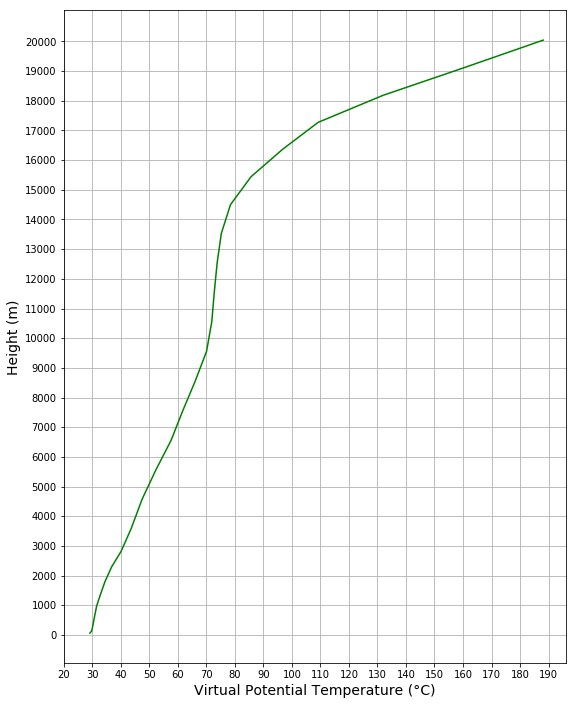

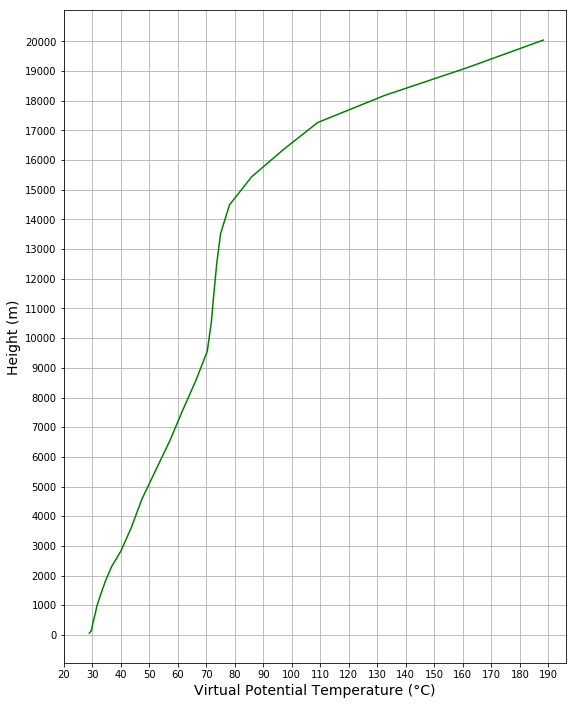

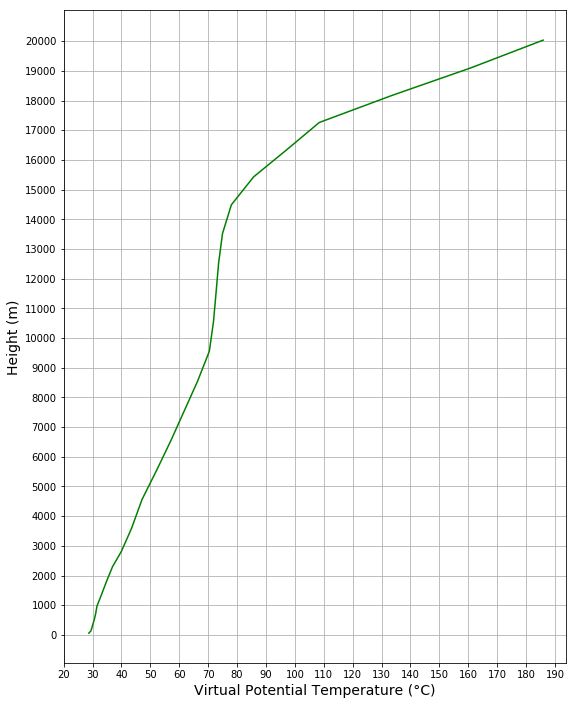

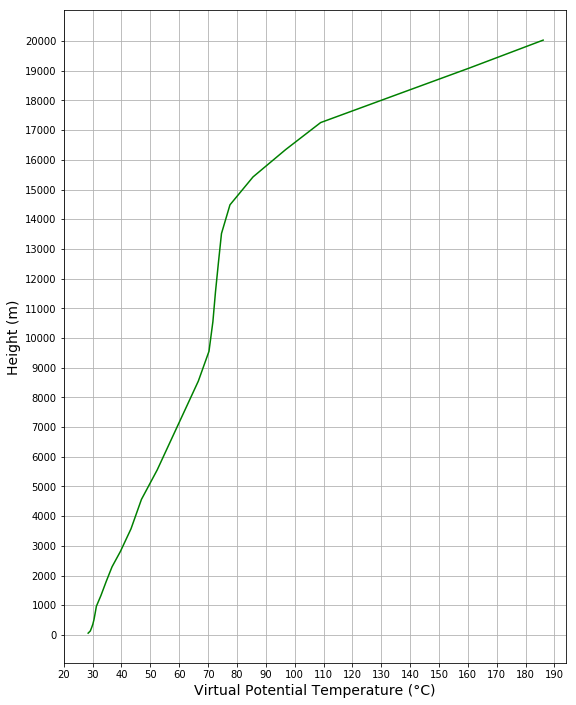

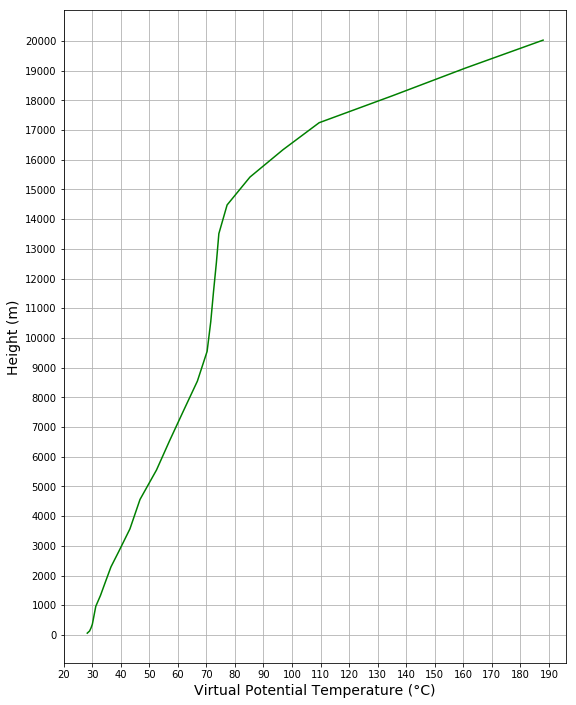

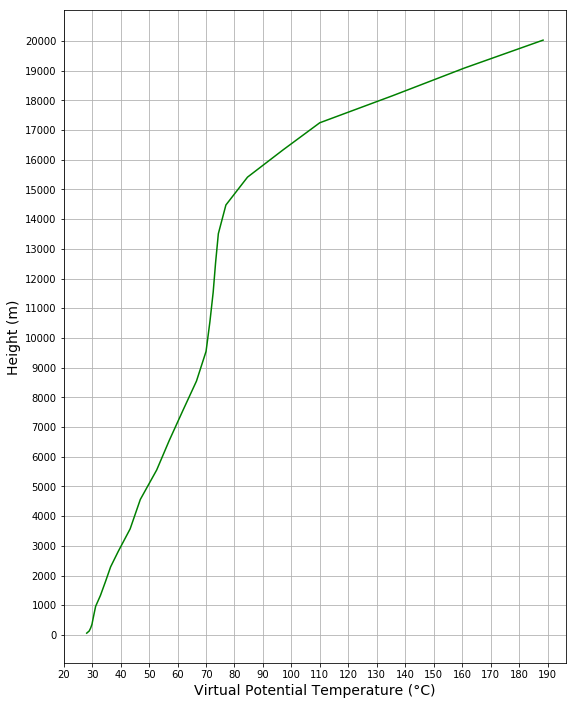

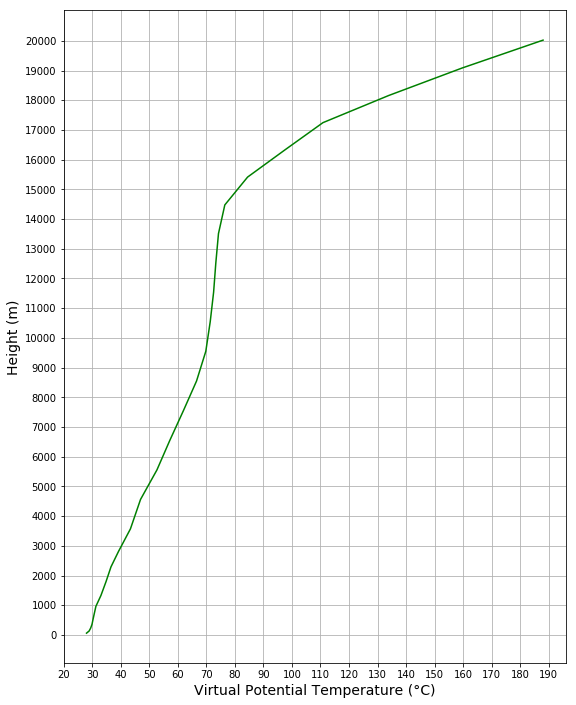

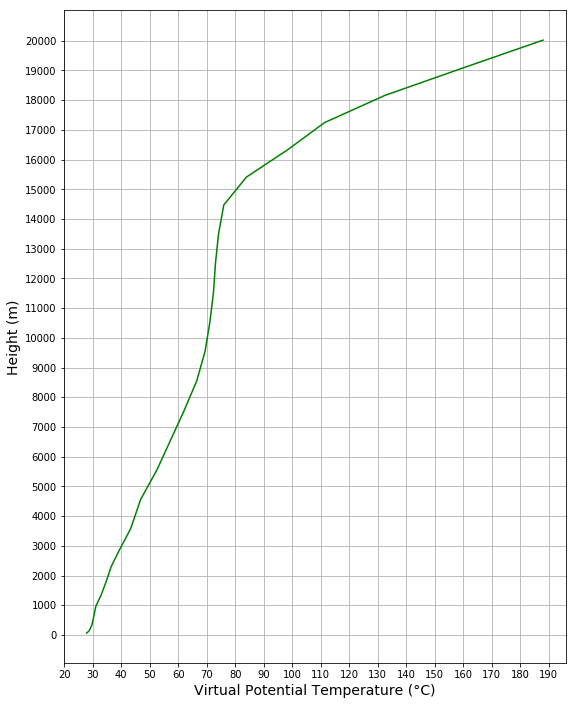

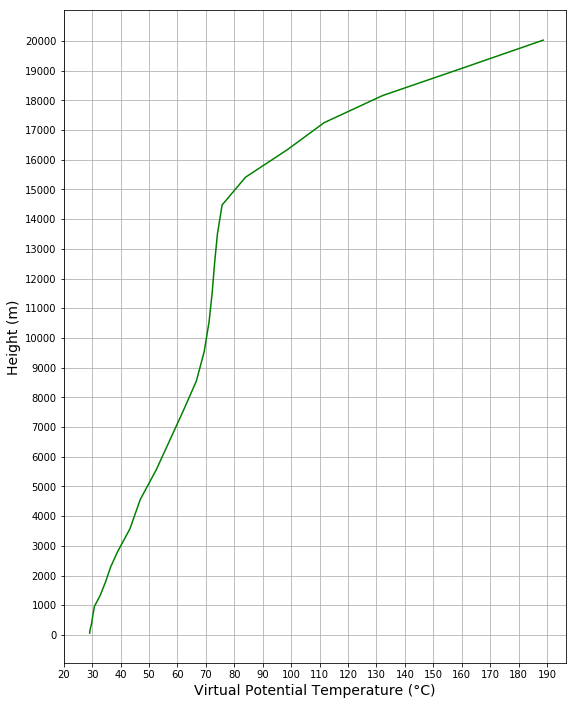

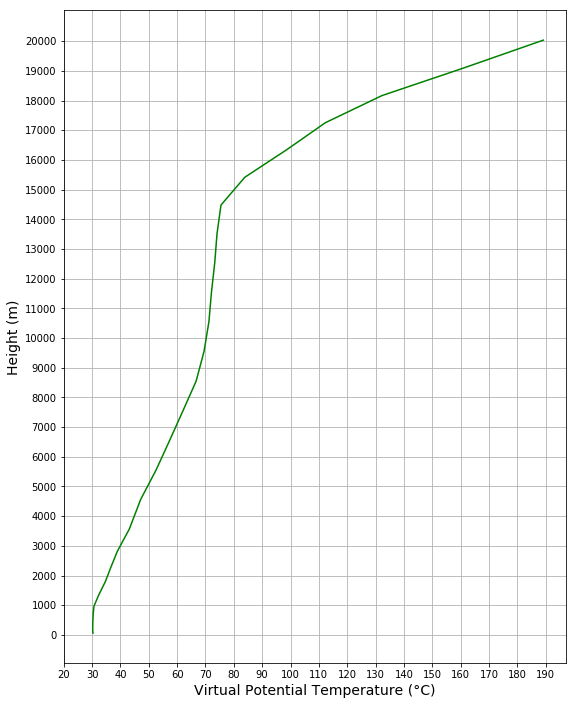

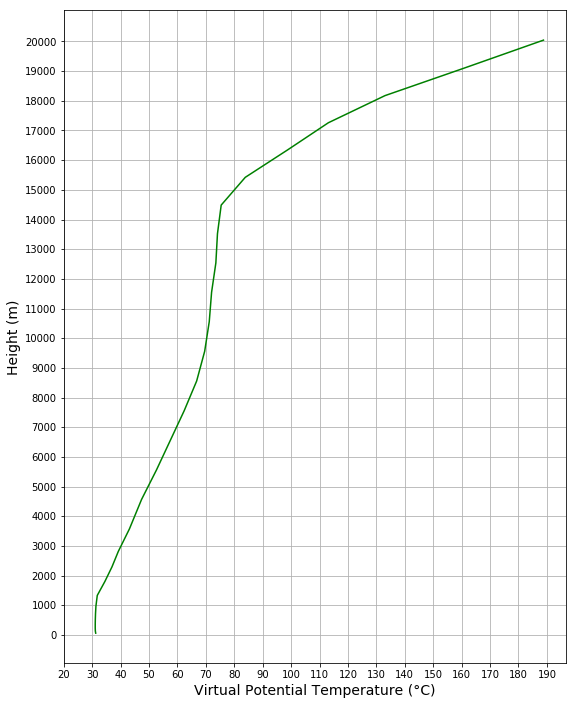

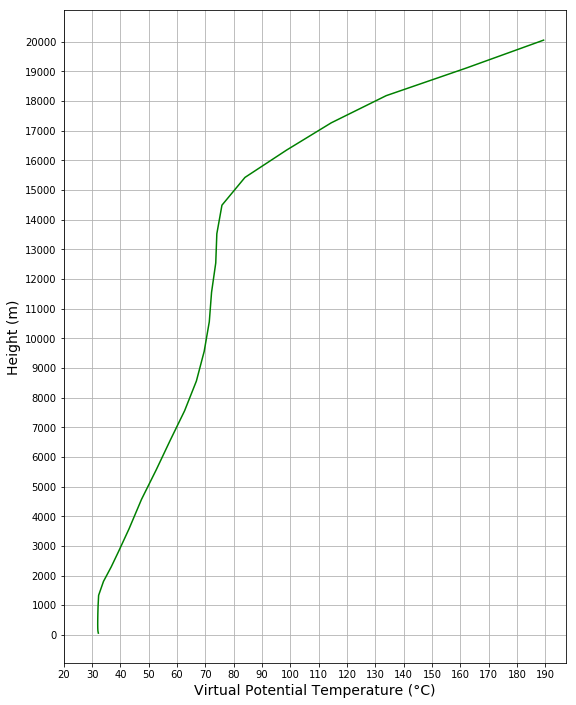

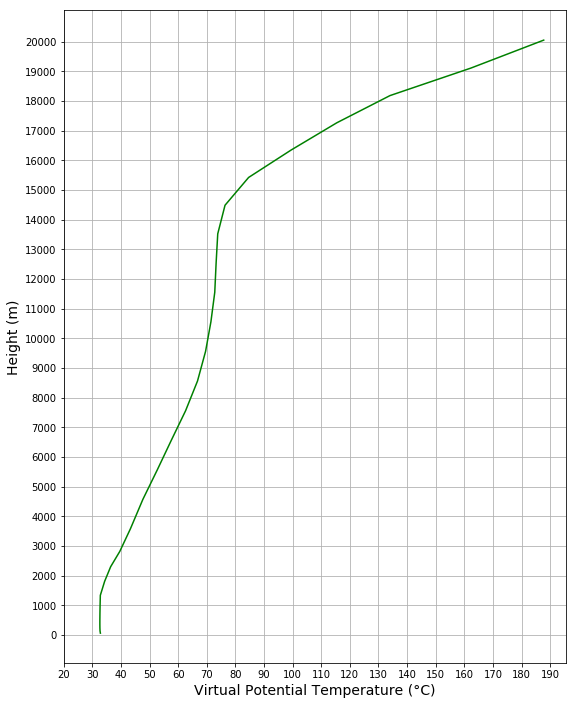

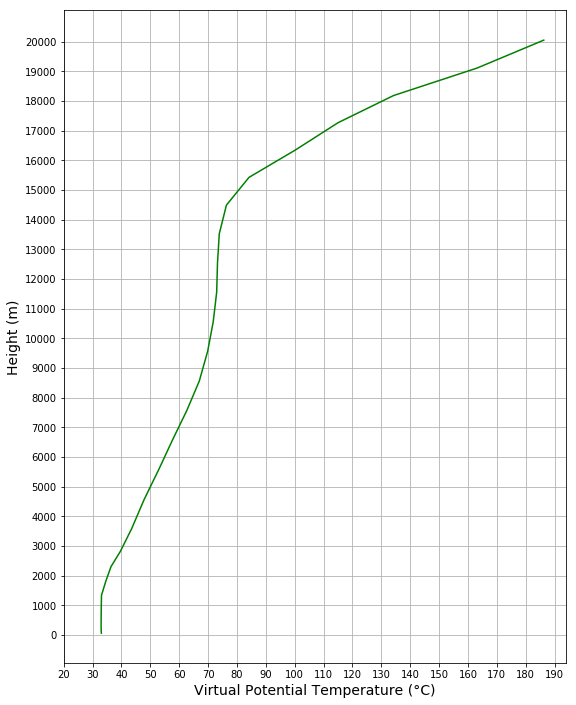

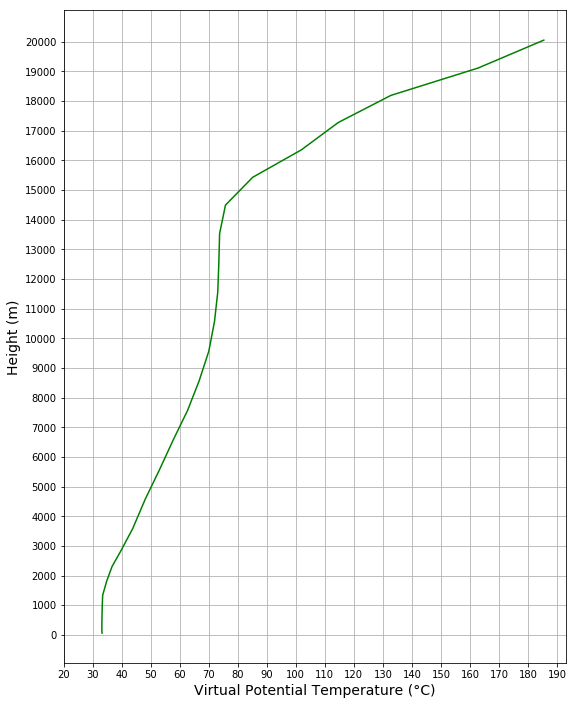

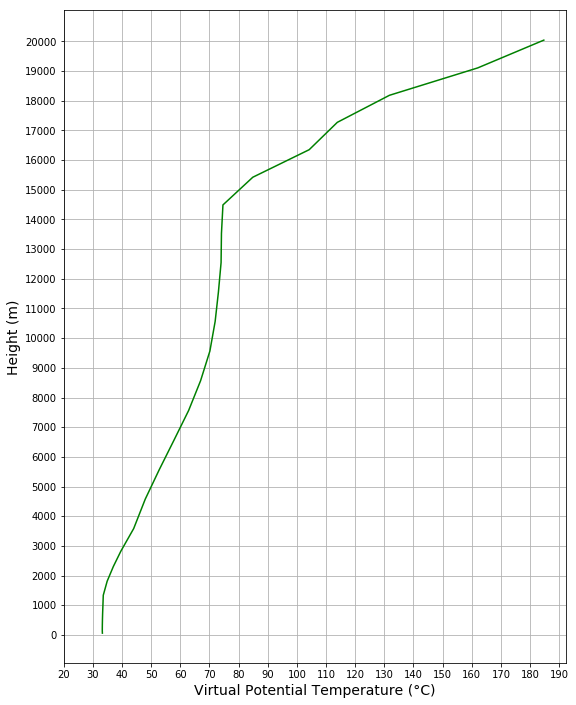

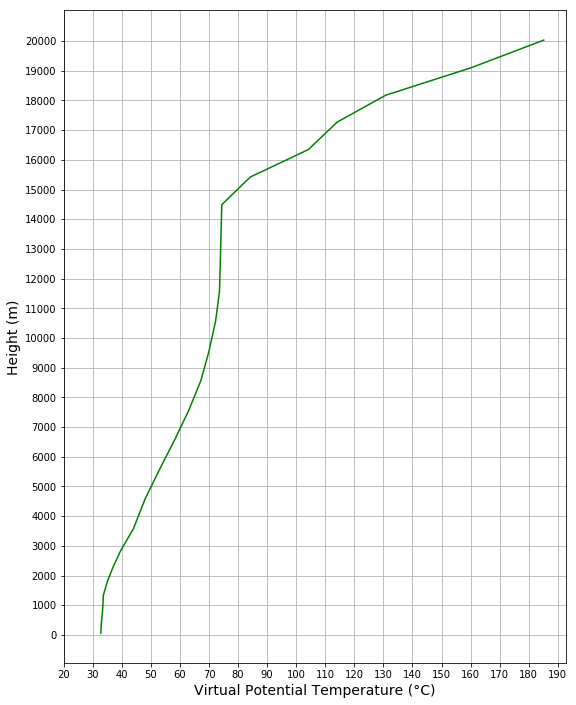

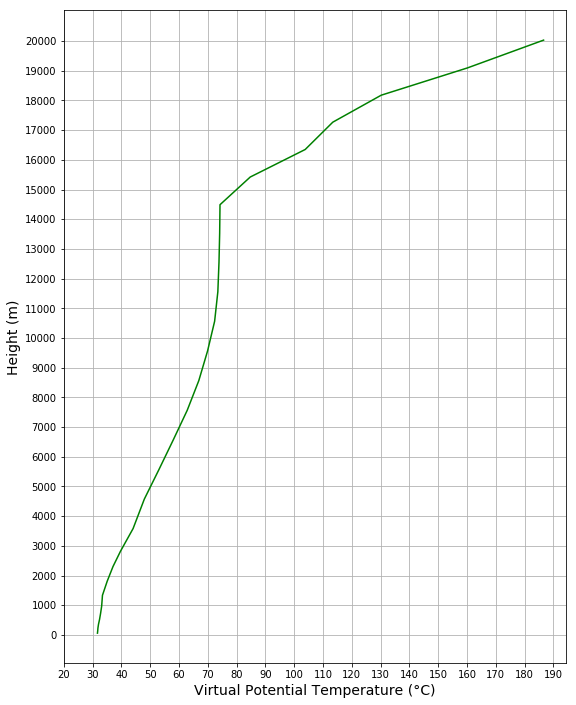

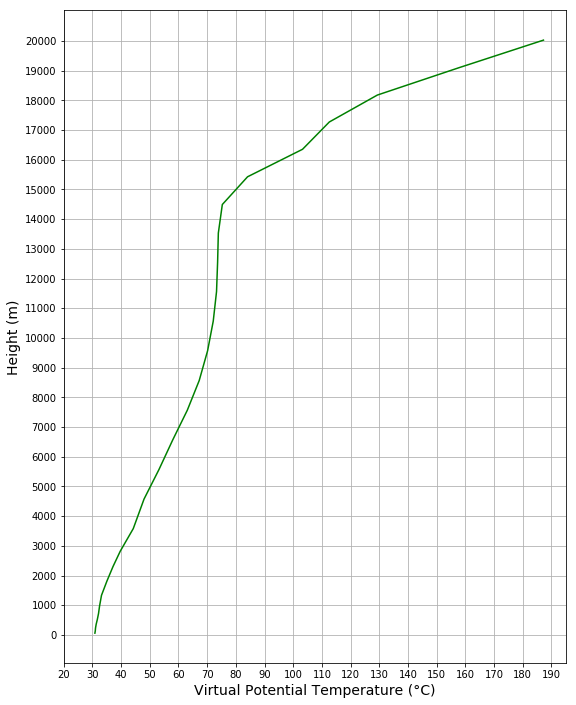

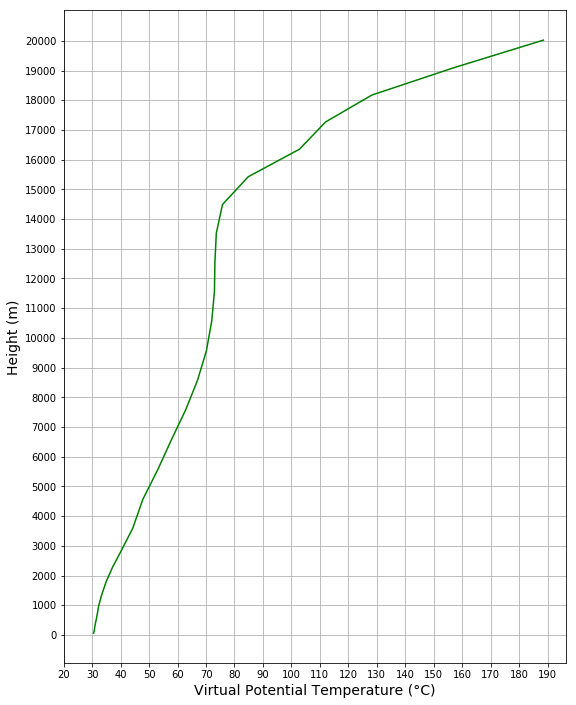

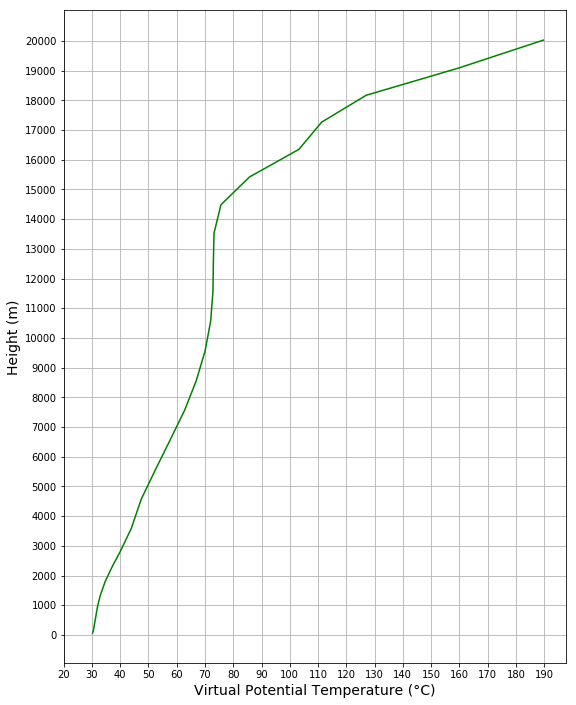

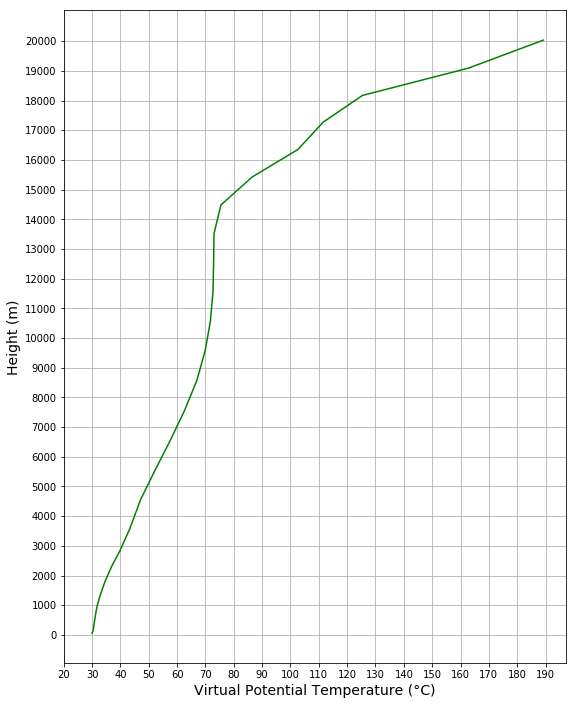

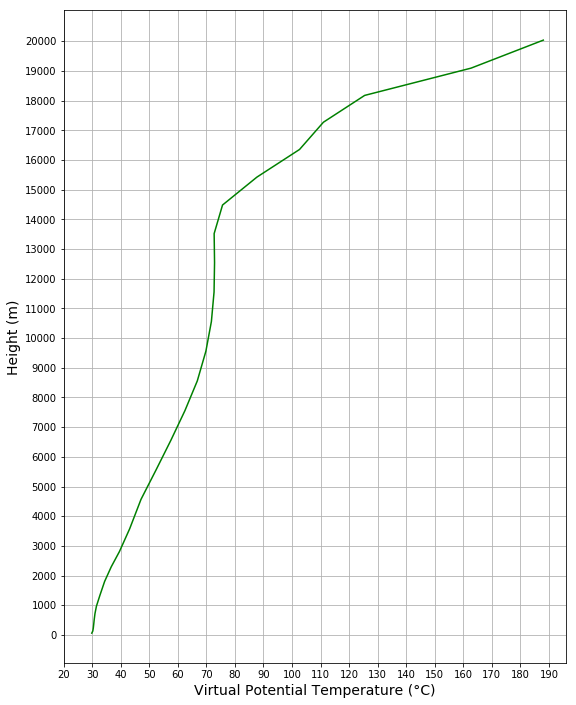

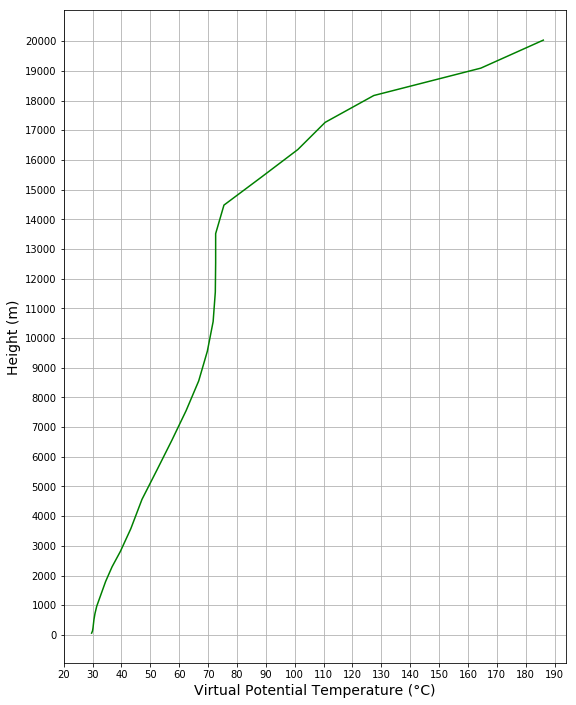

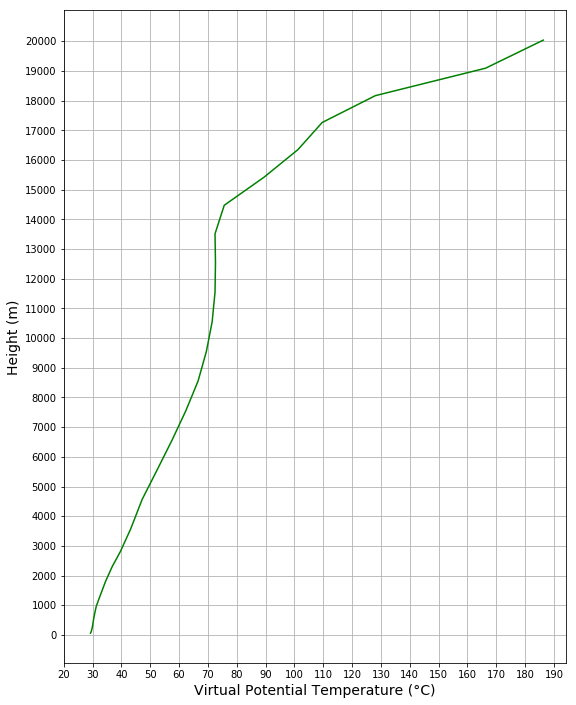

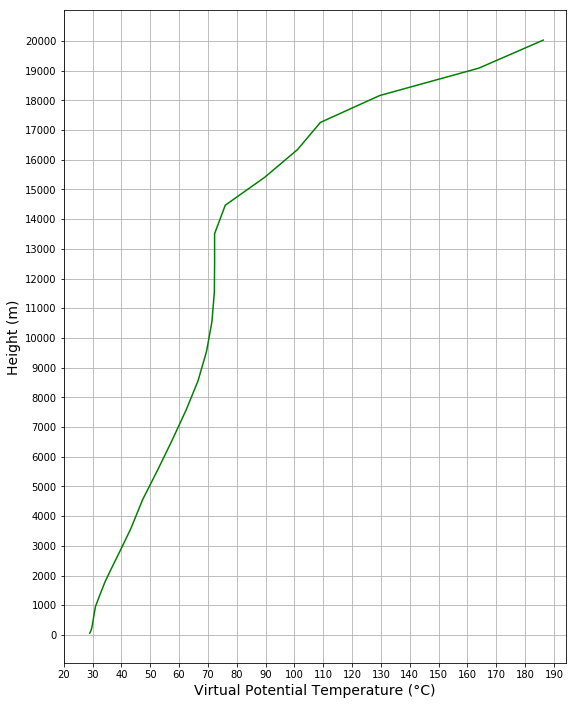

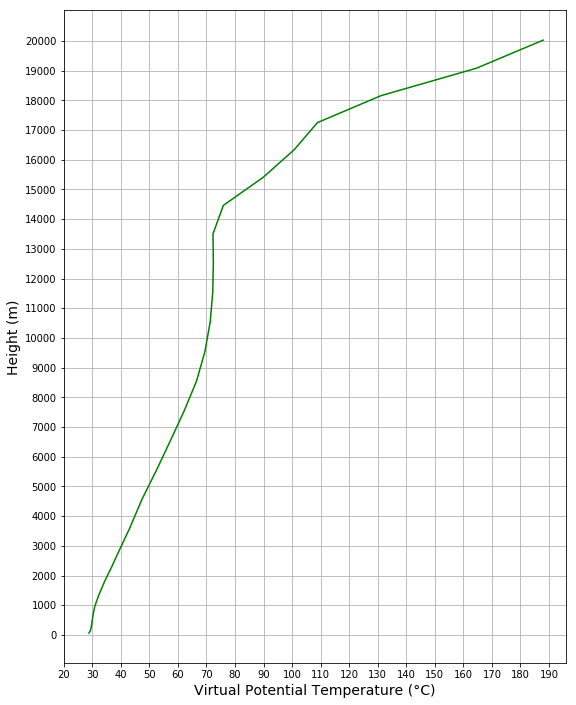

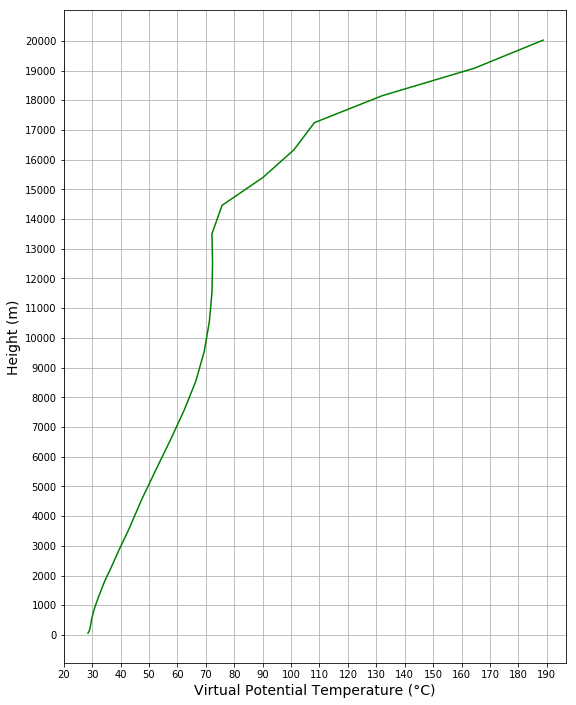

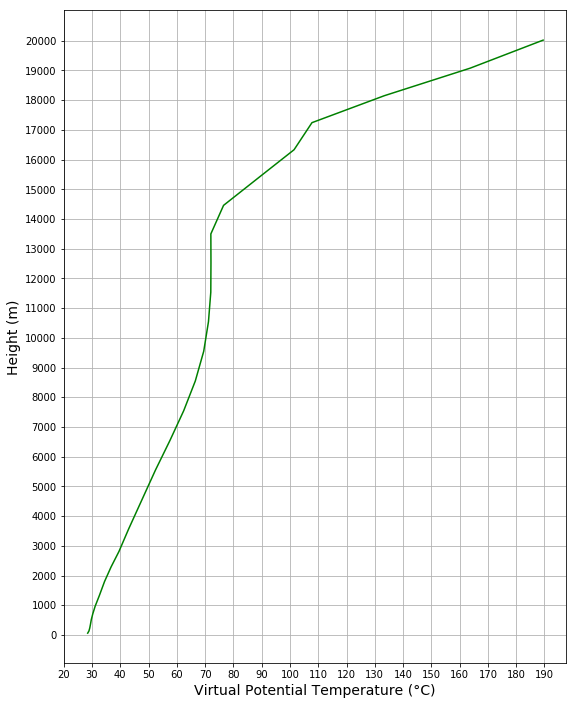

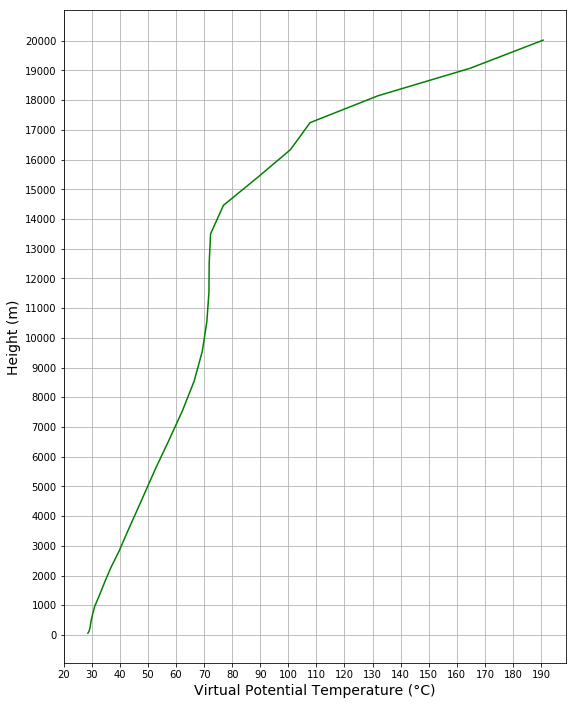

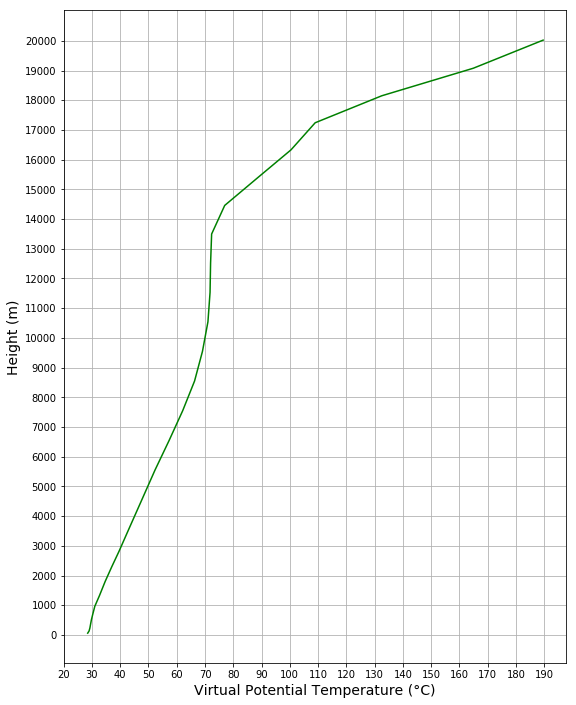

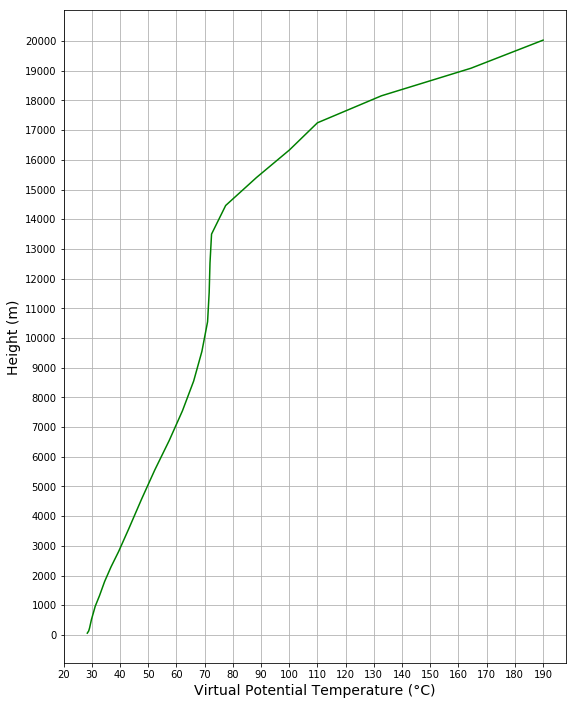

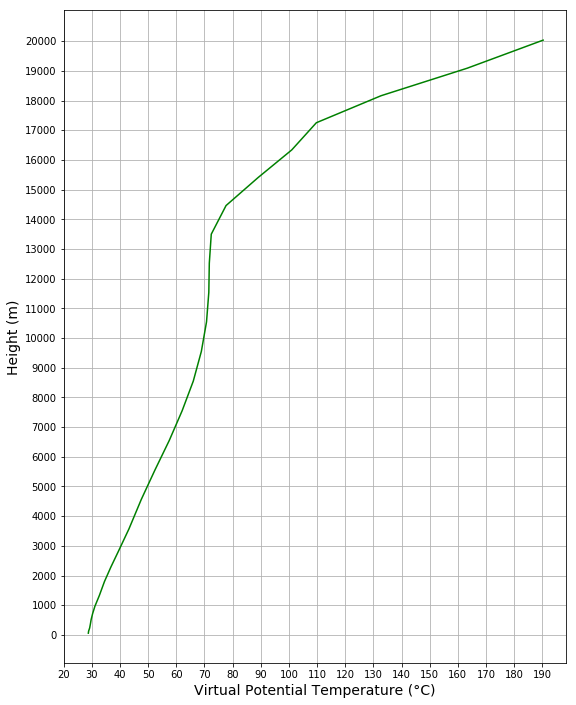

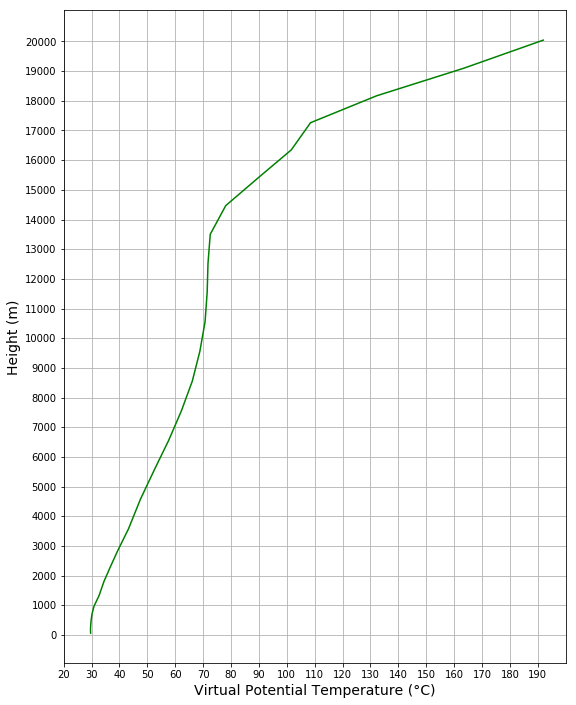

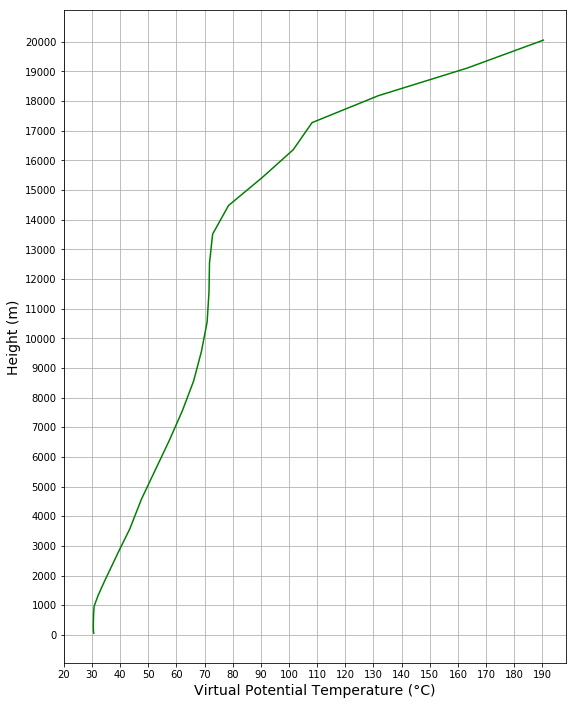

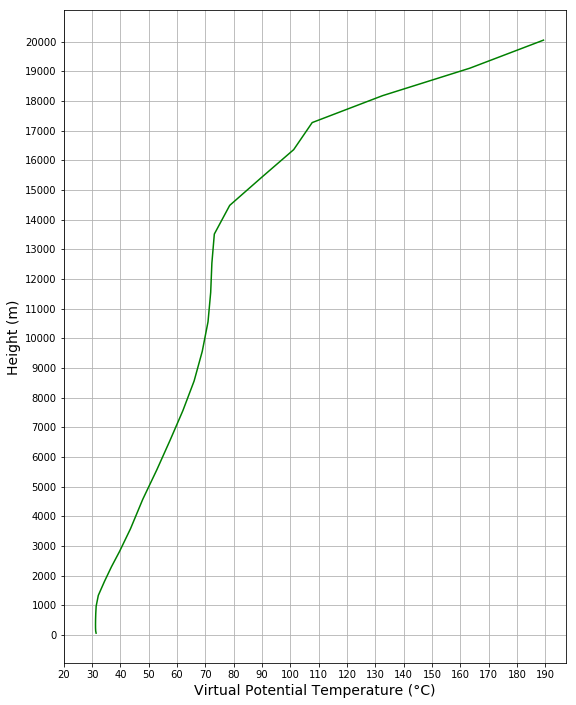

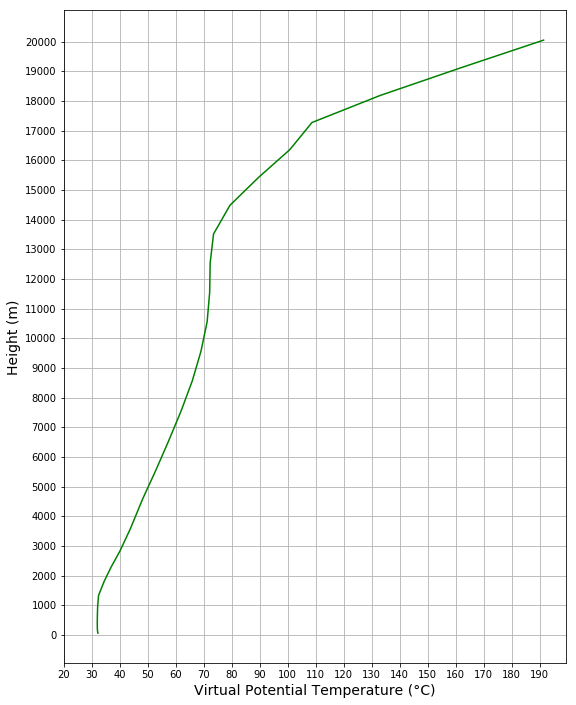

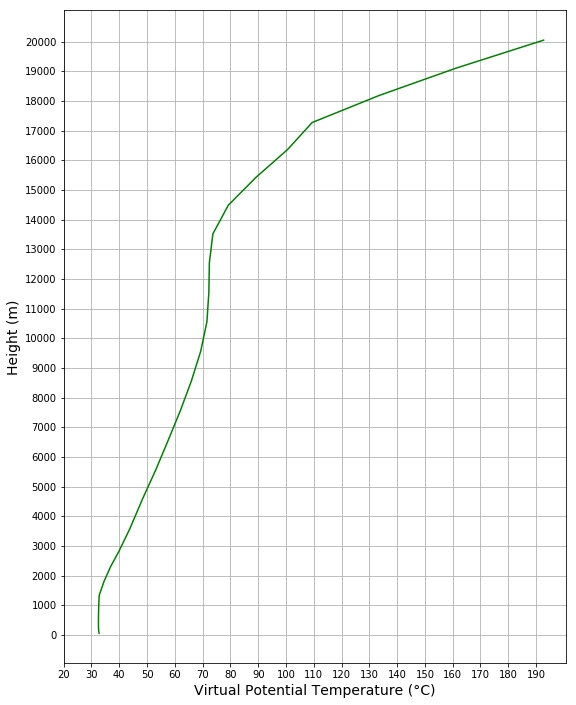

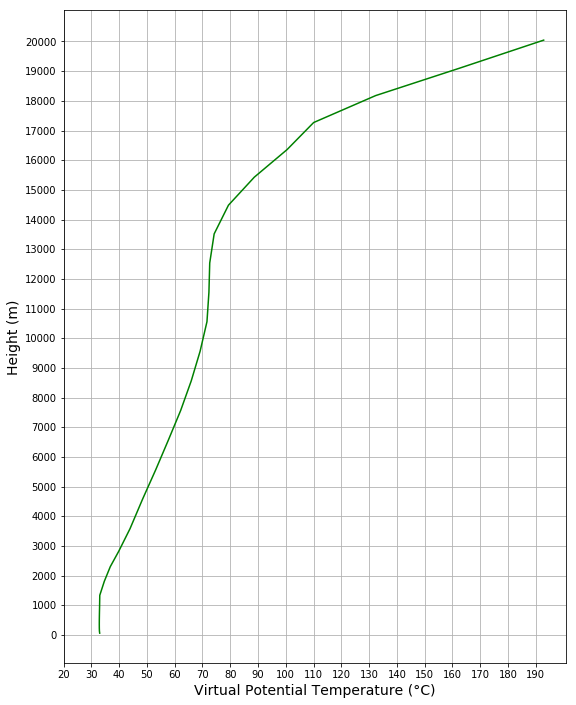

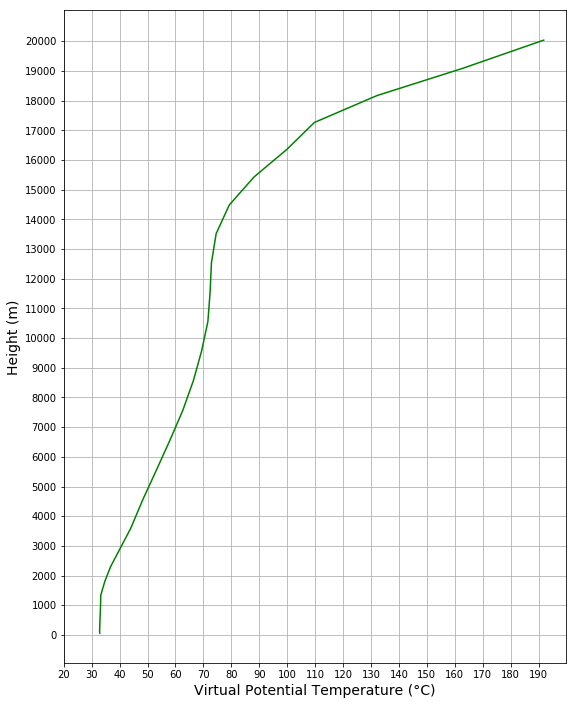

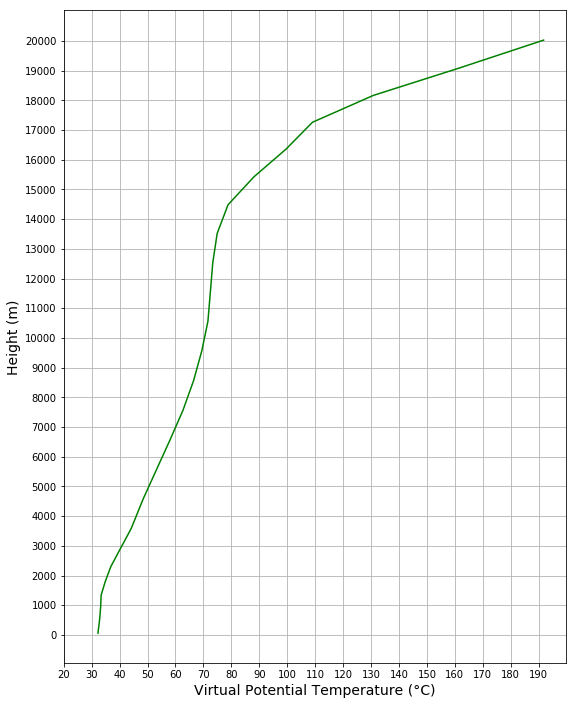

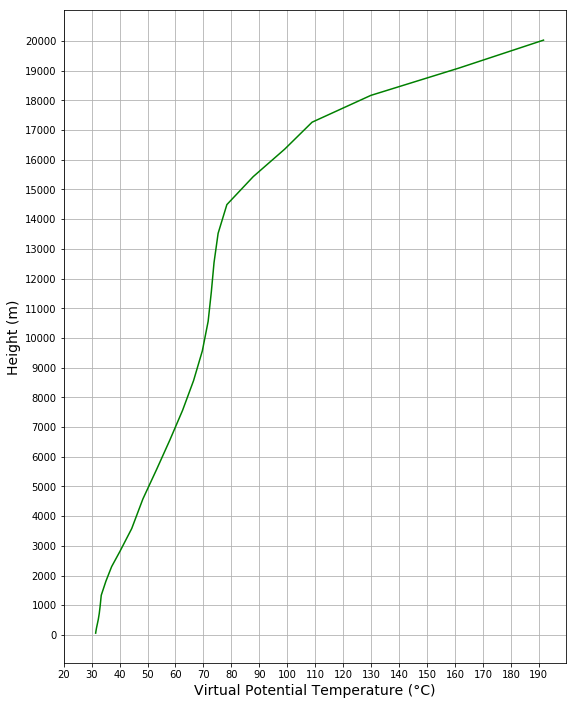

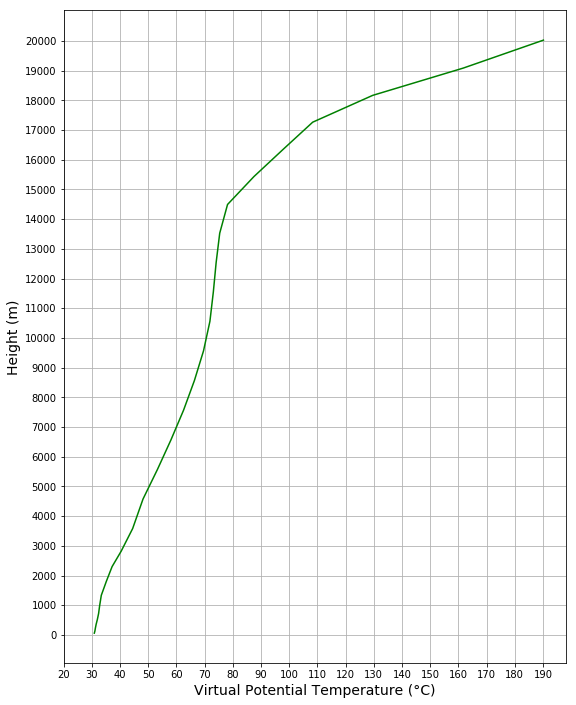

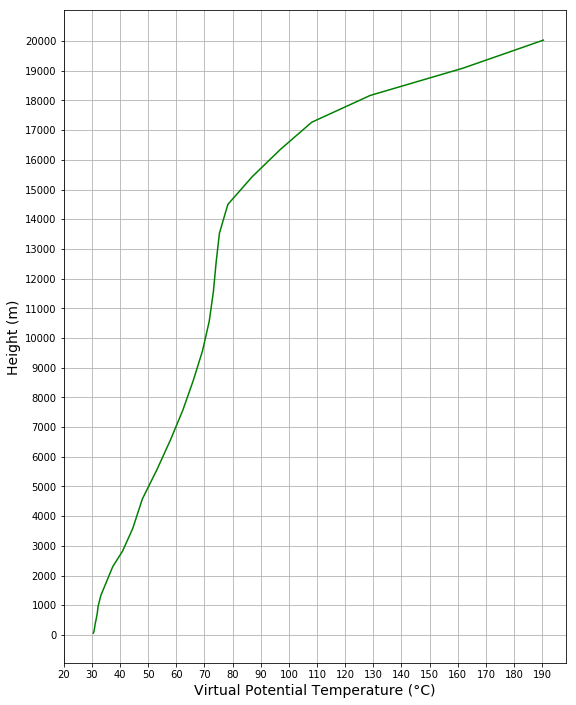

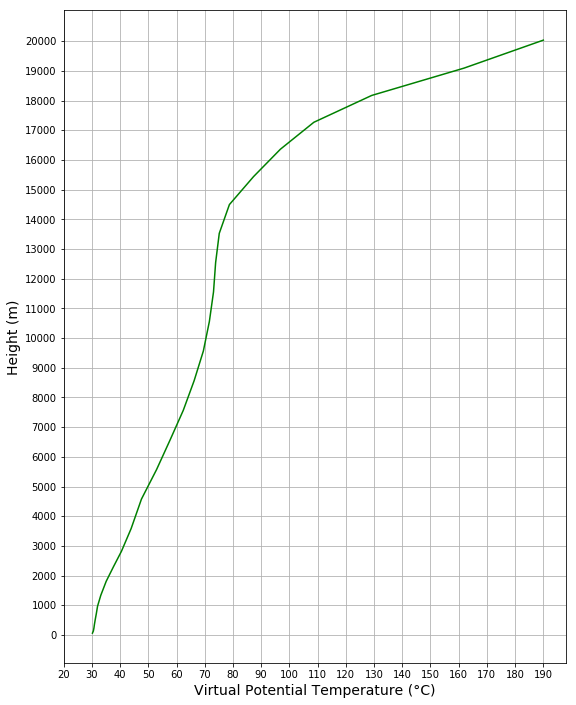

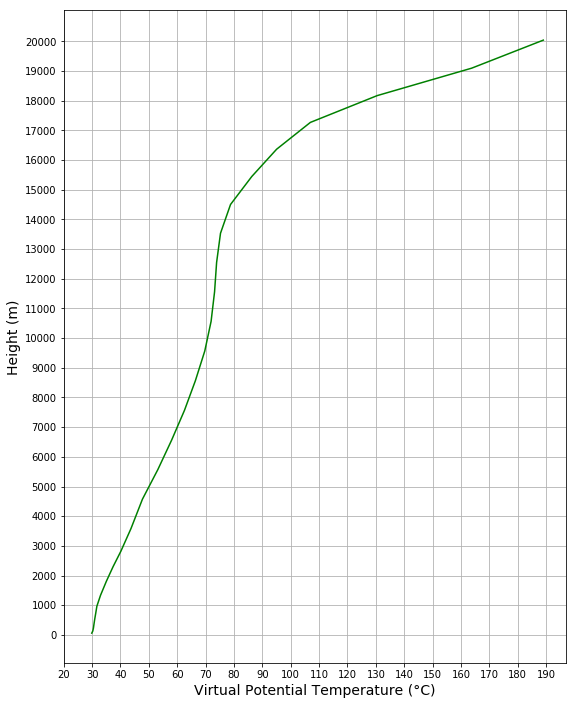

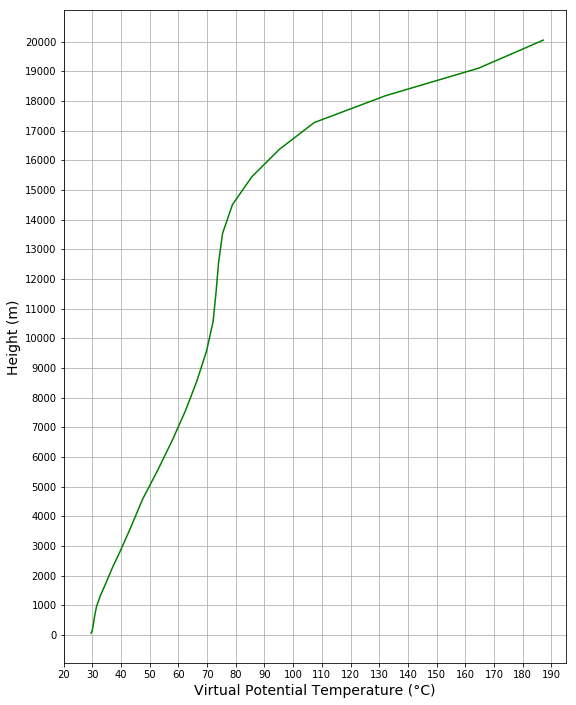

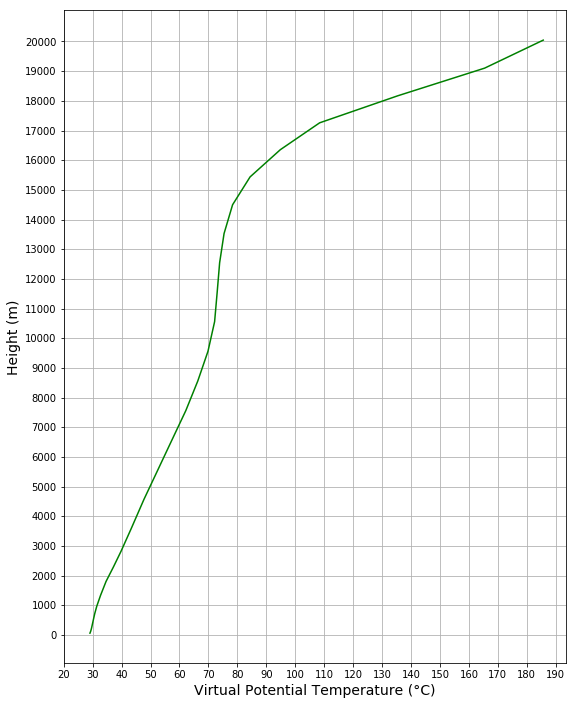

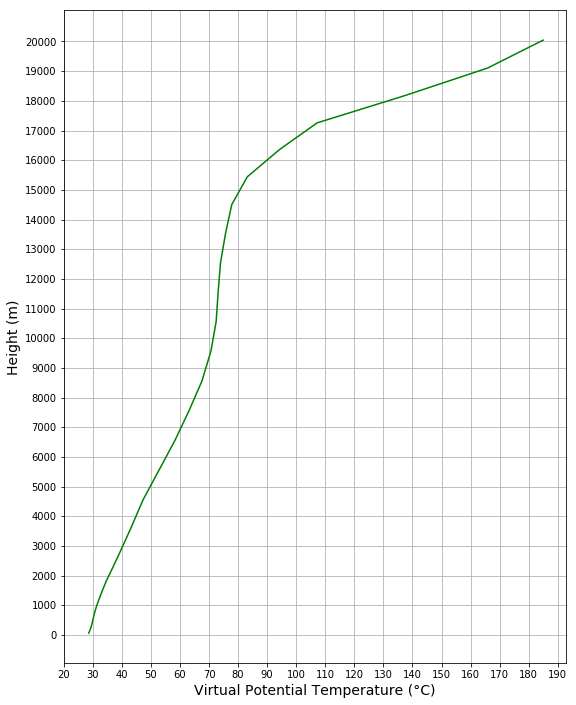

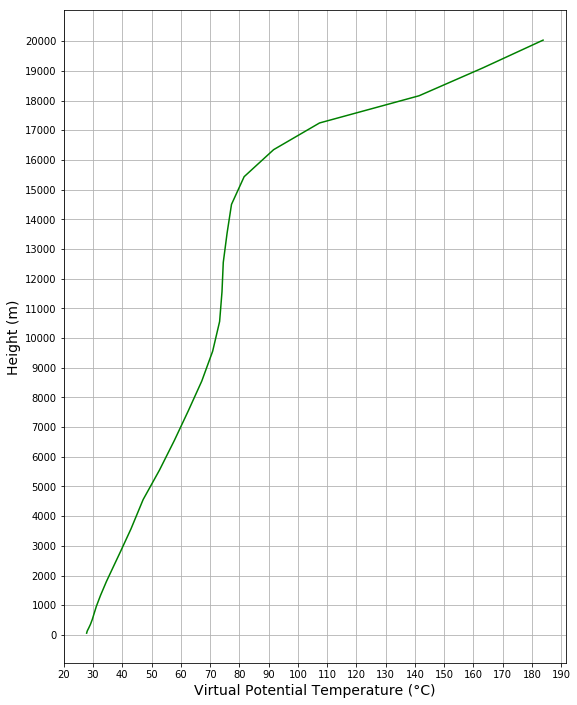

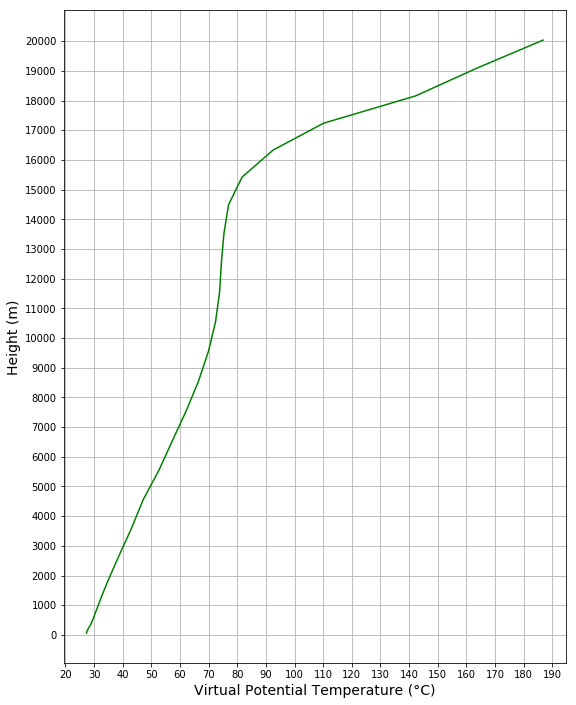

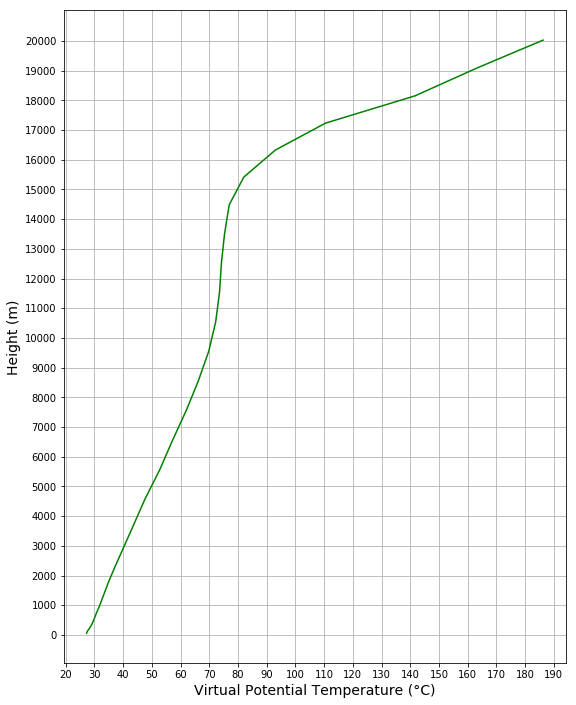

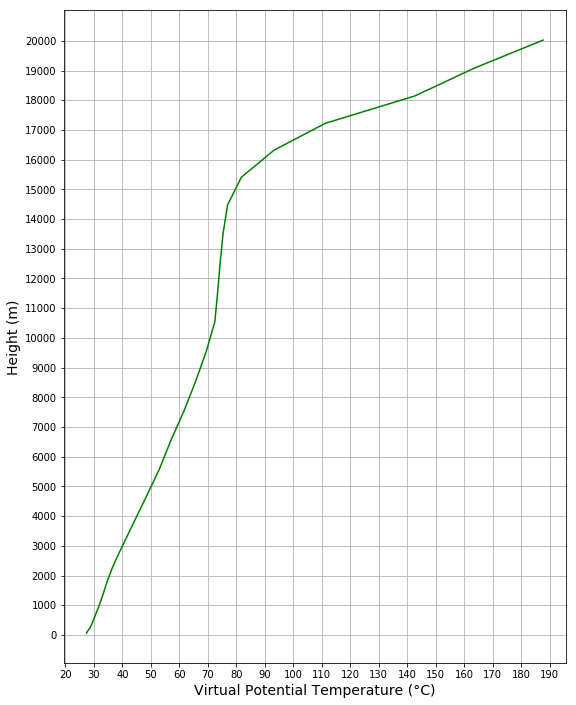

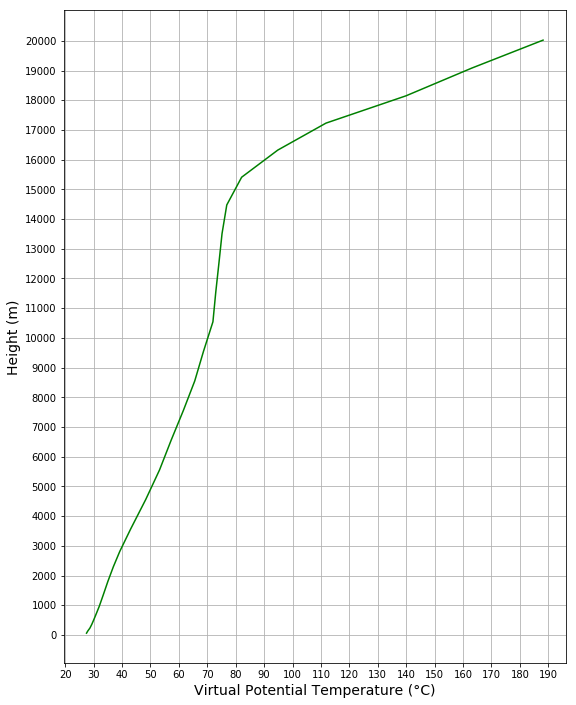

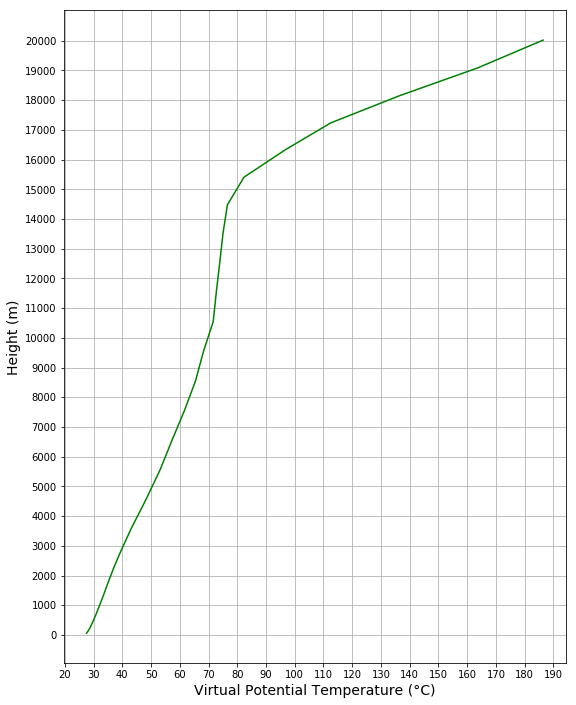

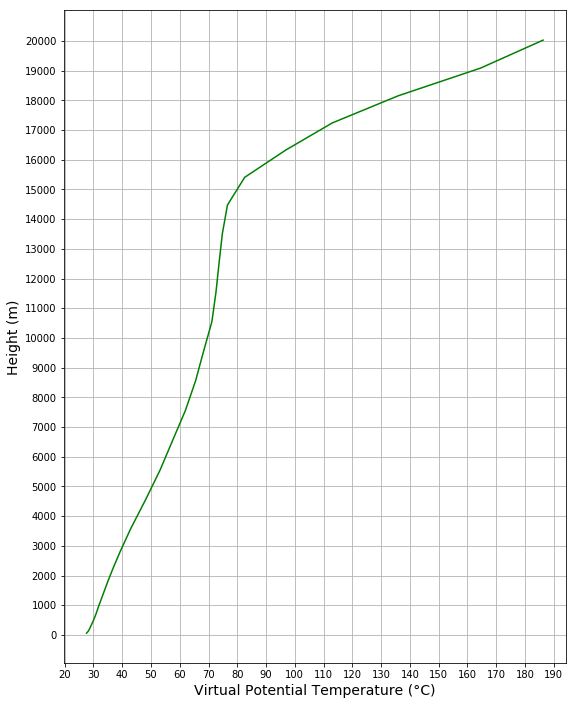

In [22]:
#file 1_65 DEO
for time in range(0,73):
    xx = int(time)
    RH1_65 = getvar(file1_65,"temp",units='kelvin',timeidx=xx)
    P1_65 = getvar(file1_65,"p",timeidx=xx)
    Z1_65 = getvar(file1_65,"z",units='m',timeidx=xx)
    D1_11 = getvar(file1_65,"QVAPOR",timeidx=xx)
    
    Dl1_11 = D1_11[:,14,20]
    Pd1_65 = P1_65[:,14,20]
    RHm1_65 = RH1_65[:,14,20]
    Zm1_65 = Z1_65[:,14,20]
    
    #thvl2 = mpcalc.static_stability(Pd1_65, RHm1_65, axis=0)
    thvl = mpcalc.virtual_potential_temperature(Pd1_65, RHm1_65, np.array(Dl1_11), molecular_weight_ratio=0.622)
    thvl2 = np.array(thvl)-273.15
    
    fig = plt.figure(figsize=(9,12))
#add_metpy_logo(fig, 115, 100)
    ax = plt.axes()

    ax.plot(thvl2, Zm1_65, 'g')
    #skew.plot(Pl1_11, thv1_11, 'g')
#skew.plot_barbs(p, u, v)
    ax.set_xticks(np.arange(20, 200, 10))
    ax.set_yticks(np.arange(0,21000, 1000))
    ax.set_ylabel('Height (m)', fontsize=14)
    ax.set_xlabel('Virtual Potential Temperature (°C)',fontsize=14)

    #skew.ax.legend(["Temperature", "Dew Point Temperature"],loc=0)
    plt.grid(True)
    plt.show()
    
    fig.savefig('plot/temperatur static/forest/d01_T99_forest_ke_'+str(xx) +'.png', bbox='tight',dpi=100)